# Movie Recommendations And Genre Predictions

## The Aim:


When looking for a movie on Netlfix or IMDB.com to watch in the evening, most of the time one scrolls down very fast looking only at the name of the movie and looking at the picture provided. This project wants to tackle the question, whether it is possible to predict the genre of the movie by its name with the help of natural language processing algorithms. 

Why predicting genre from a movie title is helpful? Before we see a movie we have ceratin expectations and genres help to form these ideas. If they are not fulfilled, perciever might fill frustrated, and therefore I propose that it is quite important how studios and independent movie makers name their movies.

The other part of project is focused on individual perceiver. According to user's rating of each movie the recommendation code will provide an alternative movies from the list with similar features. The project also focuses on detailed exploratory data analysis to answer some questions like:


- What are the most rated movies in the data set?
- What words are mostly used in titles for various genres?
- How many movies are there per genre?
- What is the distribution of movies per years?
- What are ratings distributions for each genre?   And others...


## The Data:

The dataset describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 24404096 ratings and 668953 tag applications across 40110 movies. These data were created by 259137 users between January 09, 1995 and October 17, 2016. This dataset was generated on October 18, 2016.

Users were selected at random for inclusion. All selected users had rated at least 1 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in the files `genome-scores.csv`, `genome-tags.csv`, `links.csv`, `movies.csv`, `ratings.csv` and `tags.csv`. 

Ratings Data File Structure (ratings.csv)
-----------------------------------------

All ratings are contained in the file `ratings.csv`. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:

- userId : Unique user ID
- movieId: Unique movie ID
- rating: Rating of a movie by user
- timestamp: Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970 

Tags Data File Structure (tags.csv)
-----------------------------------

All tags are contained in the file `tags.csv`. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format:

- userId: Unique user ID
- movieId: Unique movie ID
- tag: User-generated metadata about movies
- timestamp: Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

Movies Data File Structure (movies.csv)
---------------------------------------

Movie information is contained in the file `movies.csv`. Each line of this file after the header row represents one movie, and has the following format:

- movieId: Unique movie ID
- title: Title of a movie
- genres: Genre(s) of a movie

Movie titles are entered manually or imported from <https://www.themoviedb.org/>, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

Genres:

* Action
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western

Links Data File Structure (links.csv)
---------------------------------------

Identifiers that can be used to link to other sources of movie data are contained in the file `links.csv`. Each line of this file after the header row represents one movie, and has the following format:

- movieId: Unique movie ID
- imdbId: IMDB.com movie ID
- tmdbId: themoviedb.com movie ID



# Exploratory Data Analysis and Data Cleaning:

Loading necessary libraries:

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Load the dataset 'movies.csv' and name it genres because the EDA is concentrated on genres:

In [2]:
genres = pd.read_csv('/Users/katerinacapouskova/Desktop/DSI-SF-4-katerinaC/Projects/Capstone/Movies/ml-latest/movies.csv')

### The dataset shape:

In [3]:
genres.shape

(40110, 3)

### The dataset head:


In [4]:
genres.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### The dataset info:

In [5]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40110 entries, 0 to 40109
Data columns (total 3 columns):
movieId    40110 non-null int64
title      40110 non-null object
genres     40110 non-null object
dtypes: int64(1), object(2)
memory usage: 940.1+ KB


### Creating new column indicating the year in which was movie produced:

In [6]:
def year (x):
    year = []
    x = x.split()
    for i in x:
        if '(' in i:
            year.append(i)
            new_year = []
            for v in year:
                v =  v.replace('(','') 
                v = v.replace(')','')
                new_year.append(v)
                for n in new_year:
                    try:
                        return float(n)
                    except:
                        return np.nan
    
    


genres['Year'] = genres['title'].map(year)

### Creating a new column where is a list containing words from the names and excluding year:

In [7]:
def remove (m):
    m = m.split()
    name = []
    for i in m:
        if '(' not in i:
            name.append(i)
    return name
            
genres['title_list'] = genres['title'].map(remove)

### Creating new columns:
- comedy 
- drama
- documentary
- horror
- thriller
- western
- romance
- adventure
- animation
- children's
- crime
- fantasy
- film-noir
- musical
- sci-fi
- mystery
- war

In [8]:
genres['COMEDY'] = genres['genres'].map(lambda x: 1 if 'Comedy' in x else 0)
genres['DRAMA'] = genres['genres'].map(lambda x: 1 if 'Drama' in x else 0)
genres['DOCUMENTARY'] = genres['genres'].map(lambda x: 1 if 'Documentary' in x else 0)
genres['HORROR'] = genres['genres'].map(lambda x: 1 if 'Horror' in x else 0)
genres['THRILLER'] = genres['genres'].map(lambda x: 1 if 'Thriller' in x else 0)
genres['WESTERN'] = genres['genres'].map(lambda x: 1 if 'Western' in x else 0)
genres['ROMANCE'] = genres['genres'].map(lambda x: 1 if 'Romance' in x else 0)
genres['ADVENTURE'] = genres['genres'].map(lambda x: 1 if 'Adventure' in x else 0)
genres['ANIMATION'] = genres['genres'].map(lambda x: 1 if 'Animation' in x else 0)
genres['CHILDRENS'] = genres['genres'].map(lambda x: 1 if 'Children' in x else 0)
genres['CRIME'] = genres['genres'].map(lambda x: 1 if 'Crime' in x else 0)
genres['FANTASY'] = genres['genres'].map(lambda x: 1 if 'Fantasy' in x else 0)
genres['FILM-NOIR'] = genres['genres'].map(lambda x: 1 if 'Film-Noir' in x else 0)
genres['MUSICAL'] = genres['genres'].map(lambda x: 1 if 'Musical' in x else 0)
genres['SCI-FI'] = genres['genres'].map(lambda x: 1 if 'Sci-Fi' in x else 0)
genres['MYSTERY'] = genres['genres'].map(lambda x: 1 if 'Mystery' in x else 0)
genres['WAR'] = genres['genres'].map(lambda x: 1 if 'War' in x else 0)

In [9]:
genres_list =['COMEDY', 'DRAMA', 'DOCUMENTARY', 'HORROR', 'THRILLER', 'WESTERN', 'ROMANCE', 'ADVENTURE', 'ANIMATION',
        'CHILDRENS', 'CRIME', 'FANTASY', 'FILM-NOIR', 
        'MUSICAL', 'SCI-FI', 'MYSTERY', 'WAR']

### Removing missing data:

In [10]:
null = genres.isnull().sum()
null_sorted = null.sort_values(ascending=False, inplace=False)
print null_sorted


Year           5372
WAR               0
MYSTERY           0
title             0
genres            0
title_list        0
COMEDY            0
DRAMA             0
DOCUMENTARY       0
HORROR            0
THRILLER          0
WESTERN           0
ROMANCE           0
ADVENTURE         0
ANIMATION         0
CHILDRENS         0
CRIME             0
FANTASY           0
FILM-NOIR         0
MUSICAL           0
SCI-FI            0
movieId           0
dtype: int64


Not removing any yet, will see if year is going to be necessary (year especially).

### Plot for number of movies in each genre:

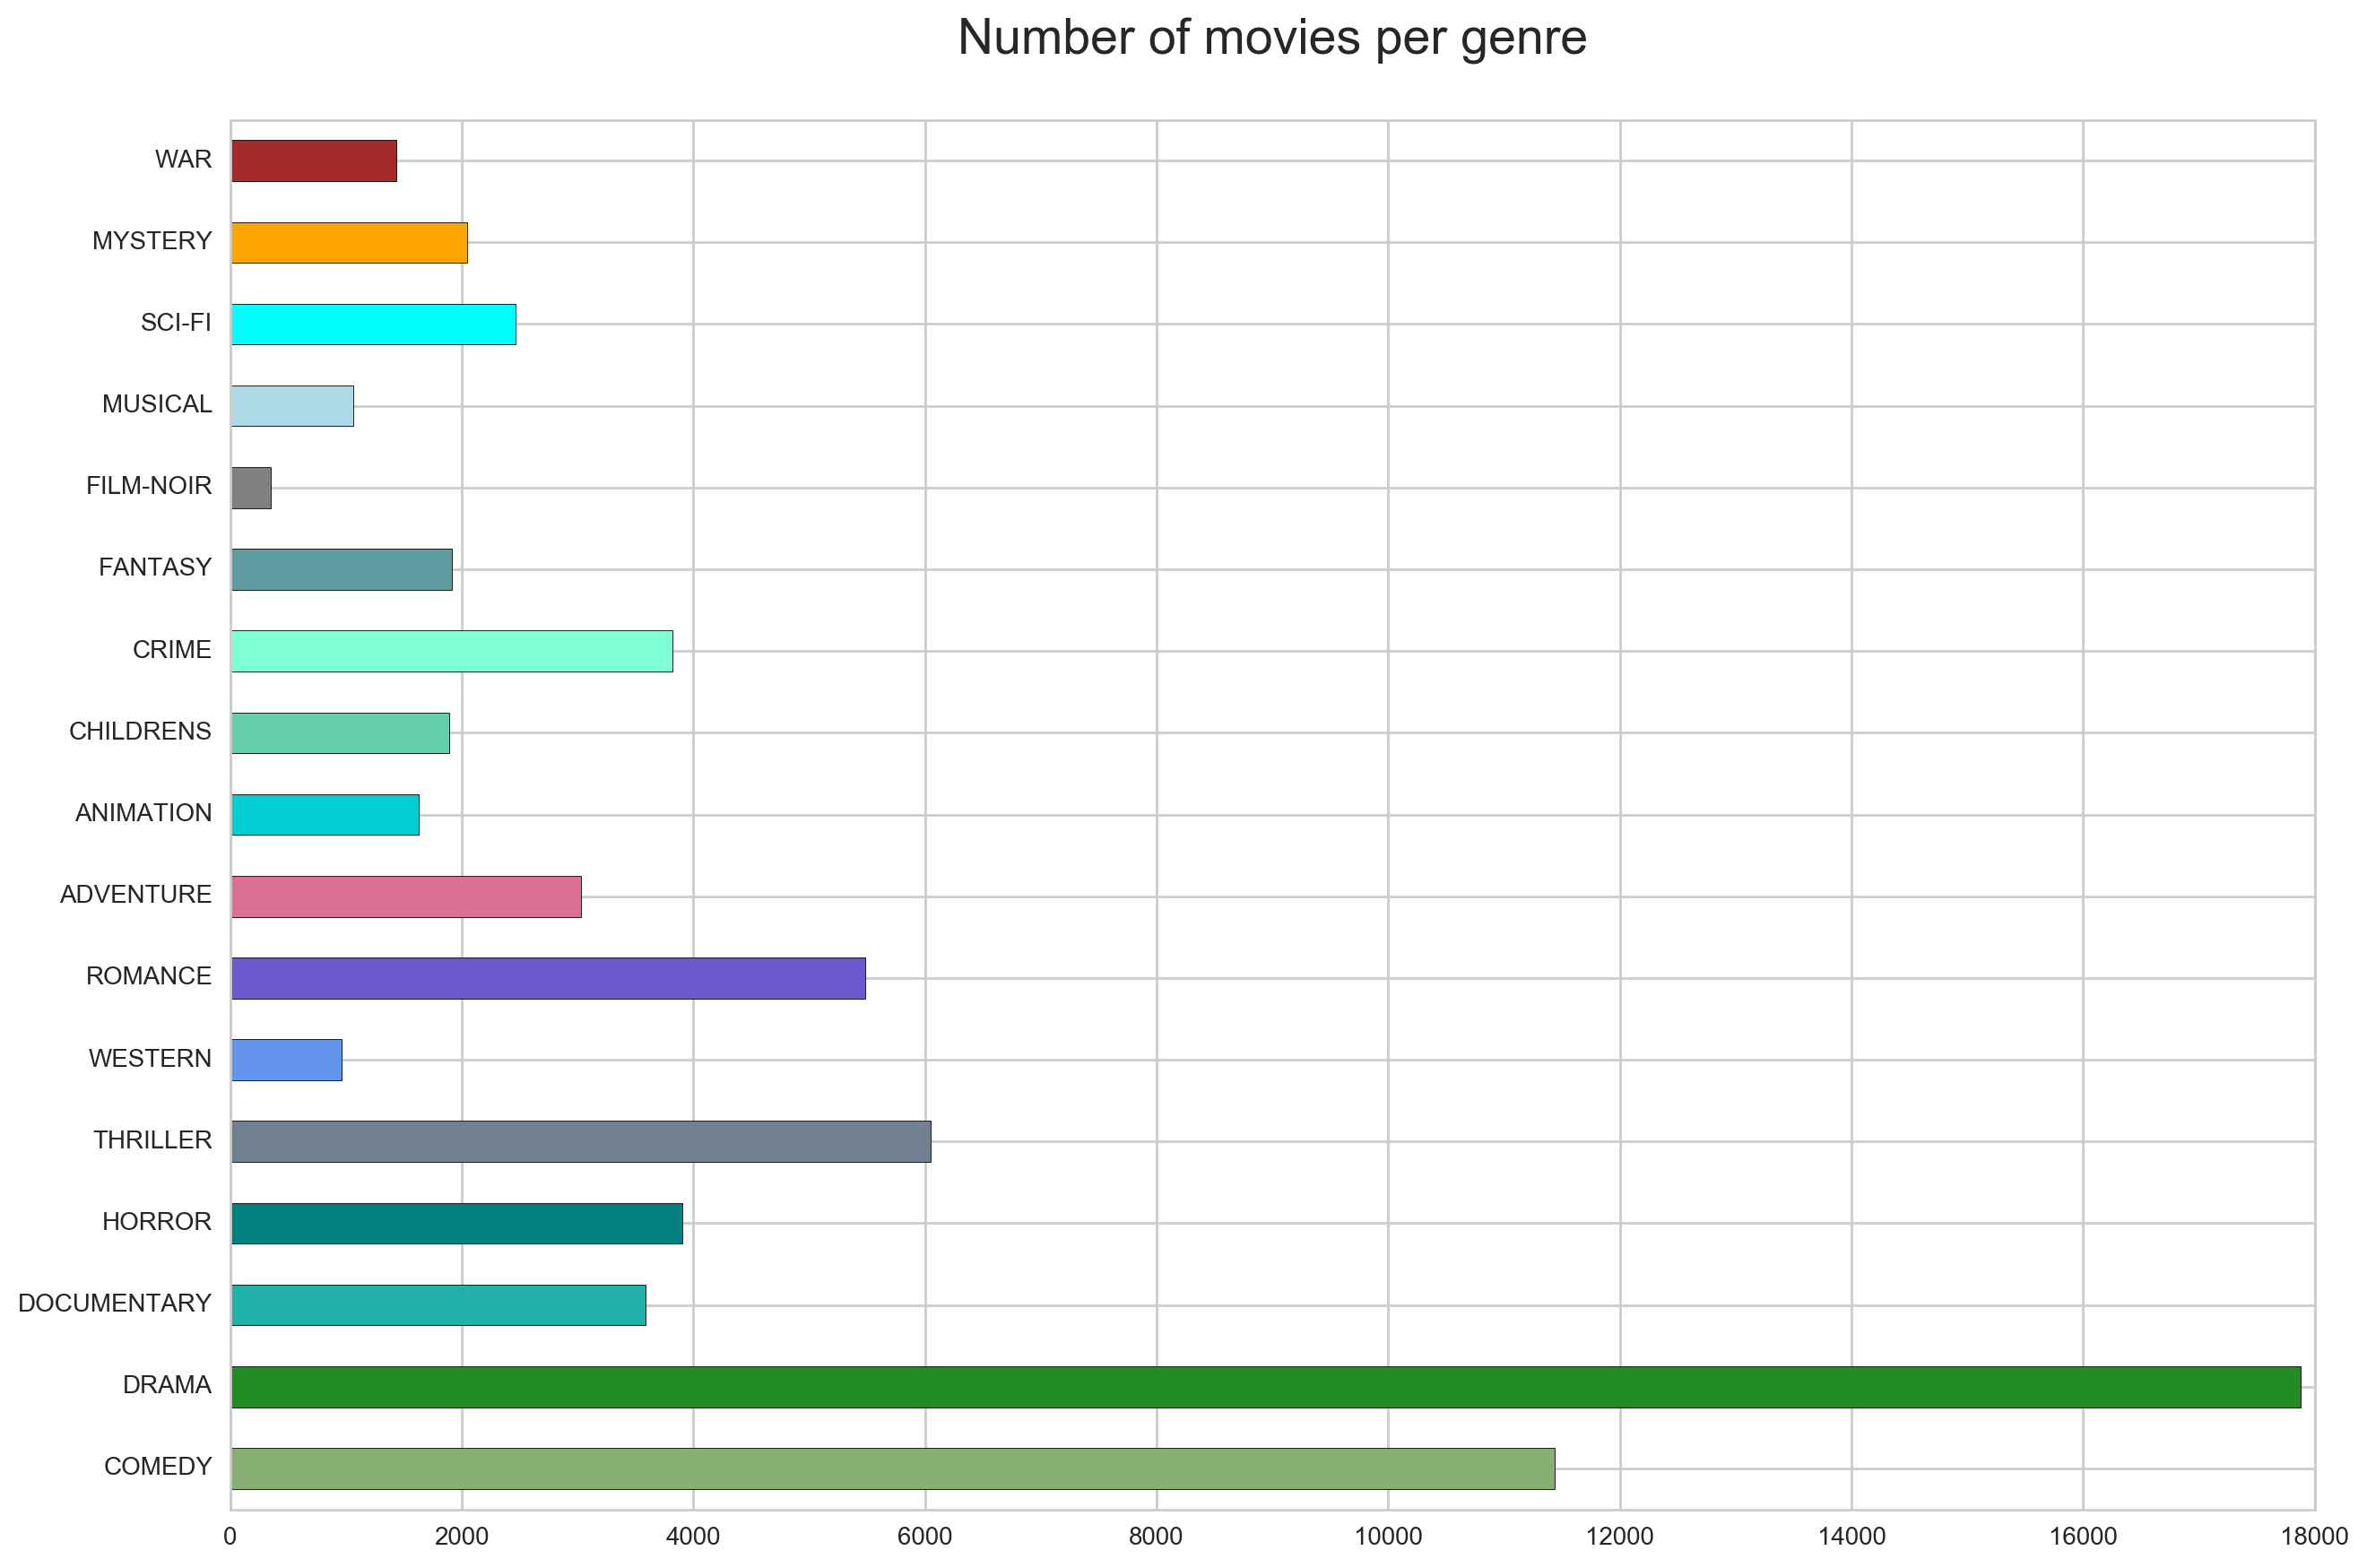

In [11]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()

# Plot the bars for each genre:
genres[['COMEDY', 'DRAMA', 'DOCUMENTARY', 'HORROR', 'THRILLER', 'WESTERN', 'ROMANCE', 'ADVENTURE', 'ANIMATION',
        'CHILDRENS', 'CRIME', 'FANTASY', 'FILM-NOIR', 
        'MUSICAL', 'SCI-FI', 'MYSTERY', 'WAR']].sum().plot(kind='barh',color=('sage', 'forestgreen', 
                                                                              'lightseagreen','teal', 'slategrey', 
                                                                              'cornflowerblue', 'slateblue',
                                                                              'palevioletred', 'darkturquoise',
                                                                             'mediumaquamarine', 'aquamarine',
                                                                             'cadetblue', 'grey', 'lightblue', 'aqua',
                                                                             'orange', 'brown'))
# put the title on
ax.set_title('Number of movies per genre\n', fontsize=20)

# change the x-ticks to be the states instead of the row indices
# this wasn't required, but is nice

plt.show()

### New dataframe to remove missing years:

In [13]:
year_df = genres
year_df.dropna(inplace=True)

### Mask to have only movie made in 1990 and up:

In [14]:
year = year_df[year_df['Year'] > 1900]

### Plot for number of movies per year:

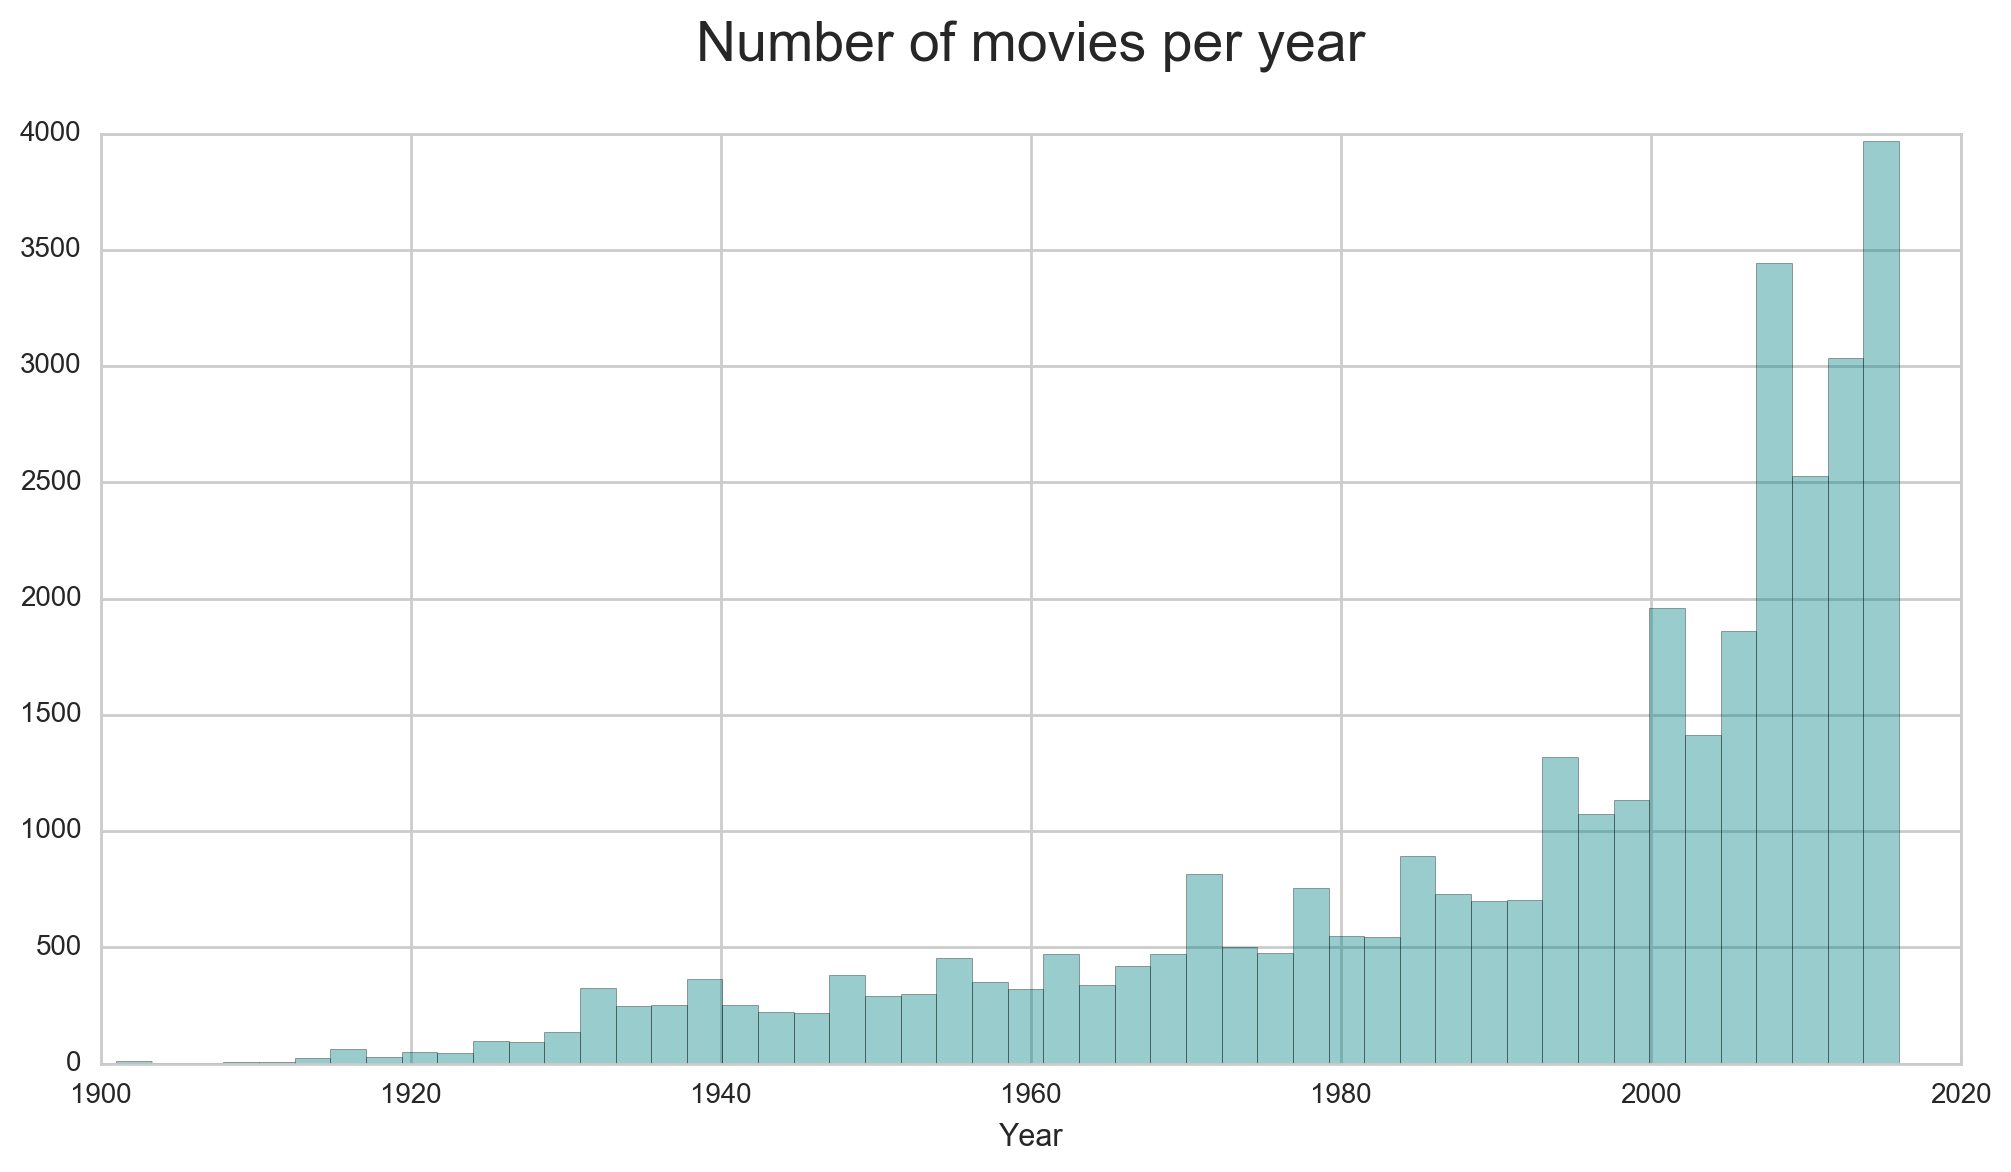

In [15]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ax = sns.distplot(year.Year, kde=False, color = 'teal')

ax.set_title('Number of movies per year\n', fontsize=20)

plt.show()


### Loading new data set with ratings (ratings.csv):

In [16]:
ratings = pd.read_csv("/Users/katerinacapouskova/Desktop/DSI-SF-4-katerinaC/Projects/Capstone/Movies/ml-latest/ratings.csv")

In [18]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24404096 entries, 0 to 24404095
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 744.8 MB


In [19]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,122,2.0,945544824
1,1,172,1.0,945544871
2,1,1221,5.0,945544788
3,1,1441,4.0,945544871
4,1,1609,3.0,945544824


In [20]:
ratings.describe()

,userId,movieId,rating,timestamp
count,2.440410e+07,2.440410e+07,2.440410e+07,2.440410e+07
mean,1.293740e+05,1.353488e+04,3.526568e+00,1.149964e+09
std,7.496302e+04,2.754770e+04,1.064218e+00,1.941262e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,6.393000e+04,1.015000e+03,3.000000e+00,9.784169e+08
50%,1.294010e+05,2.424000e+03,3.500000e+00,1.131762e+09
75%,1.940370e+05,5.816000e+03,4.000000e+00,1.307577e+09
max,2.591370e+05,1.652010e+05,5.000000e+00,1.476688e+09


### Group ratings to get mean score for movies:

In [21]:
movieid_df = pd.DataFrame(ratings.groupby(['movieId'])['rating'].mean().reset_index())

### MovieID info:

In [88]:
movieid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39443 entries, 0 to 39442
Data columns (total 2 columns):
movieId         39443 non-null int64
ratings_mean    39443 non-null float64
dtypes: float64(1), int64(1)
memory usage: 616.4 KB


### Plot of mean ratings of each movie distribution:

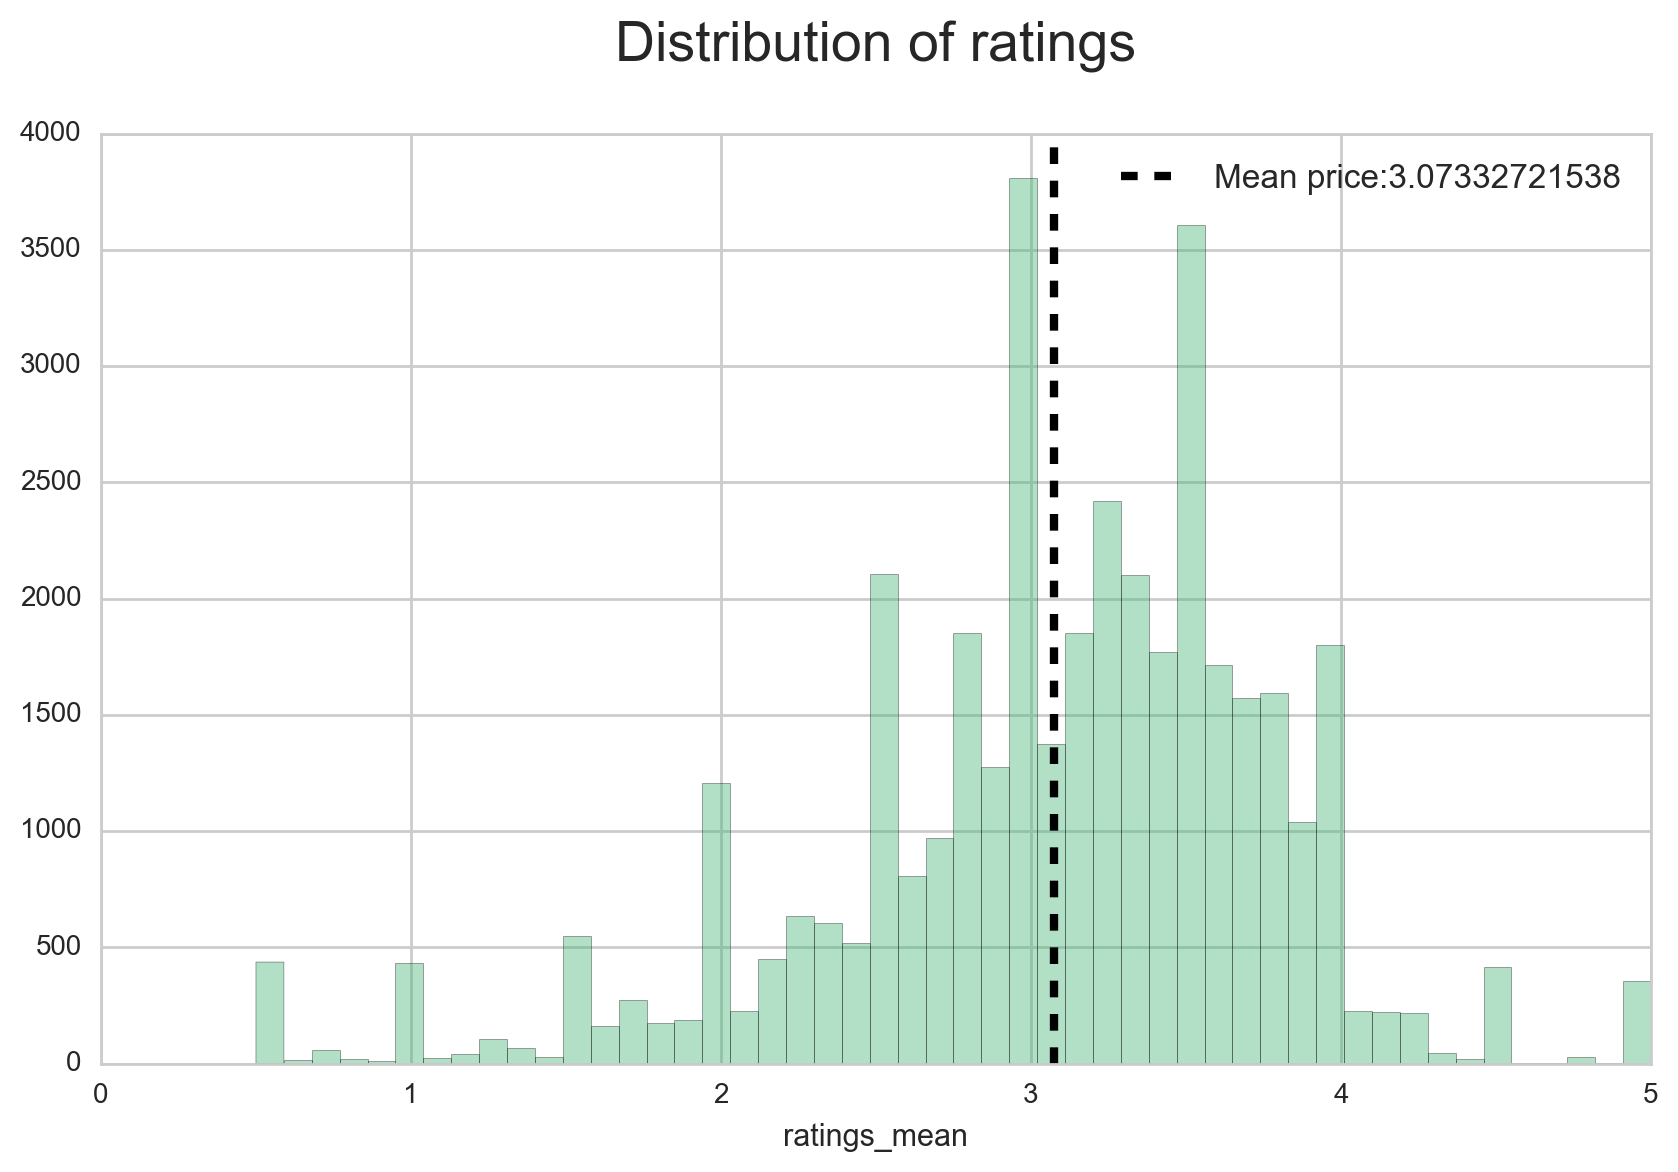

In [94]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()

ax = sns.distplot(movieid_df.ratings_mean, kde=False, color = 'mediumseagreen')
ax.set_title('Distribution of ratings\n', fontsize=20)
plt.axvline(movieid_df.ratings_mean.mean(),lw=3,ls='dashed',
            color='black',label='Mean price:'+'{}'.format(movieid_df.ratings_mean.mean()))

plt.legend(loc='upper right',fontsize=12)
plt.show()


### Describe to see mean, median and std of mean ratings:

In [24]:
movieid_df.describe().T.tail(1)

,count,mean,std,min,25%,50%,75%,max
rating,39443.0,3.073327,0.736544,0.5,2.714286,3.166667,3.52381,5.0


#### Rename the ratings column to ratings_mean:

In [25]:
movieid_df['ratings_mean'] = movieid_df['rating']
del movieid_df['rating']

#### There are movies with mean ratings 5, lets look at them:

In [26]:
unique_movies = movieid_df[movieid_df['ratings_mean'] == 5.0]

#### There are 355 movies with mean rating 5. Might be that there is only one rating for each movie.

In [28]:
unique_movies.shape

(355, 2)

In [29]:
movie_ratings_count = pd.DataFrame(ratings.groupby(['movieId'])['rating'].count().reset_index())

In [30]:
movies_once_rated = movie_ratings_count[movie_ratings_count['rating'] == 1]
movies_once_rated.shape

(6870, 2)

There are 6870 once rated movies, so those with mean rating 5 are probably from this once rated category.

### Let's get rid of those movies that were rated only once so it is more 'objective'.



In [31]:
movies_ratings = movie_ratings_count[movie_ratings_count['rating'] != 1]

#### Rename the column to ratings_count:

In [32]:
movies_ratings['ratings_count'] = movies_ratings['rating']
del movies_ratings['rating']

/Applications/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


#### Let's merge the tables with ratings_count and ratings_mean together:

In [34]:
ratings_merged = movies_ratings.merge(movieid_df, how='left', left_on='movieId', right_on='movieId' )

### Merging ratings dataframe with movies dataframe:

In [35]:
movies = ratings_merged.merge(genres, how='left', left_on='movieId', right_on='movieId')

### Plot to see the rating distribution for comedy, drama, and thriller:

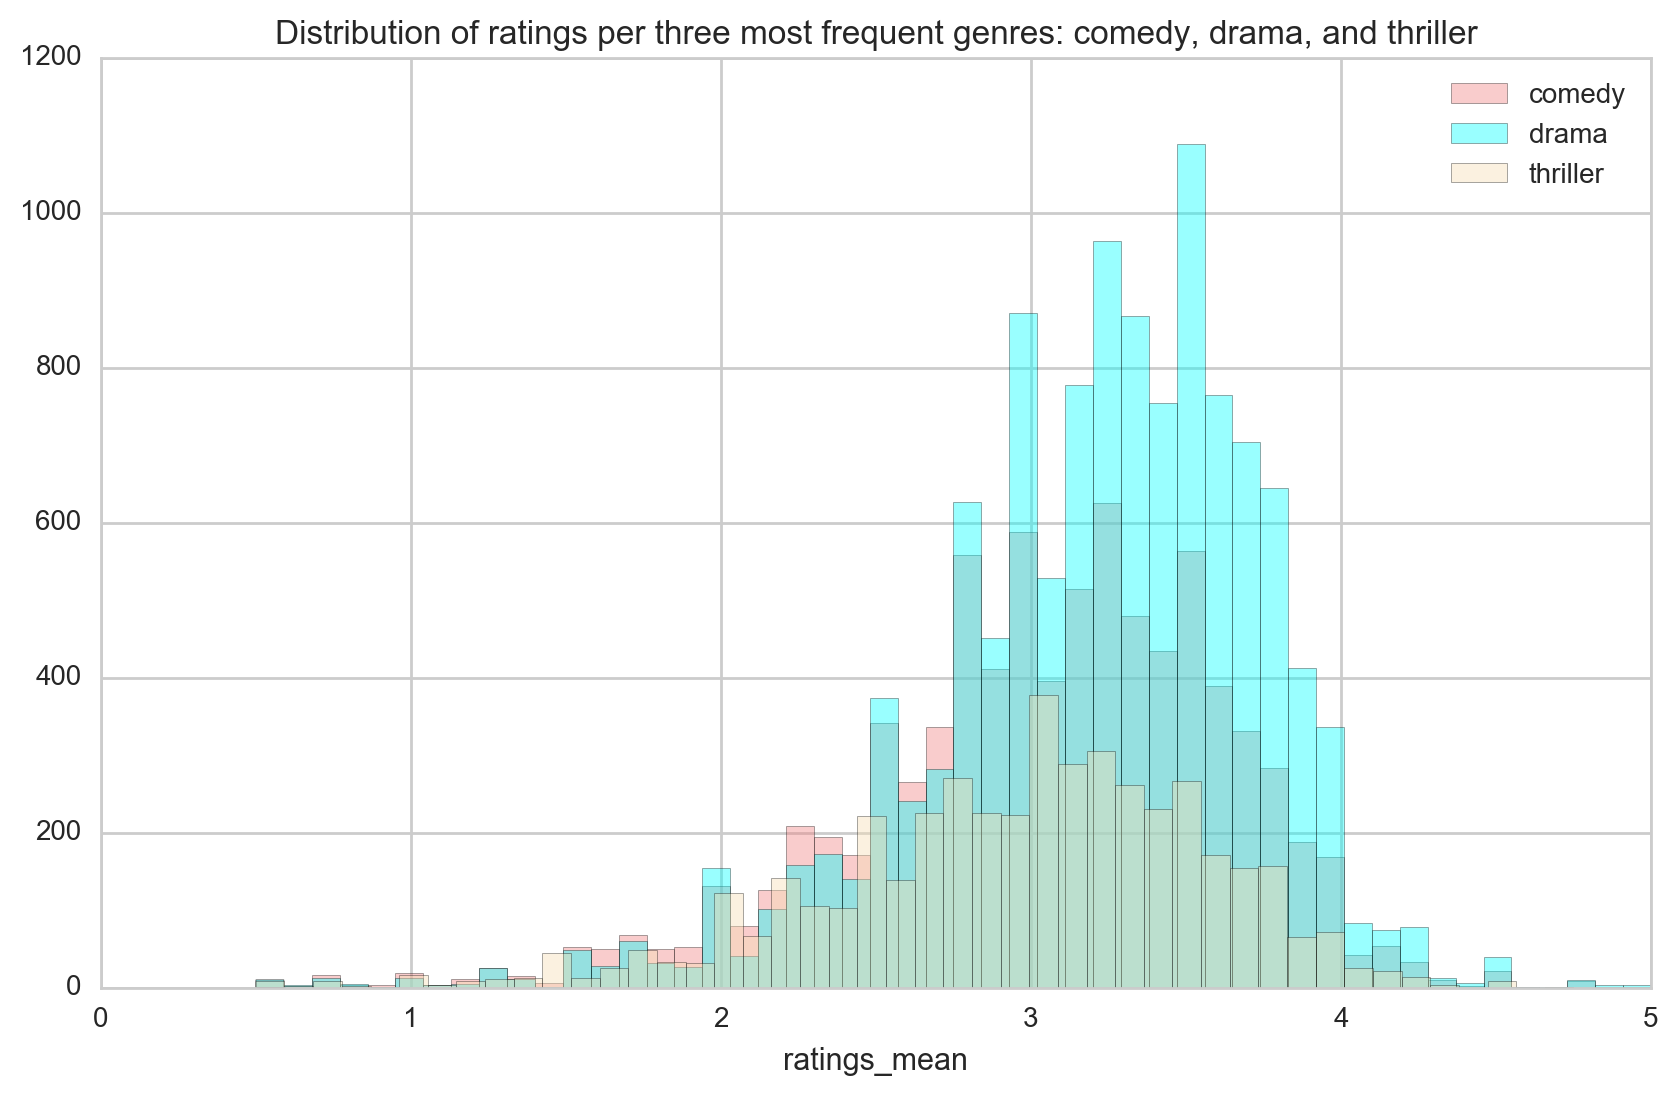

In [37]:
comedy_df = movies[movies['COMEDY'] == 1]
drama_df = movies[movies['DRAMA'] == 1]
thriller_df = movies[movies['THRILLER'] == 1]
documentary_df = movies[movies['DOCUMENTARY'] == 1]
romance_df = movies[movies['ROMANCE'] == 1]
horror_df = movies[movies['HORROR'] == 1]
western_df = movies[movies['WESTERN'] == 1]


fig = plt.figure(figsize=(10,6))
ax = fig.gca()

ax = sns.distplot(comedy_df.ratings_mean, kde=False, color = 'lightcoral', label='comedy')
ax = sns.distplot(drama_df.ratings_mean, kde=False, color = 'aqua', label='drama')
ax = sns.distplot(thriller_df.ratings_mean, kde=False, color = 'wheat', label='thriller')


ax.set_title('Distribution of ratings per three most frequent genres: comedy, drama, and thriller')

ax.legend(loc='upper right')


plt.show()

### Plot to see the rating distribution for documentary, romance, horror, and western:

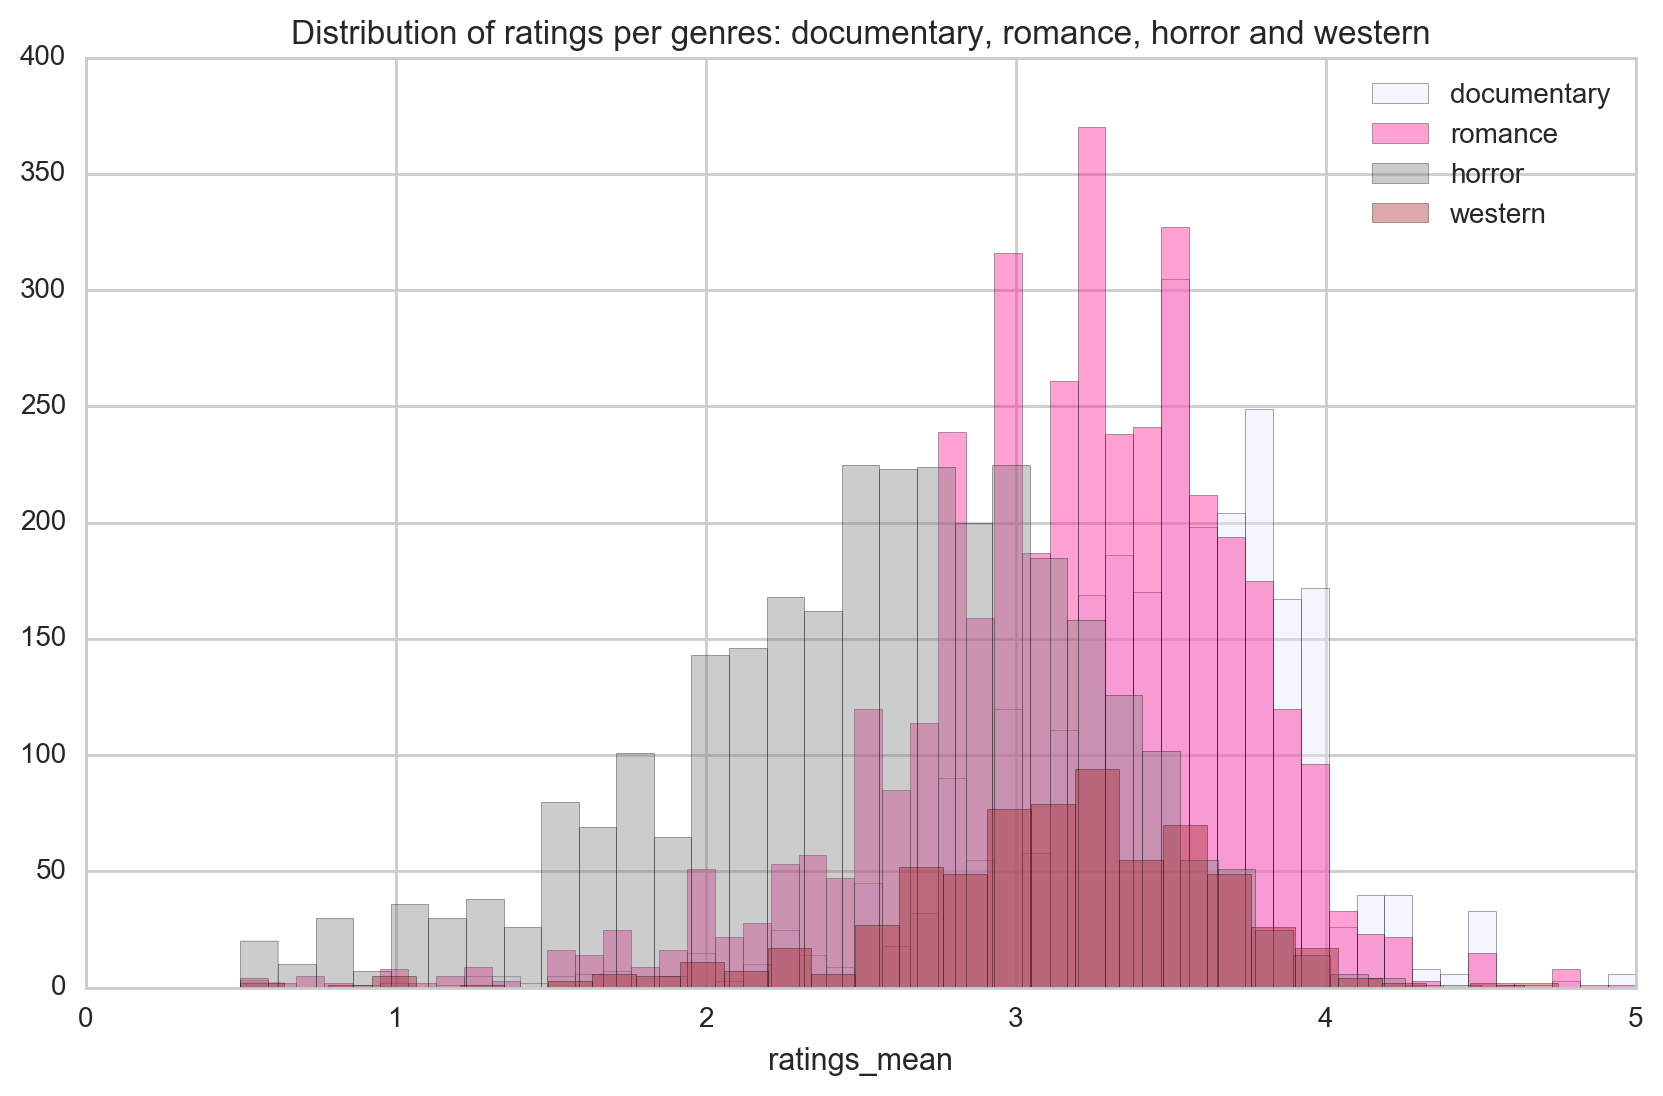

In [38]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()


ax = sns.distplot(documentary_df.ratings_mean, kde=False, color = 'lavender', label='documentary')
ax = sns.distplot(romance_df.ratings_mean, kde=False, color = 'deeppink', label='romance')
ax = sns.distplot(horror_df.ratings_mean, kde=False, color = 'grey', label='horror')
ax = sns.distplot(western_df.ratings_mean, kde=False, color = 'brown', label='western')


ax.set_title('Distribution of ratings per genres: documentary, romance, horror and western')

ax.legend(loc='upper right')


plt.show()

#### Looks like horror is doing the worst when it comes to ratings.

### Plot to see the rating distribution for adventure, animation, children's, crime, and fantasy:

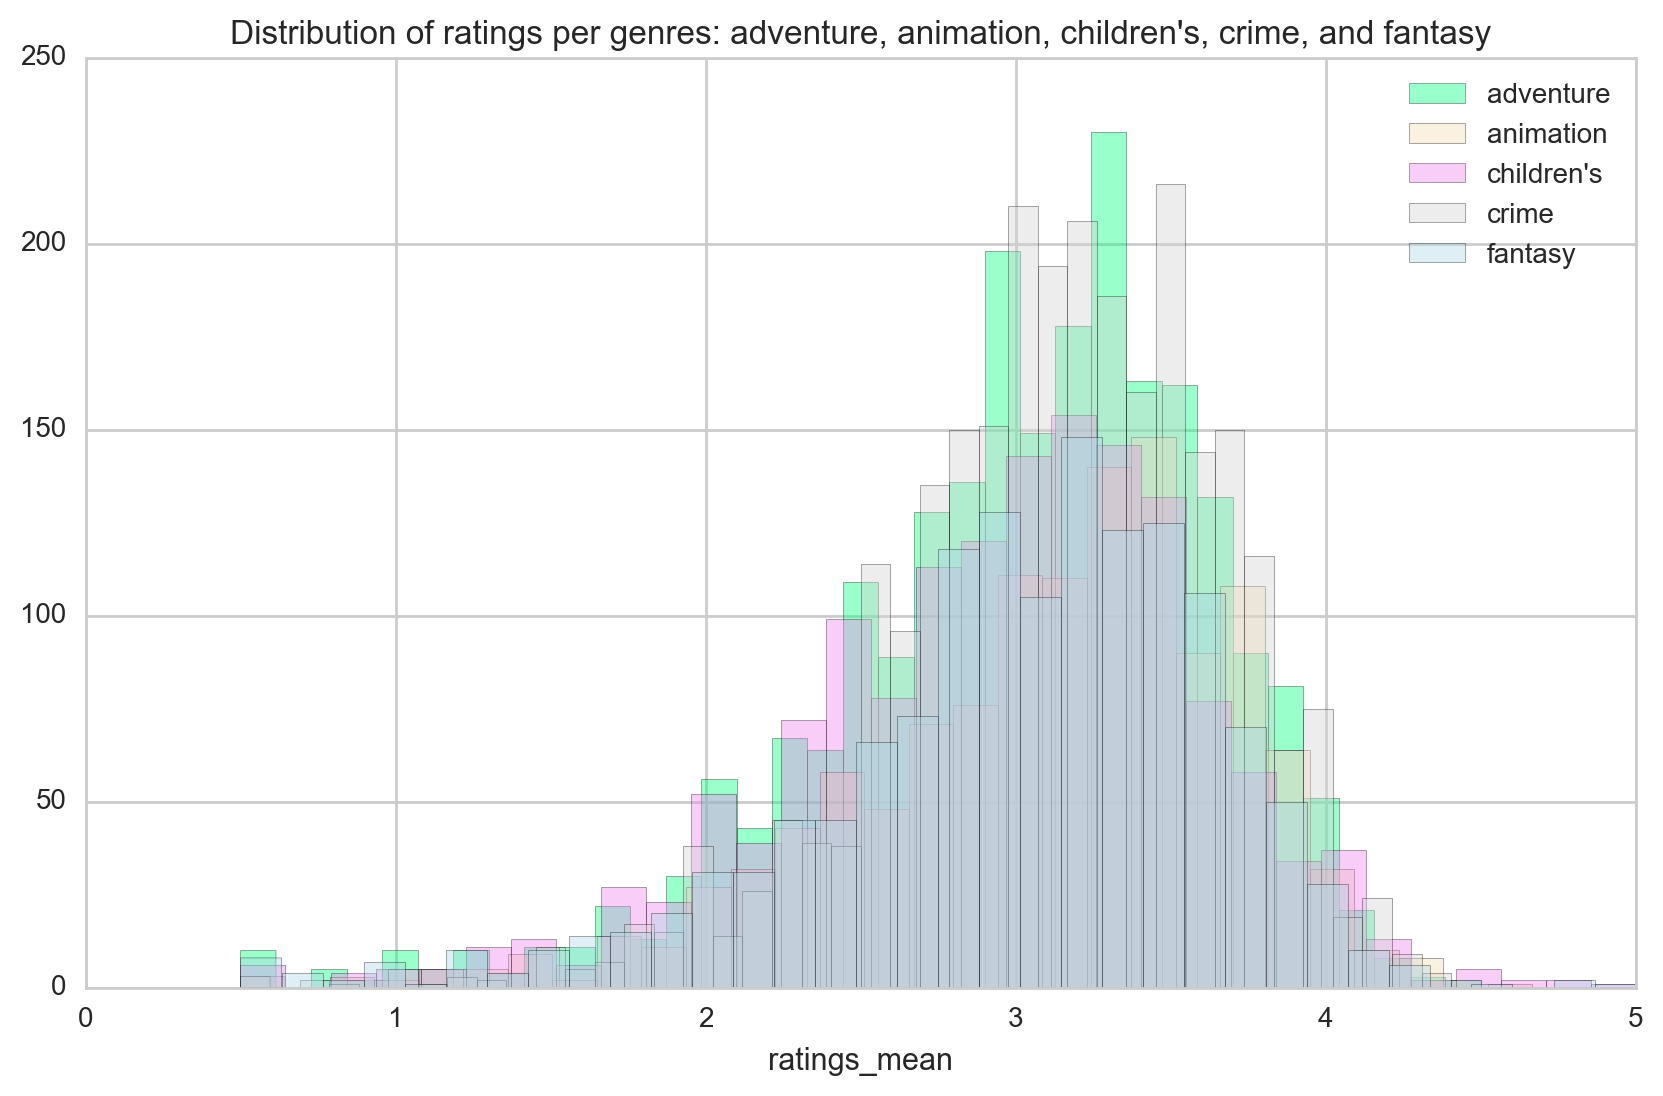

In [39]:
adventure_df = movies[movies['ADVENTURE'] == 1]
animation_df = movies[movies['ANIMATION'] == 1]
childrens_df = movies[movies['CHILDRENS'] == 1]
crime_df = movies[movies['CRIME'] == 1]
fantasy_df = movies[movies['FANTASY'] == 1]
filmnoir_df = movies[movies['FILM-NOIR'] == 1]
musical_df = movies[movies['MUSICAL'] == 1]
scifi_df = movies[movies['SCI-FI'] == 1]
mystery_df = movies[movies['MYSTERY'] == 1]
war_df = movies[movies['WAR'] == 1]


fig = plt.figure(figsize=(10,6))
ax = fig.gca()


ax = sns.distplot(adventure_df.ratings_mean, kde=False, color = 'springgreen', label='adventure')
ax = sns.distplot(animation_df.ratings_mean, kde=False, color = 'wheat', label='animation')
ax = sns.distplot(childrens_df.ratings_mean, kde=False, color = 'violet', label='children\'s')
ax = sns.distplot(crime_df.ratings_mean, kde=False, color = 'lightgrey', label='crime')
ax = sns.distplot(fantasy_df.ratings_mean, kde=False, color = 'lightblue', label='fantasy')

ax.set_title('Distribution of ratings per genres: adventure, animation, children\'s, crime, and fantasy')

ax.legend(loc='upper right')


plt.show()

### Plot to see the rating distribution for film-noir, musical, sci-fi, mystery, and war:

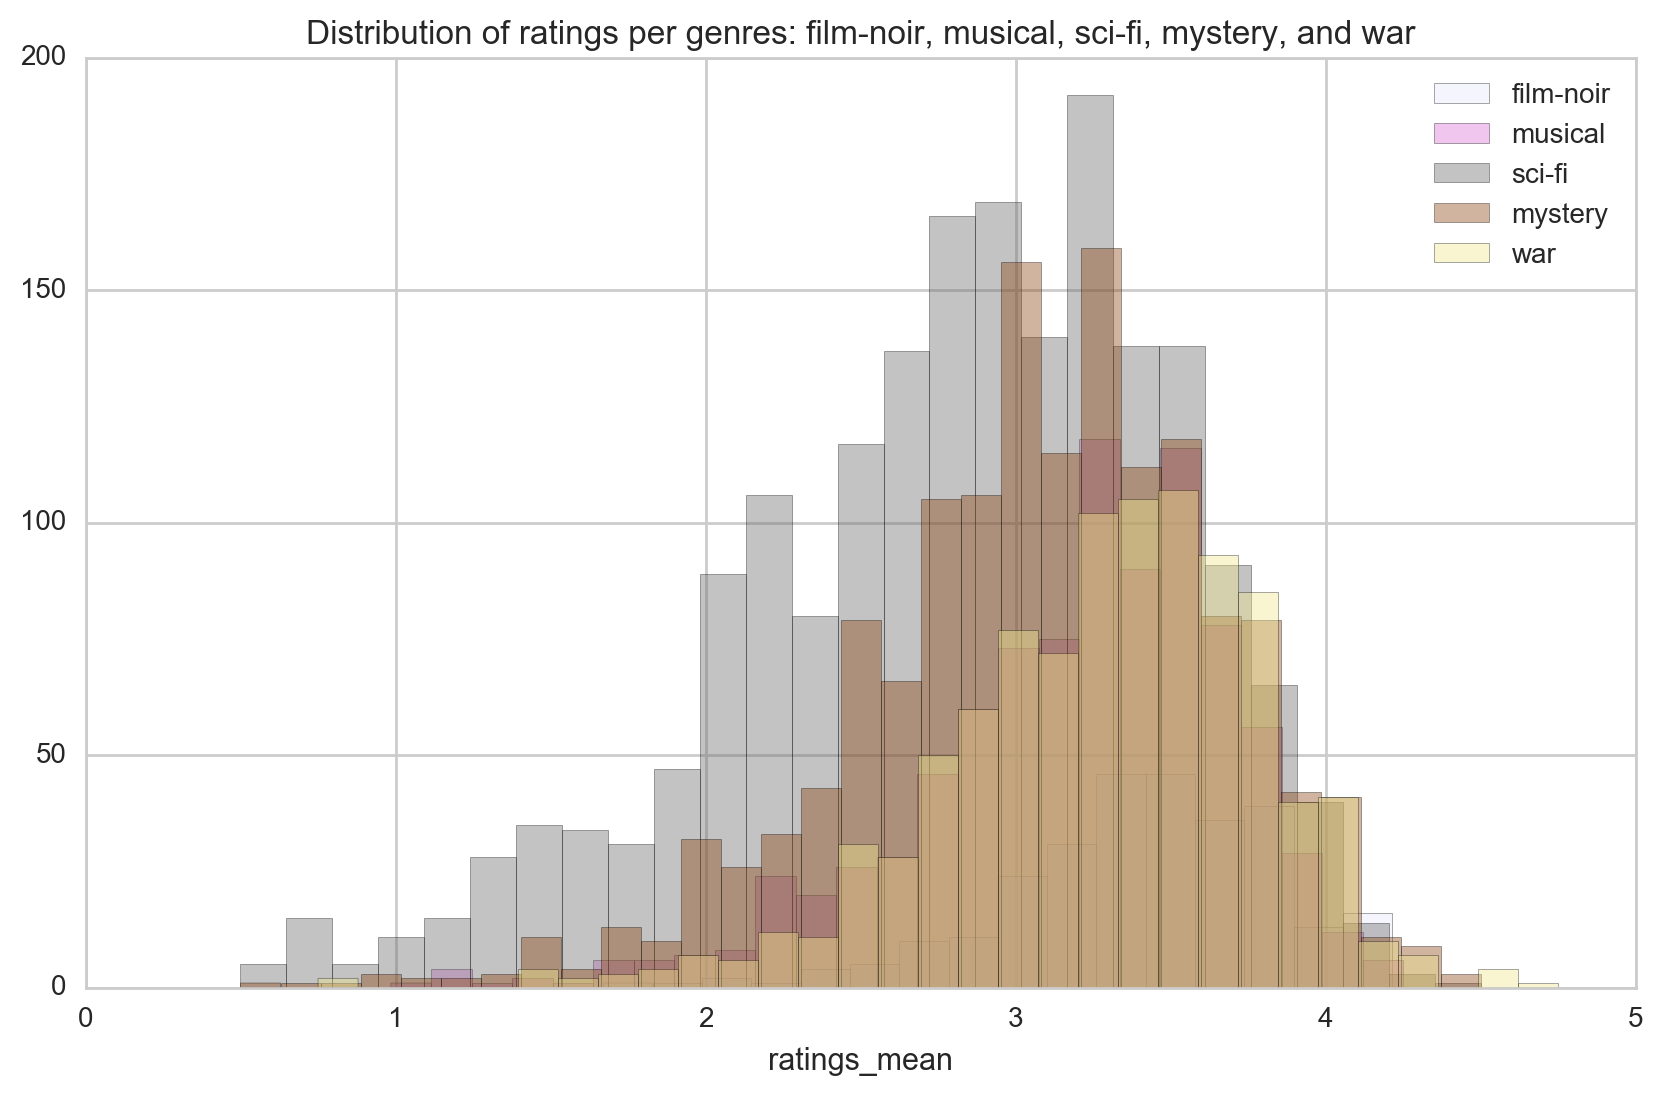

In [40]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()


ax = sns.distplot(filmnoir_df.ratings_mean, kde=False, color = 'lavender', label='film-noir')
ax = sns.distplot(musical_df.ratings_mean, kde=False, color = 'orchid', label='musical')
ax = sns.distplot(scifi_df.ratings_mean, kde=False, color = 'dimgrey', label='sci-fi')
ax = sns.distplot(mystery_df.ratings_mean, kde=False, color = 'saddlebrown', label='mystery')
ax = sns.distplot(war_df.ratings_mean, kde=False, color = 'khaki', label='war')

ax.set_title('Distribution of ratings per genres: film-noir, musical, sci-fi, mystery, and war')

ax.legend(loc='upper right')


plt.show()

### Plot the correlation heat map to see which genres are the most correlated:

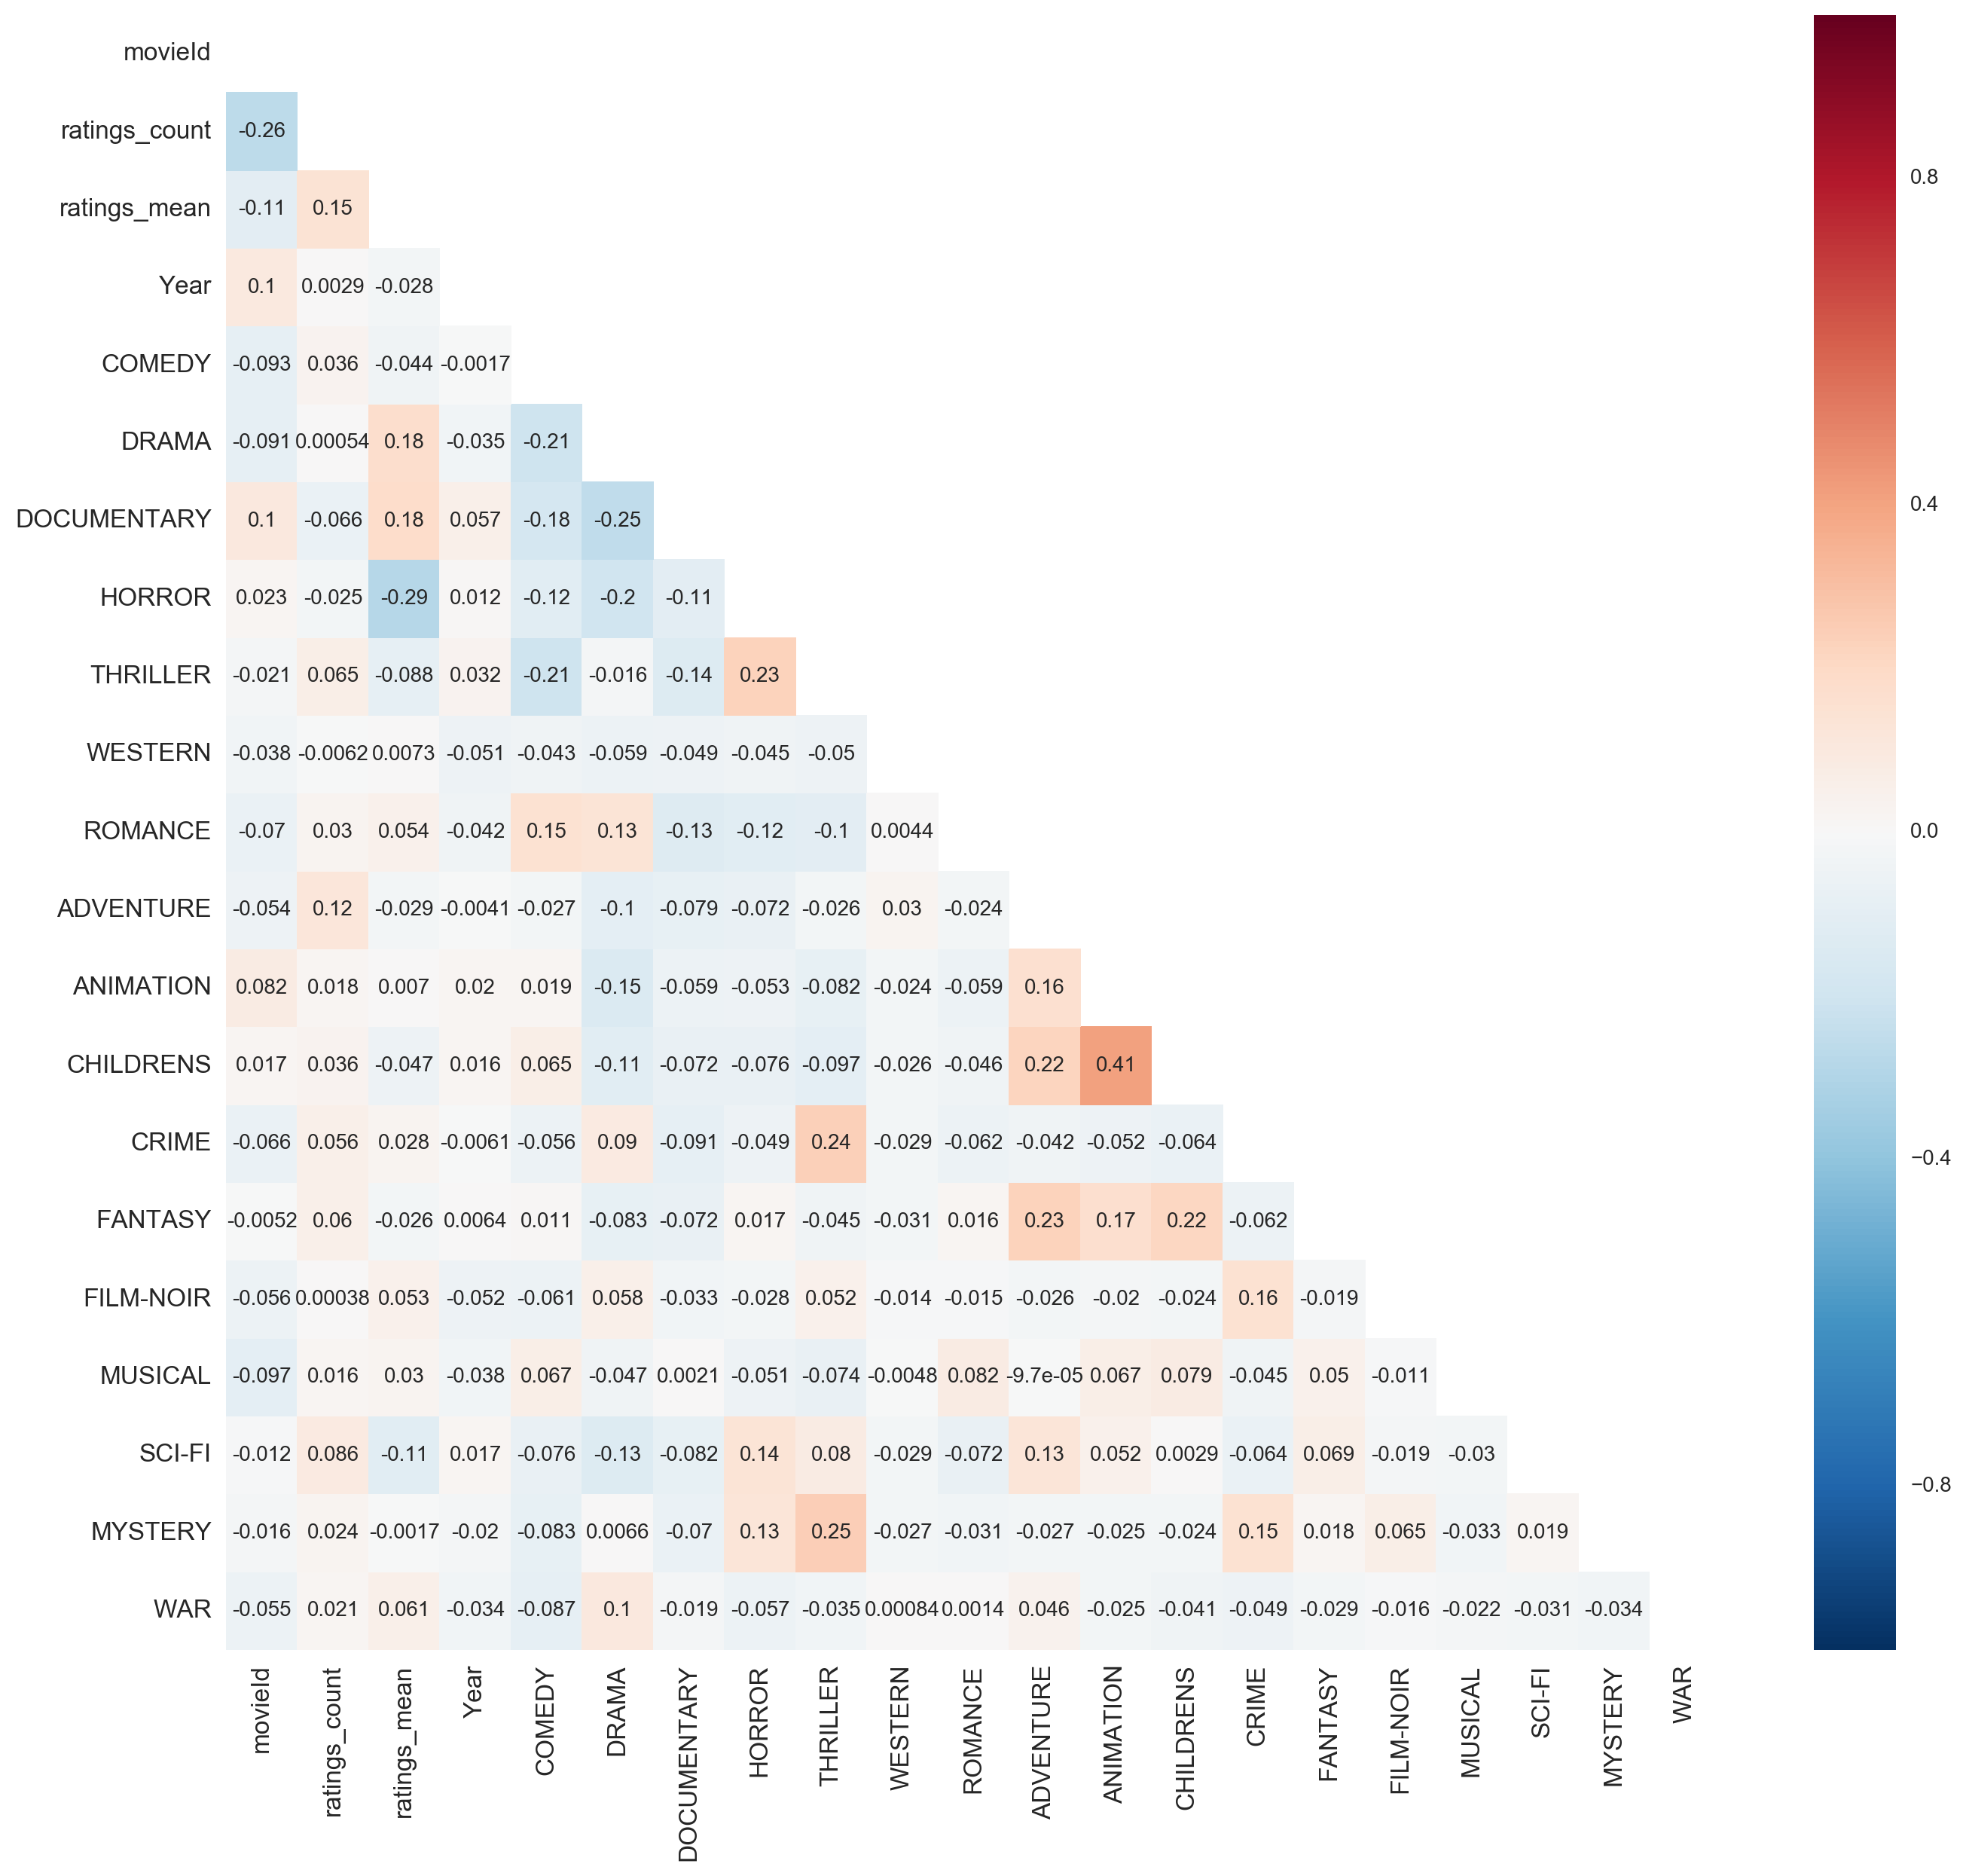

In [41]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(16,14))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()
correlation_heat_map(movies)

We can see that children's movies are very highly correlated with animation, thriller with crime, thriller with mystery, fantasy with adventure, and fantasy with children's. Horror is most negatively correlated with mean ratings.
With those correlated genres we can expect that the prediction of genre from movie's title will be especially problematic as they have much in common. 

### Most times rated movies:

In [101]:
ratings = pd.read_csv("/Users/katerinacapouskova/Desktop/DSI-SF-4-katerinaC/Projects/Capstone/Movies/ml-latest/ratings.csv")

In [102]:
ratings_movies = ratings.merge(movies, how='left', left_on='movieId', right_on='movieId')

In [104]:
movie_ratings_count = pd.DataFrame(ratings_movies.groupby(['title'])['movieId'].count().reset_index())

In [105]:
movie_ratings_count.head()

,title,movieId
0,"""Great Performances"" Cats (1998)",211
1,#1 Cheerleader Camp (2010),6
2,#Horror (2015),9
3,#chicagoGirl: The Social Network Takes on a Di...,3
4,$5 a Day (2008),53


In [106]:
most_rated = movie_ratings_count.sort(columns='movieId', axis=0, ascending=False).head(20).reset_index()

/Applications/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


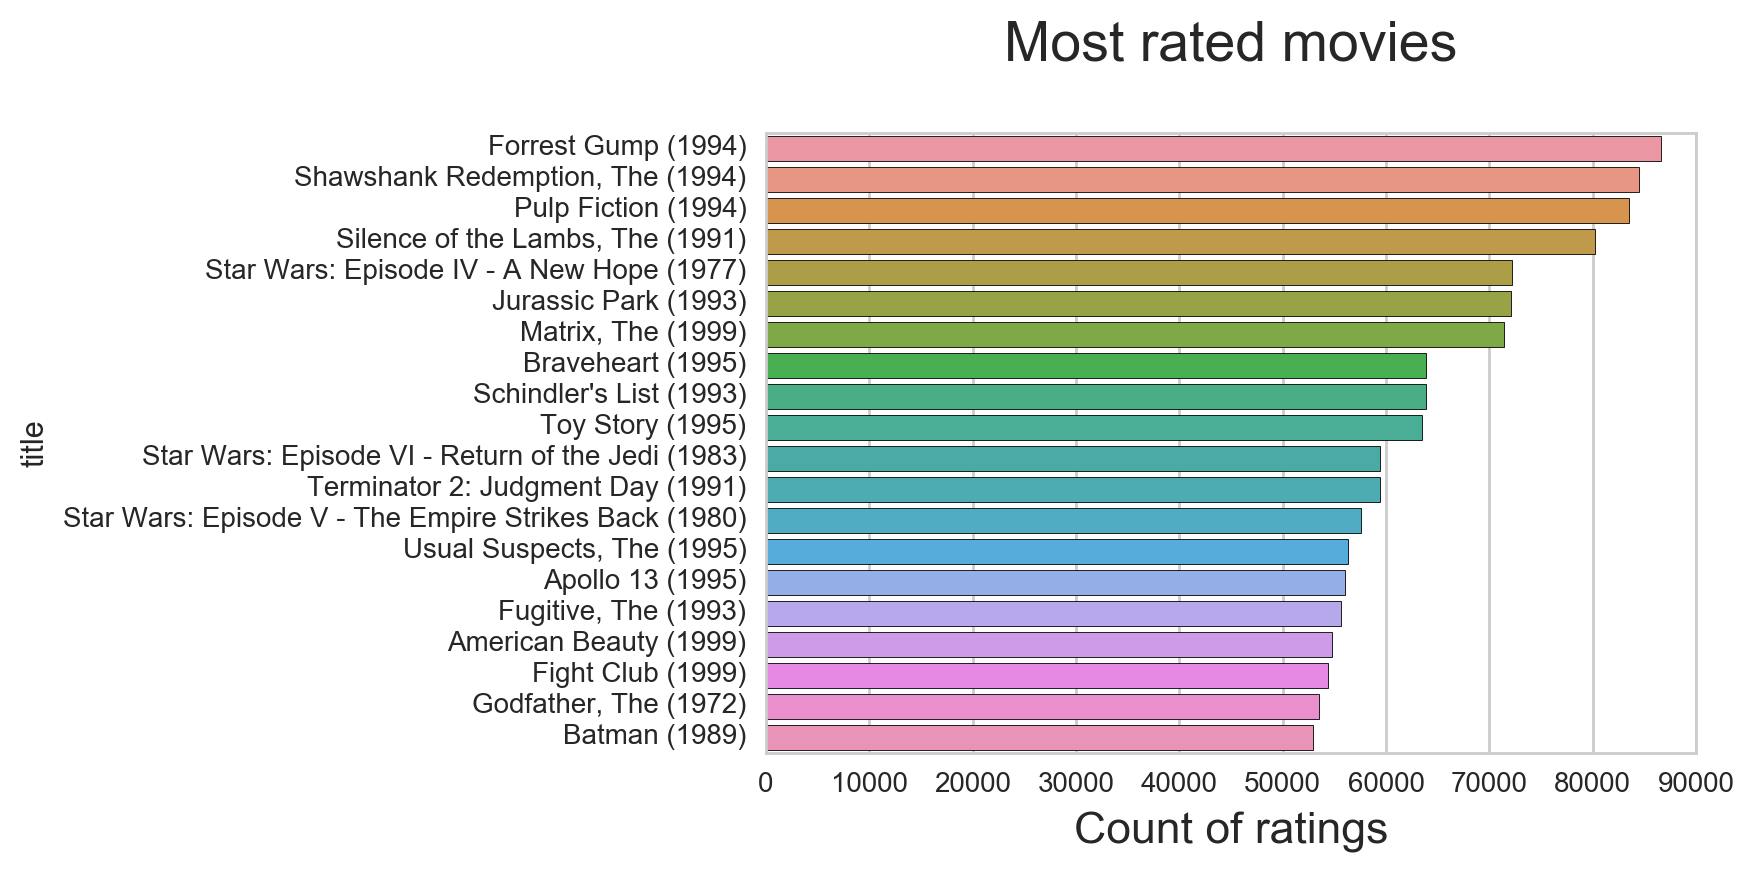

In [107]:
fig = plt.figure(figsize=(6,4))
ax = fig.gca()  #get current axis

ax = sns.barplot(x=most_rated["movieId"], y=most_rated["title"], orient='h')

ax.set_xlabel('Count of ratings', fontsize=16)
ax.set_title('Most rated movies\n', fontsize=20)

plt.show()


### Some more EDA before NLP:

In [42]:
movies.shape

(32573, 24)

Remove missing data:

In [43]:
movies = movies.dropna().reset_index()

In [45]:
movies.head()

,index,movieId,ratings_count,ratings_mean,title,genres,Year,title_list,COMEDY,DRAMA,...,ADVENTURE,ANIMATION,CHILDRENS,CRIME,FANTASY,FILM-NOIR,MUSICAL,SCI-FI,MYSTERY,WAR
0,0,1,63469,3.889300,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,"[Toy, Story]",1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,2,25045,3.229527,Jumanji (1995),Adventure|Children|Fantasy,1995.0,[Jumanji],0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,3,15381,3.178142,Grumpier Old Men (1995),Comedy|Romance,1995.0,"[Grumpier, Old, Men]",1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4,2961,2.879433,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,"[Waiting, to, Exhale]",1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5,15023,3.080410,Father of the Bride Part II (1995),Comedy,1995.0,"[Father, of, the, Bride, Part, II]",1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Unwrap the title list as a string:

In [58]:
movies['title_list'] = movies['title_list'].map(lambda x: ', '.join(x))

### Set up a tfidf vectorizer to see what words are mostly unique for each genre:

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', encoding='utf-8')

# Set X to the return of fit_transform.
X = vectorizer.fit_transform(movies['title_list'])

In [61]:
X.toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [62]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

Rename the index column to merge with movies df.

In [63]:
df.index.name = 'index'

#### Join Tfidf dataframe with movies dataframe to have the target as well:

In [64]:
movies_tfidf = movies.join(df, on=None, how='left', rsuffix='_')

In [65]:
sorted_movies = movies_tfidf.iloc[:,26:].sum(axis=0, skipna=True, level=None, numeric_only=None)


In [66]:
colors = [ "#5757FF",
"#62A9FF",
"#62D0FF","#06DCFB","#01FCEF","#03EBA6","#01F33E",
"#6A6AFF",
"#75B4FF",
"#75D6FF","#24E0FB","#1FFEF3","#03F3AB","#0AFE47",
"#7979FF",
"#86BCFF","#8ADCFF","#3DE4FC","#5FFEF7","#33FDC0","#4BFE78",
"#8C8CFF","#99C7FF","#99E0FF","#63E9FC","#74FEF8","#62FDCE","#72FE95",
"#9999FF","#99C7FF","#A8E4FF","#75ECFD","#92FEF9","#7DFDD7","#8BFEA8",
"#AAAAFF","#A8CFFF","#BBEBFF","#8CEFFD","#A5FEFA","#8FFEDD","#A3FEBA",
"#BBBBFF","#BBDAFF","#CEF0FF","#ACF3FD","#B5FFFC","#A5FEE3","#B5FFC8",
"#CACAFF","#D0E6FF","#D9F3FF","#C0F7FE","#CEFFFD","#BEFEEB","#CAFFD8",
"#E1E1FF","#DBEBFF","#ECFAFF","#C0F7FE","#E1FFFE","#BDFFEA","#EAFFEF",
"#EEEEFF","#ECF4FF","#F9FDFF","#E6FCFF","#F2FFFE","#CFFEF0","#EAFFEF"
"#F9F9FF","#F9FCFF","#FDFEFF","#F9FEFF","#FDFFFF","#F7FFFD","#F9FFFB",
]

colors_40 = [x for x in colors[0:40]]

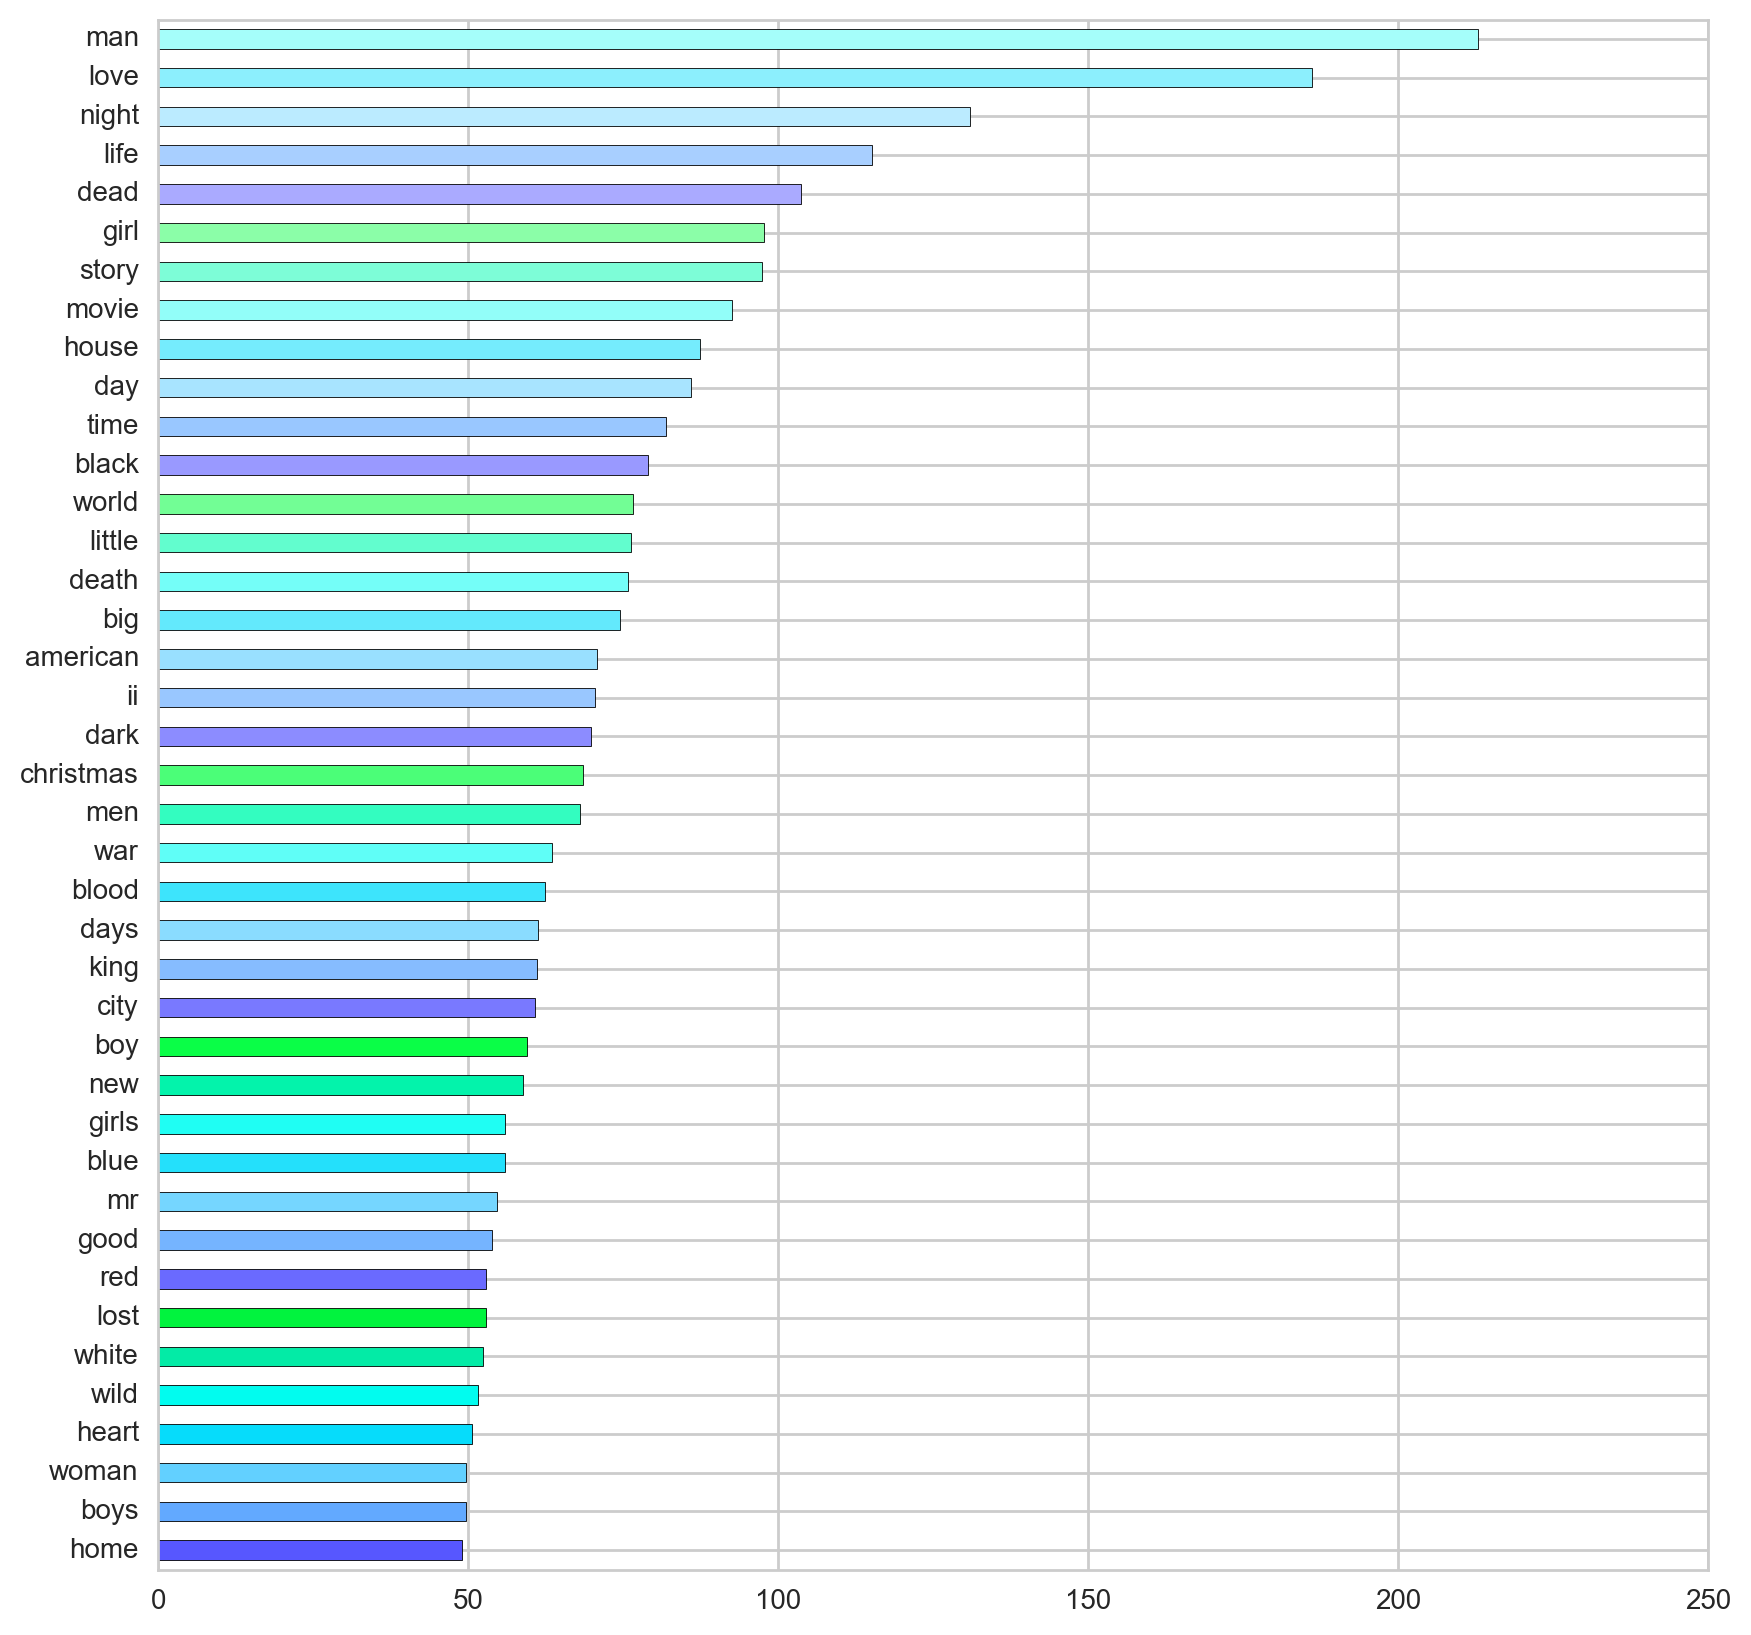

In [67]:
sorted_movies.sort_values().tail(40).plot(kind='barh', figsize=(10,10), color=colors_40)

In [69]:
comedy_df = movies_tfidf[movies_tfidf['COMEDY'] == 1]
drama_df = movies_tfidf[movies_tfidf['DRAMA'] == 1]
thriller_df = movies_tfidf[movies_tfidf['THRILLER'] == 1]
documentary_df = movies_tfidf[movies_tfidf['DOCUMENTARY'] == 1]
romance_df = movies_tfidf[movies_tfidf['ROMANCE'] == 1]
horror_df = movies_tfidf[movies_tfidf['HORROR'] == 1]
western_df = movies_tfidf[movies_tfidf['WESTERN'] == 1]
adventure_df = movies_tfidf[movies_tfidf['ADVENTURE'] == 1]
animation_df = movies_tfidf[movies_tfidf['ANIMATION'] == 1]
childrens_df = movies_tfidf[movies_tfidf['CHILDRENS'] == 1]
crime_df = movies_tfidf[movies_tfidf['CRIME'] == 1]
fantasy_df = movies_tfidf[movies_tfidf['FANTASY'] == 1]
film_noir_df = movies_tfidf[movies_tfidf['FILM-NOIR'] == 1]
musical_df = movies_tfidf[movies_tfidf['MUSICAL'] == 1]
sci_fi_df = movies_tfidf[movies_tfidf['SCI-FI'] == 1]
mystery_df = movies_tfidf[movies_tfidf['MYSTERY'] == 1]
war_df = movies_tfidf[movies_tfidf['WAR'] == 1]


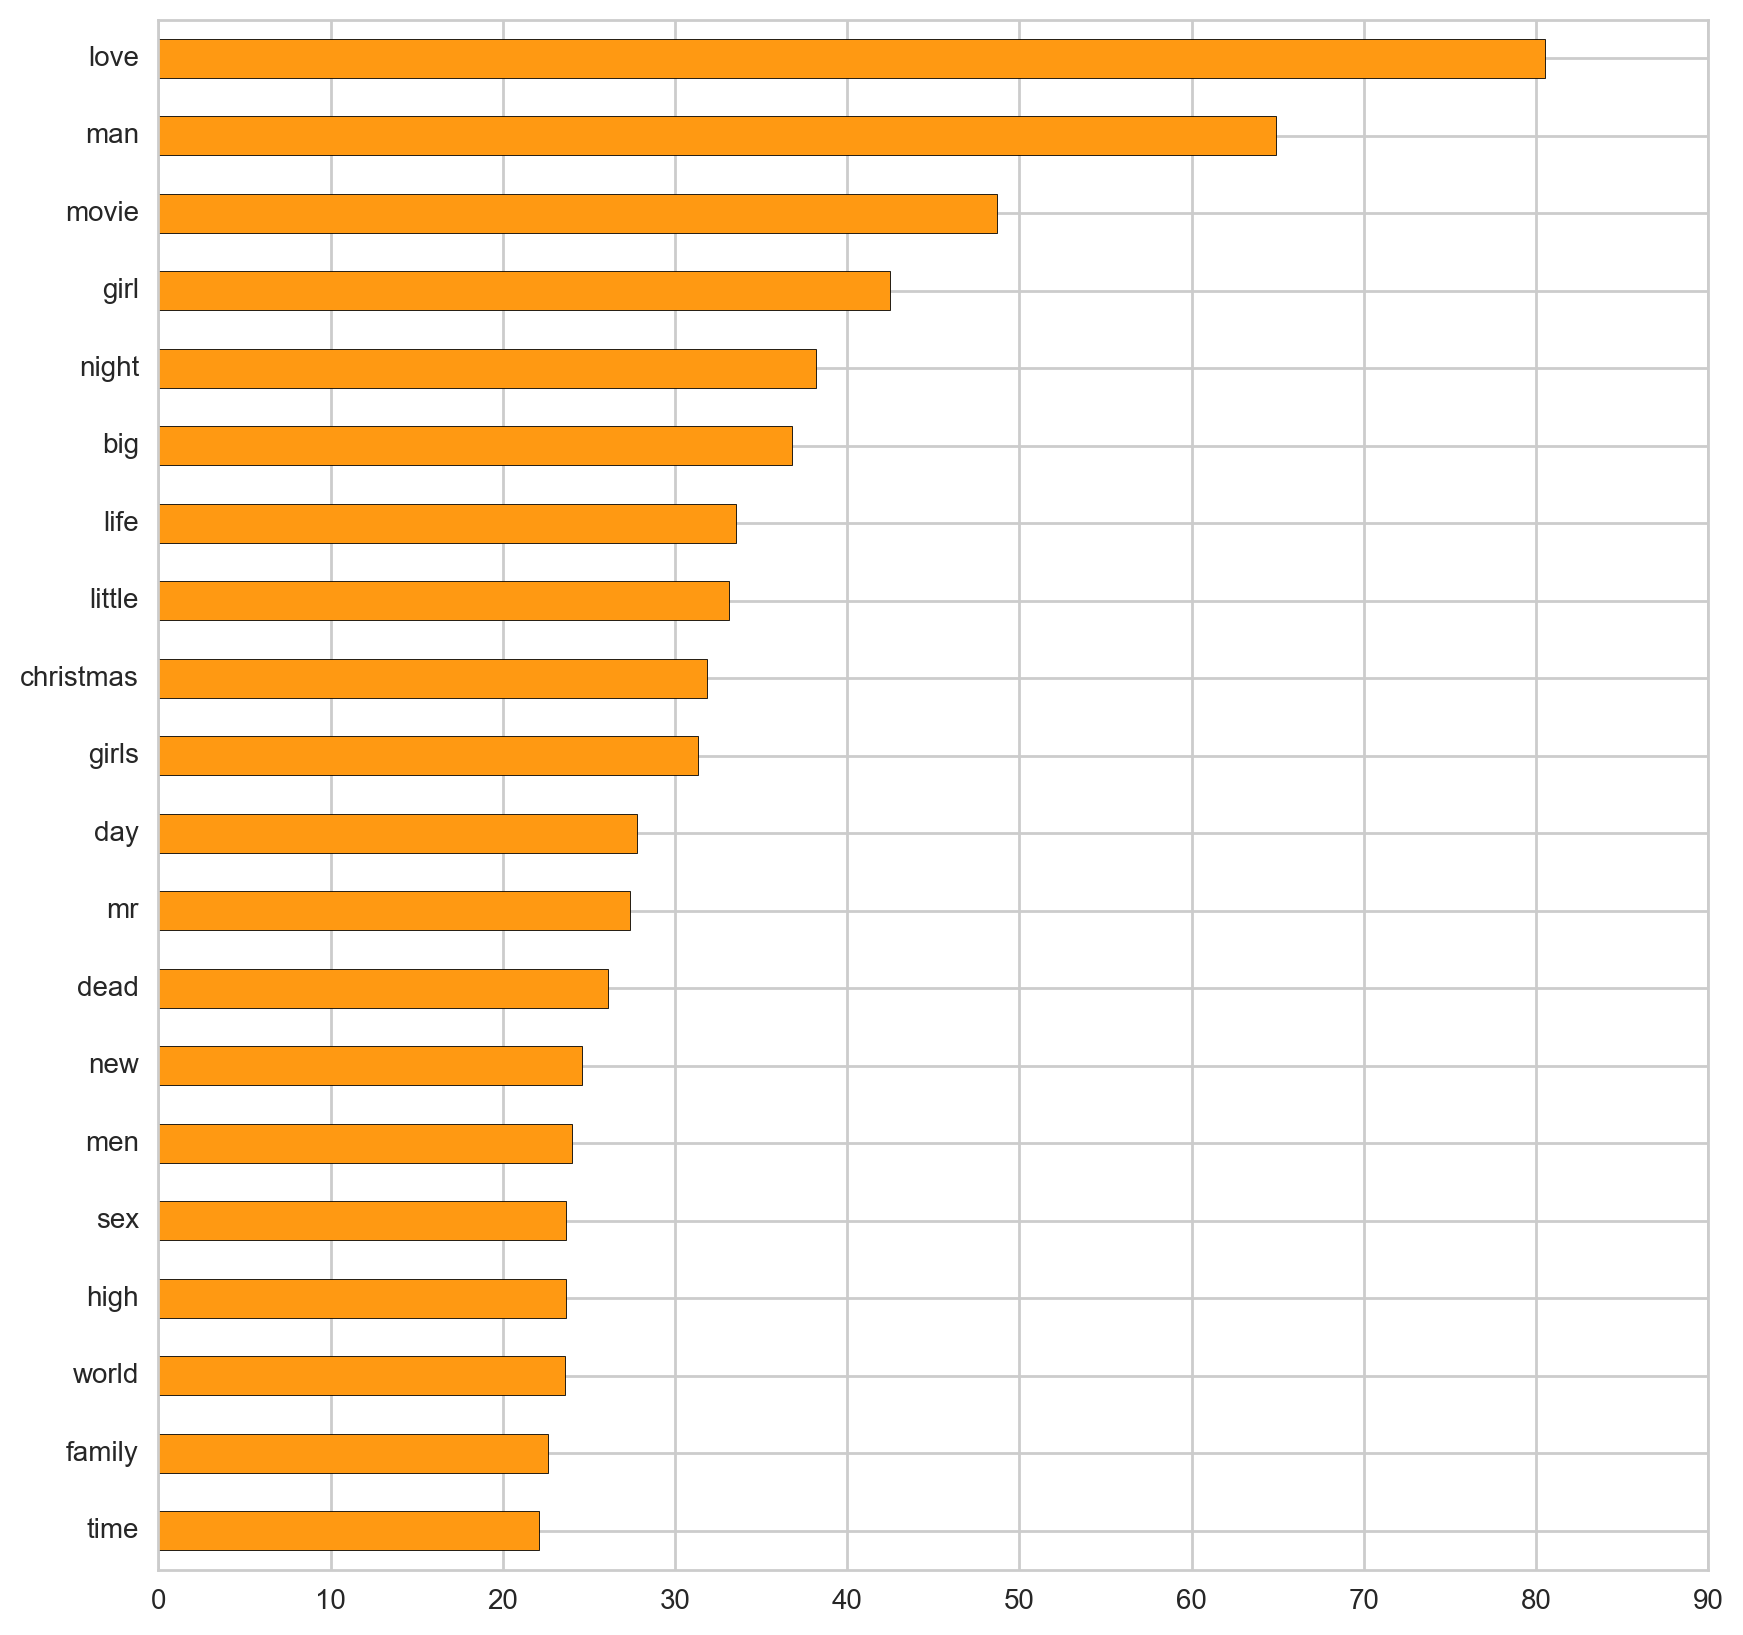

In [70]:
sorted_comedy = comedy_df.iloc[:,26:].sum(axis=0, skipna=True, level=None, numeric_only=None)
sorted_comedy.sort_values().tail(20).plot(kind='barh', figsize=(10,10), color="#FF9912")

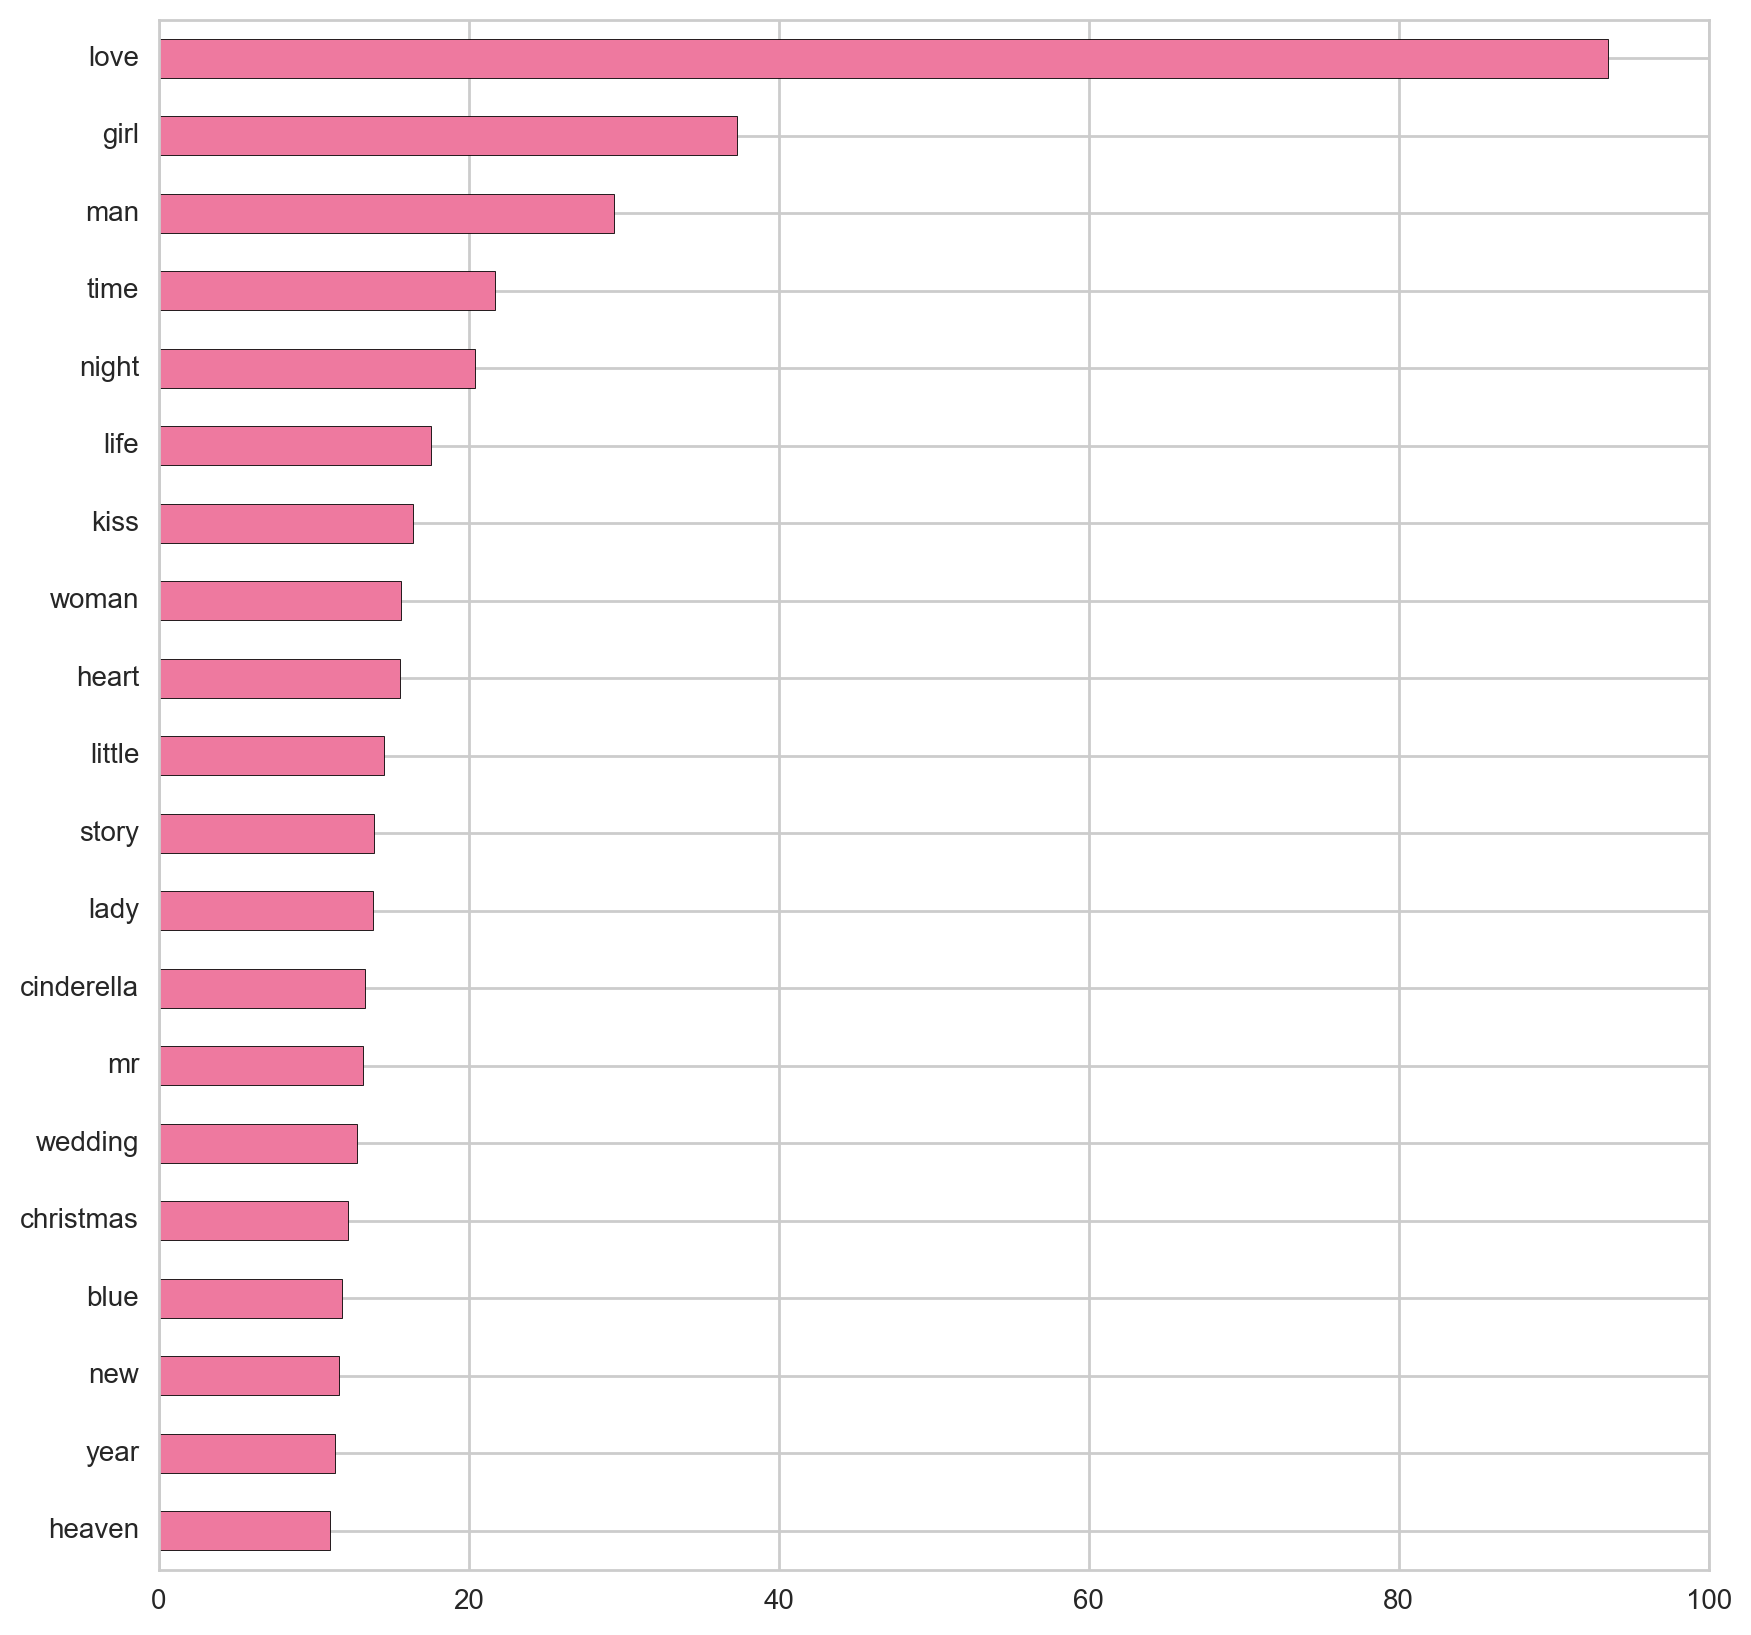

In [71]:
sorted_romance = romance_df.iloc[:,26:].sum(axis=0, skipna=True, level=None, numeric_only=None)
sorted_romance.sort_values().tail(20).plot(kind='barh', figsize=(10,10), color="#EE799F")

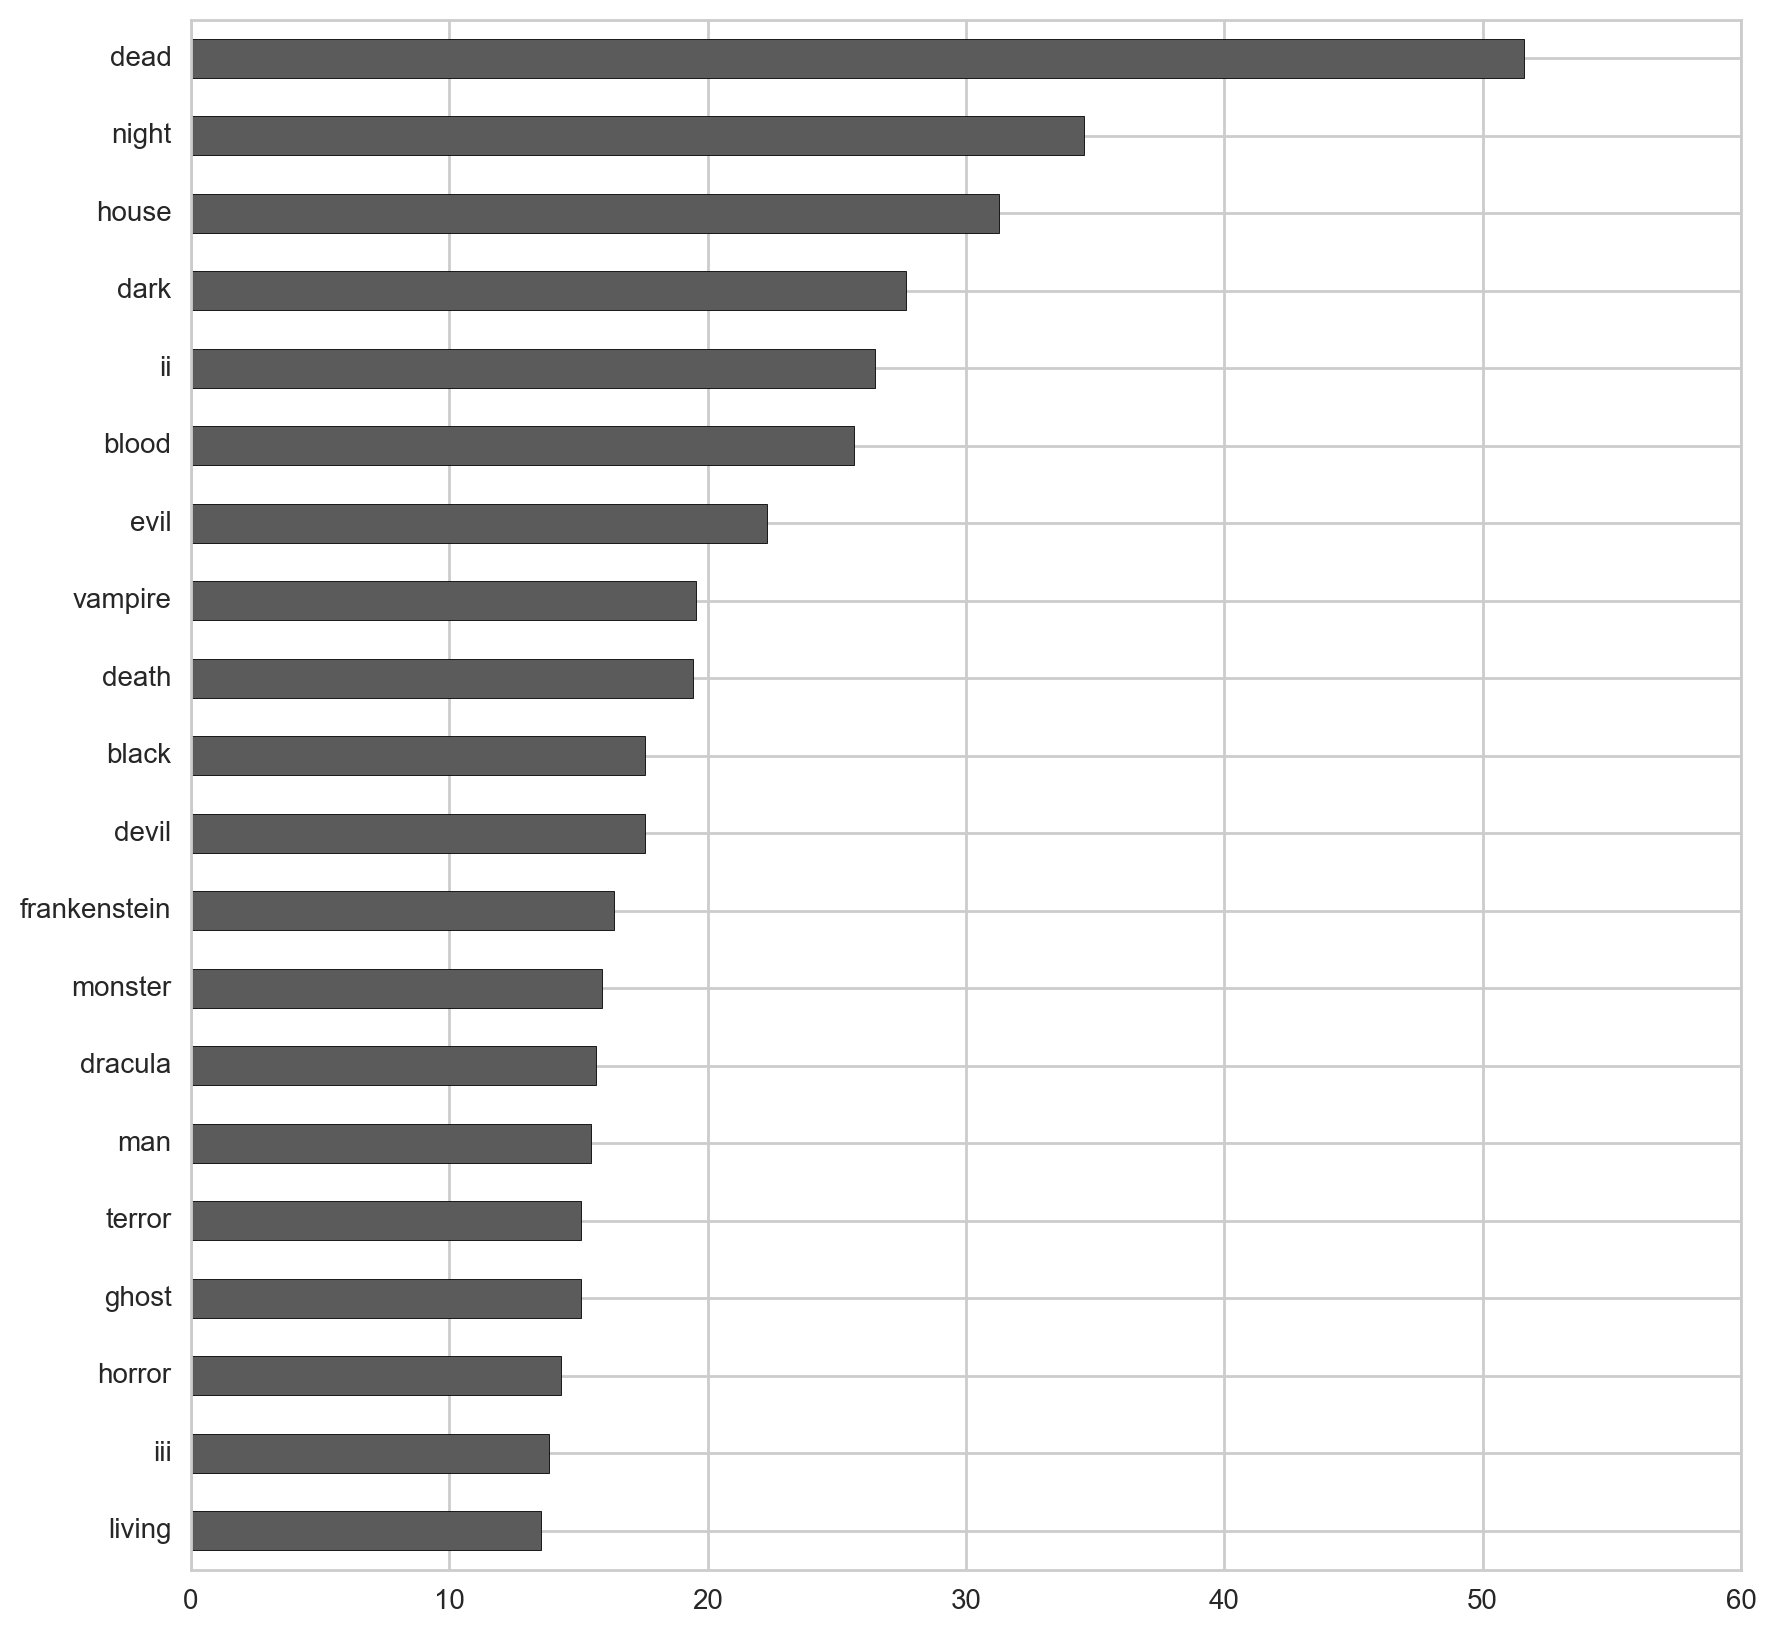

In [72]:
sorted_horror = horror_df.iloc[:,26:].sum(axis=0, skipna=True, level=None, numeric_only=None)
sorted_horror.sort_values().tail(20).plot(kind='barh', figsize=(10,10), color="#5B5B5B")

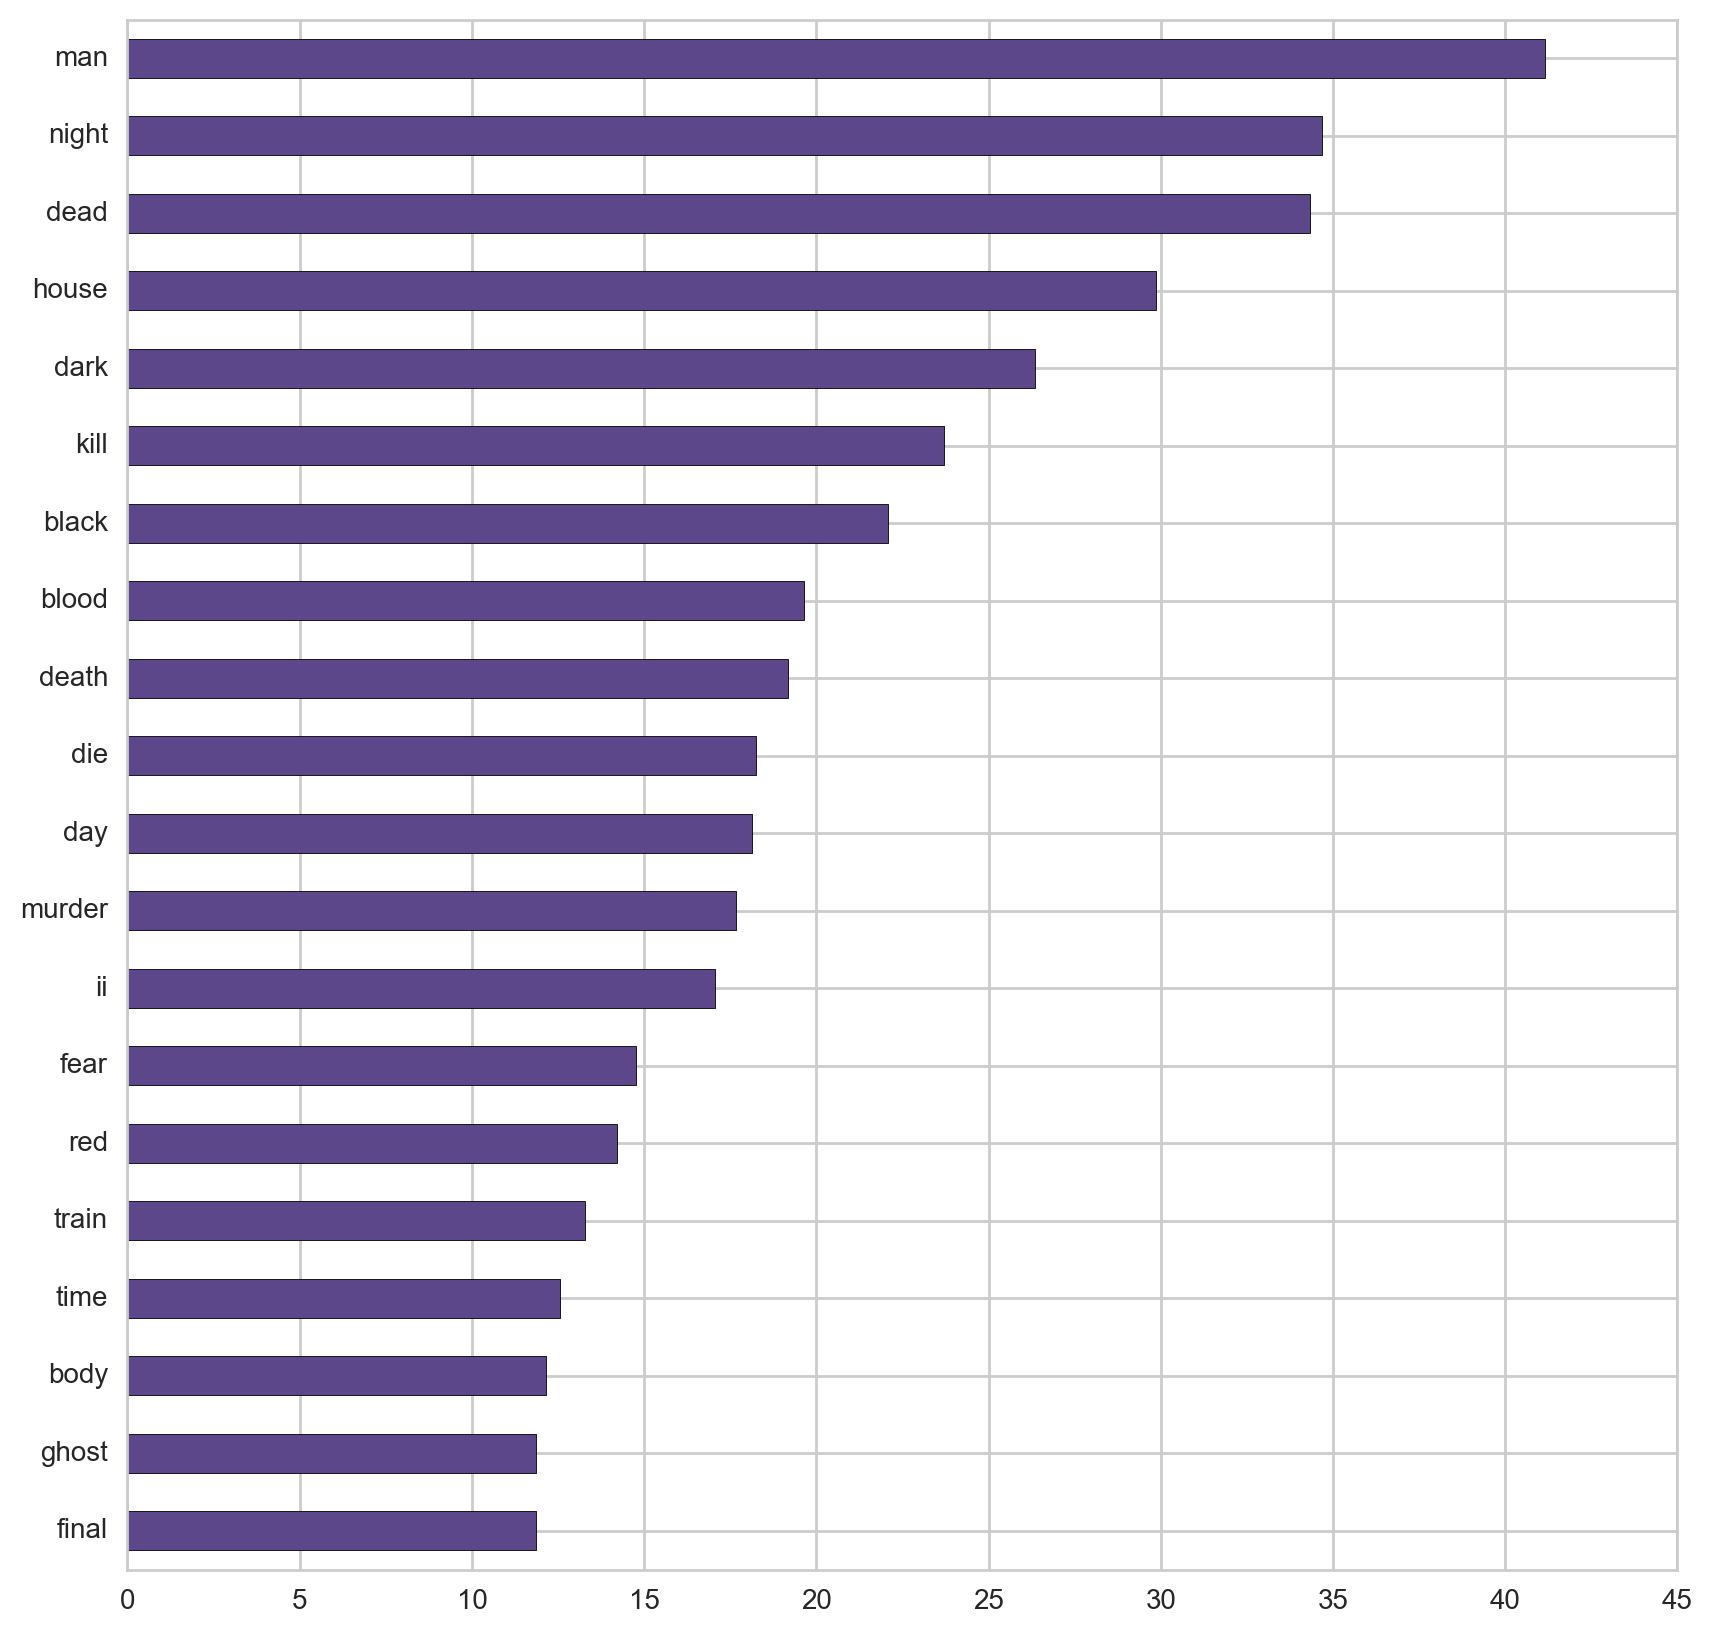

In [73]:
sorted_thriller = thriller_df.iloc[:,26:].sum(axis=0, skipna=True, level=None, numeric_only=None)
sorted_thriller.sort_values().tail(20).plot(kind='barh', figsize=(10,10), color="#5D478B")

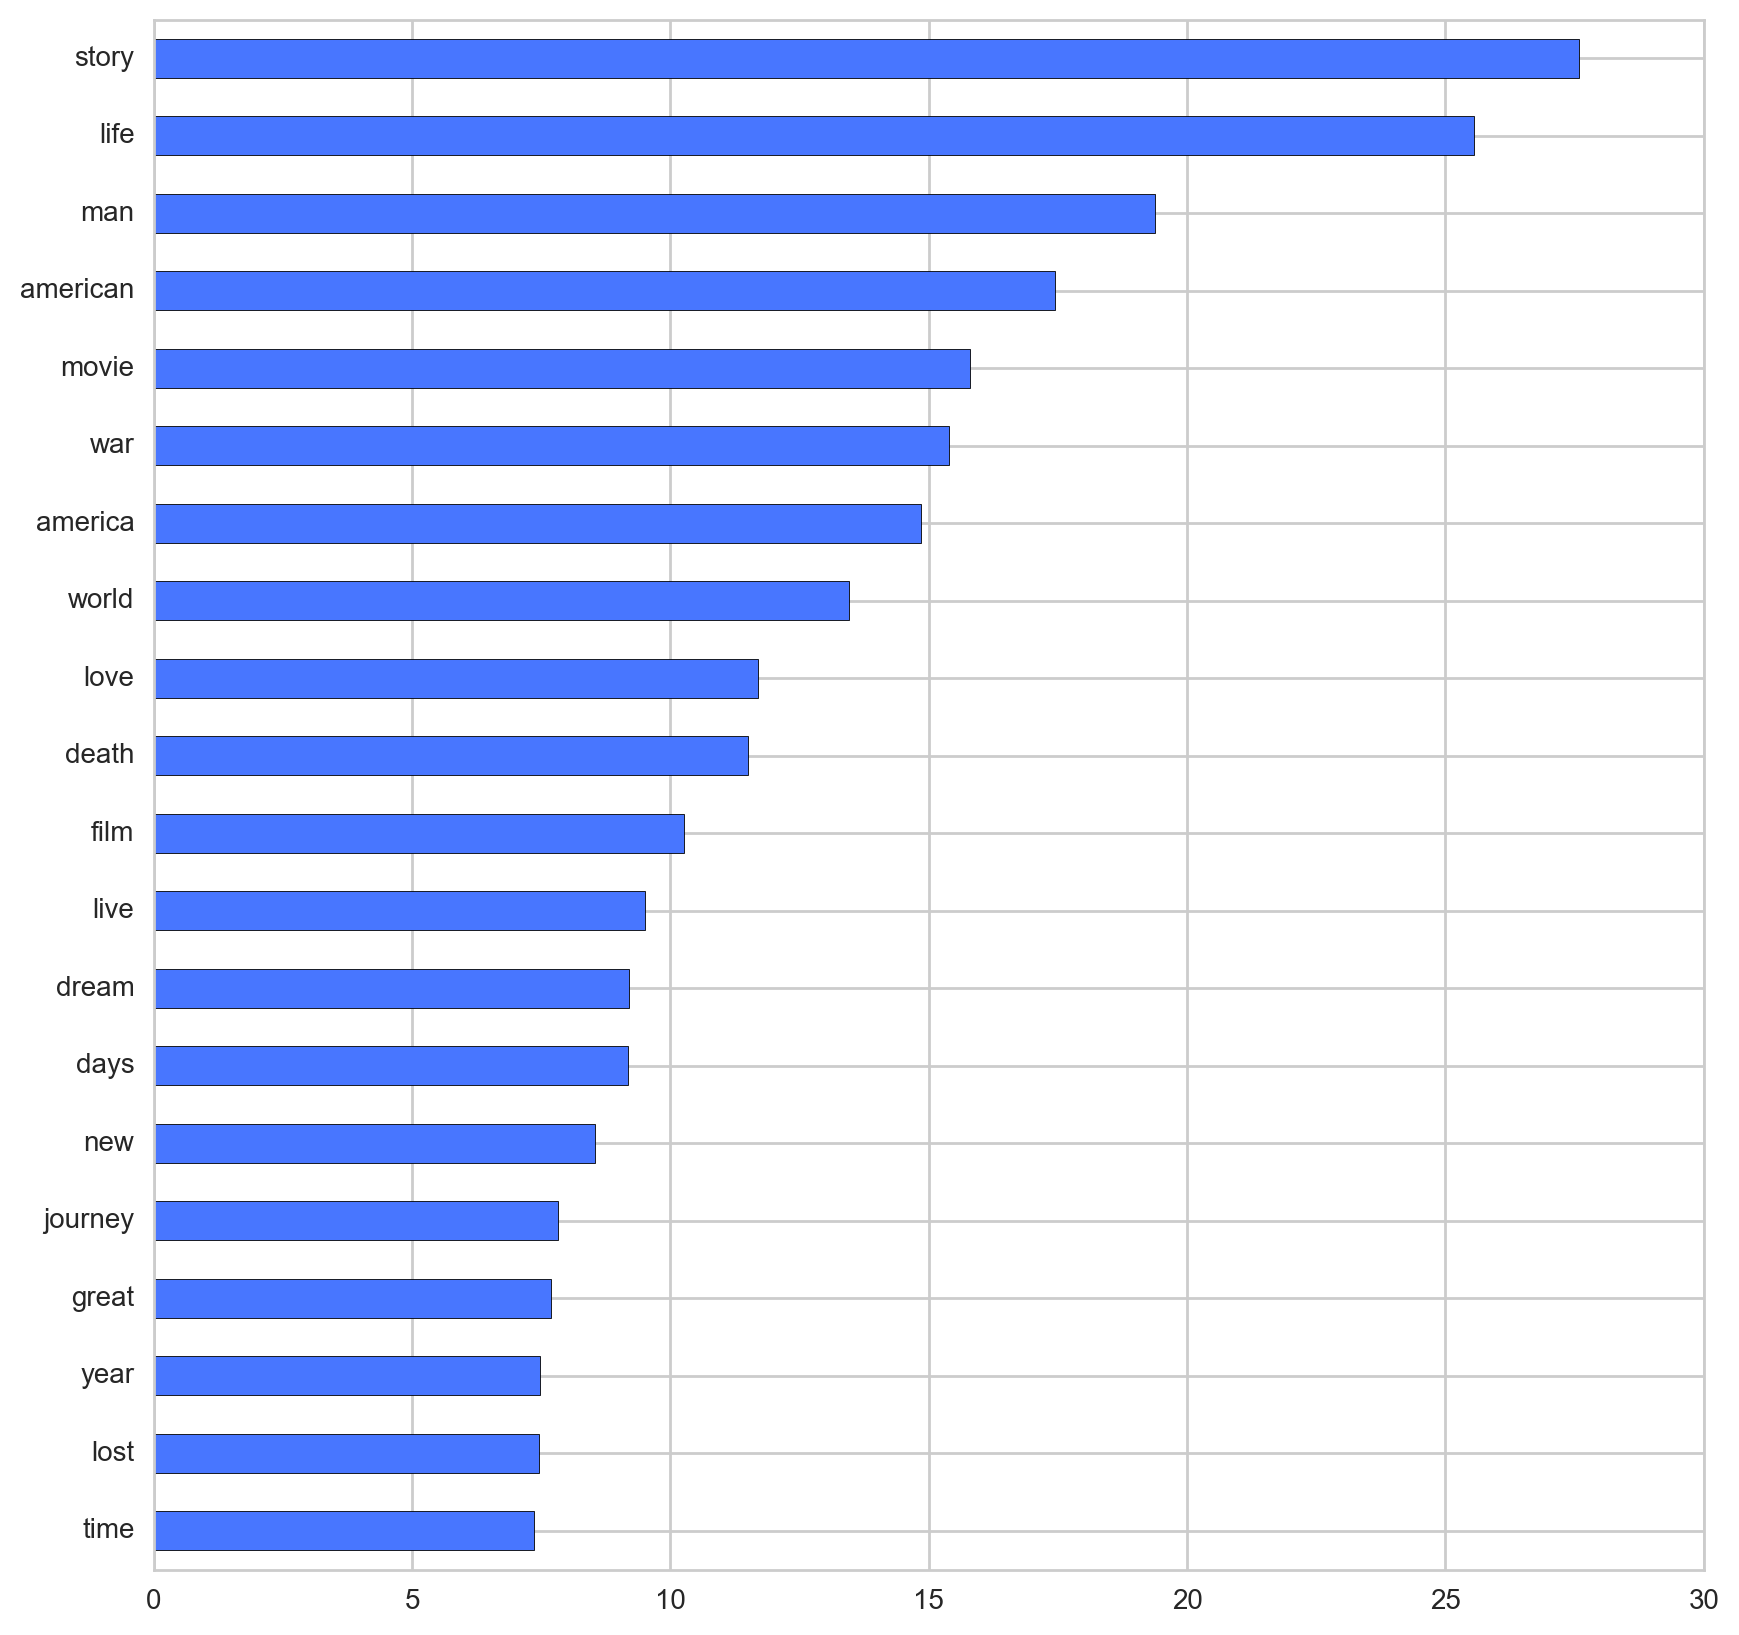

In [74]:
sorted_documentary = documentary_df.iloc[:,26:].sum(axis=0, skipna=True, level=None, numeric_only=None)
sorted_documentary.sort_values().tail(20).plot(kind='barh', figsize=(10,10), color="#4876FF")

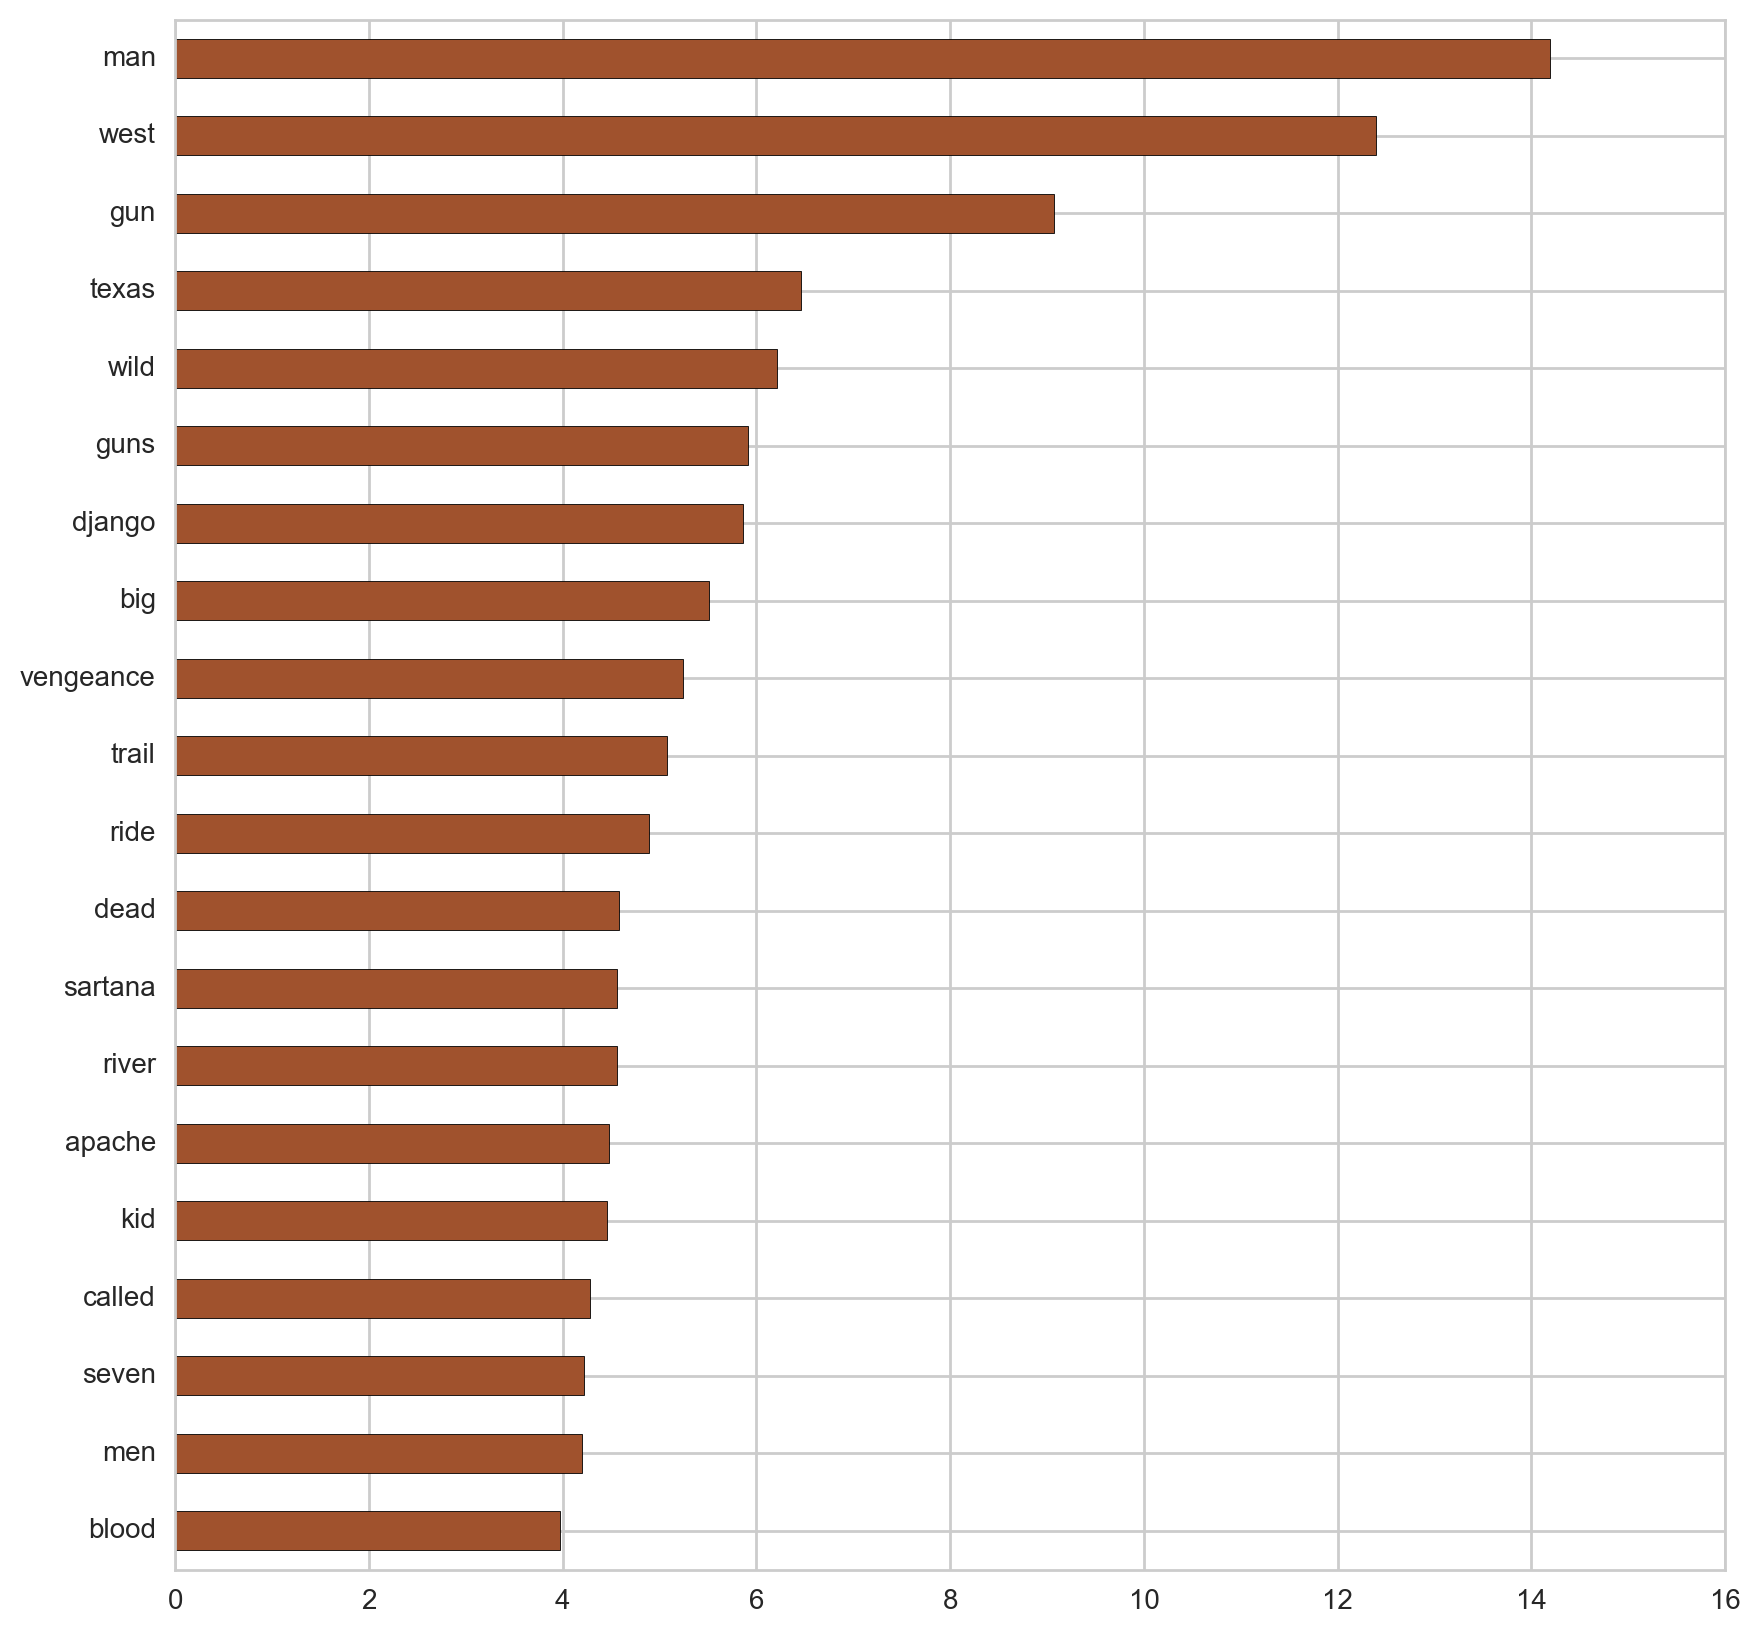

In [75]:
sorted_western = western_df.iloc[:,26:].sum(axis=0, skipna=True, level=None, numeric_only=None)
sorted_western.sort_values().tail(20).plot(kind='barh', figsize=(10,10), color="#A0522D")

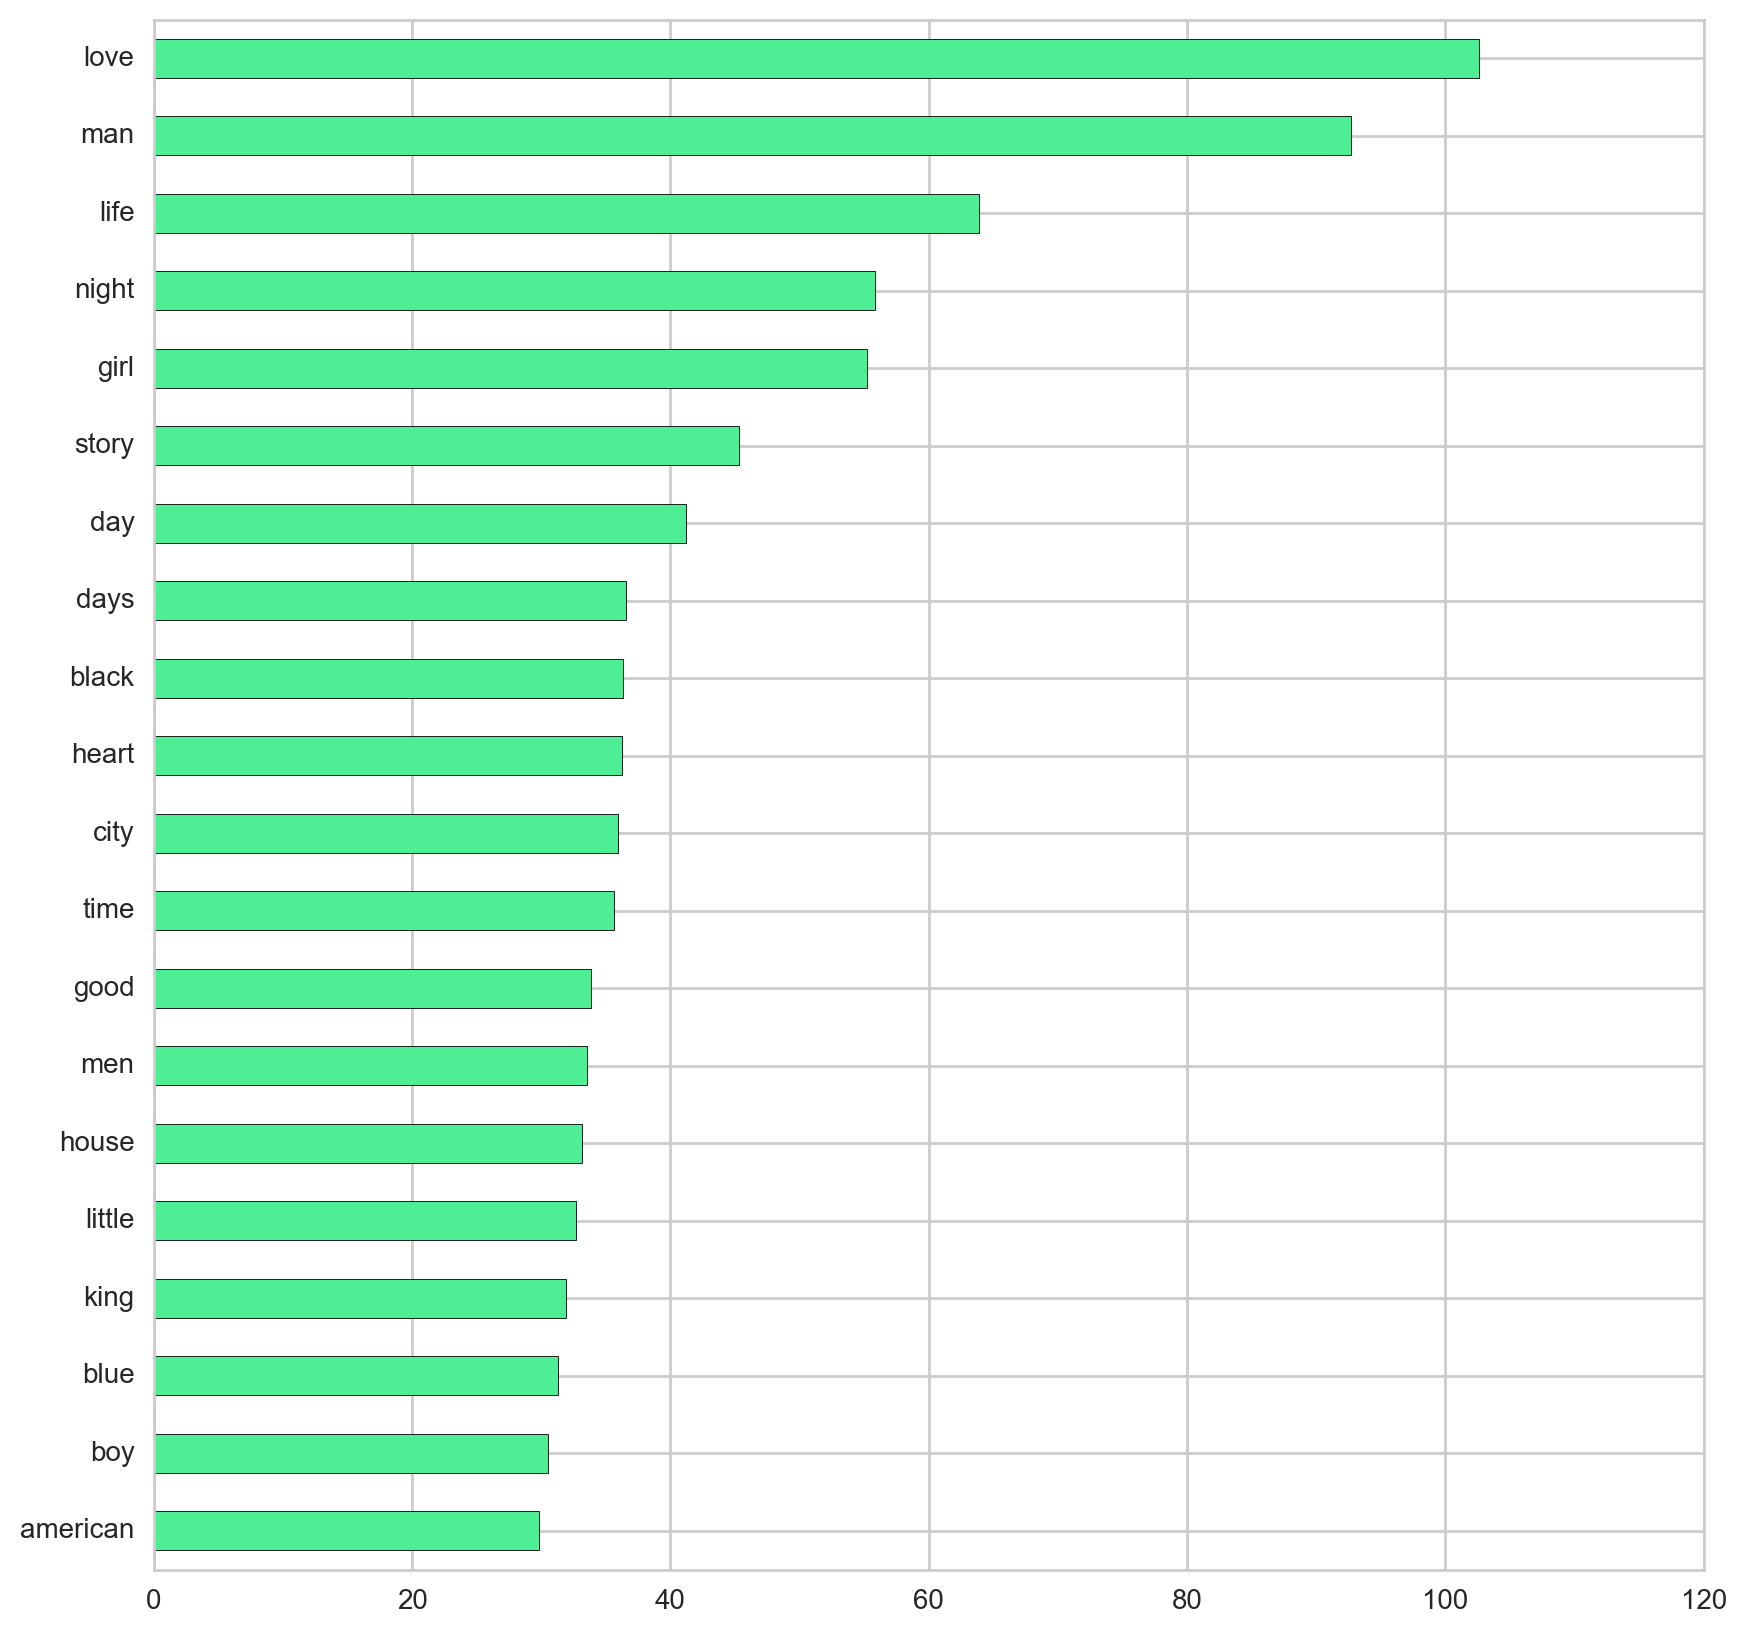

In [76]:
sorted_drama = drama_df.iloc[:,26:].sum(axis=0, skipna=True, level=None, numeric_only=None)
sorted_drama.sort_values().tail(20).plot(kind='barh', figsize=(10,10), color="#4EEE94")

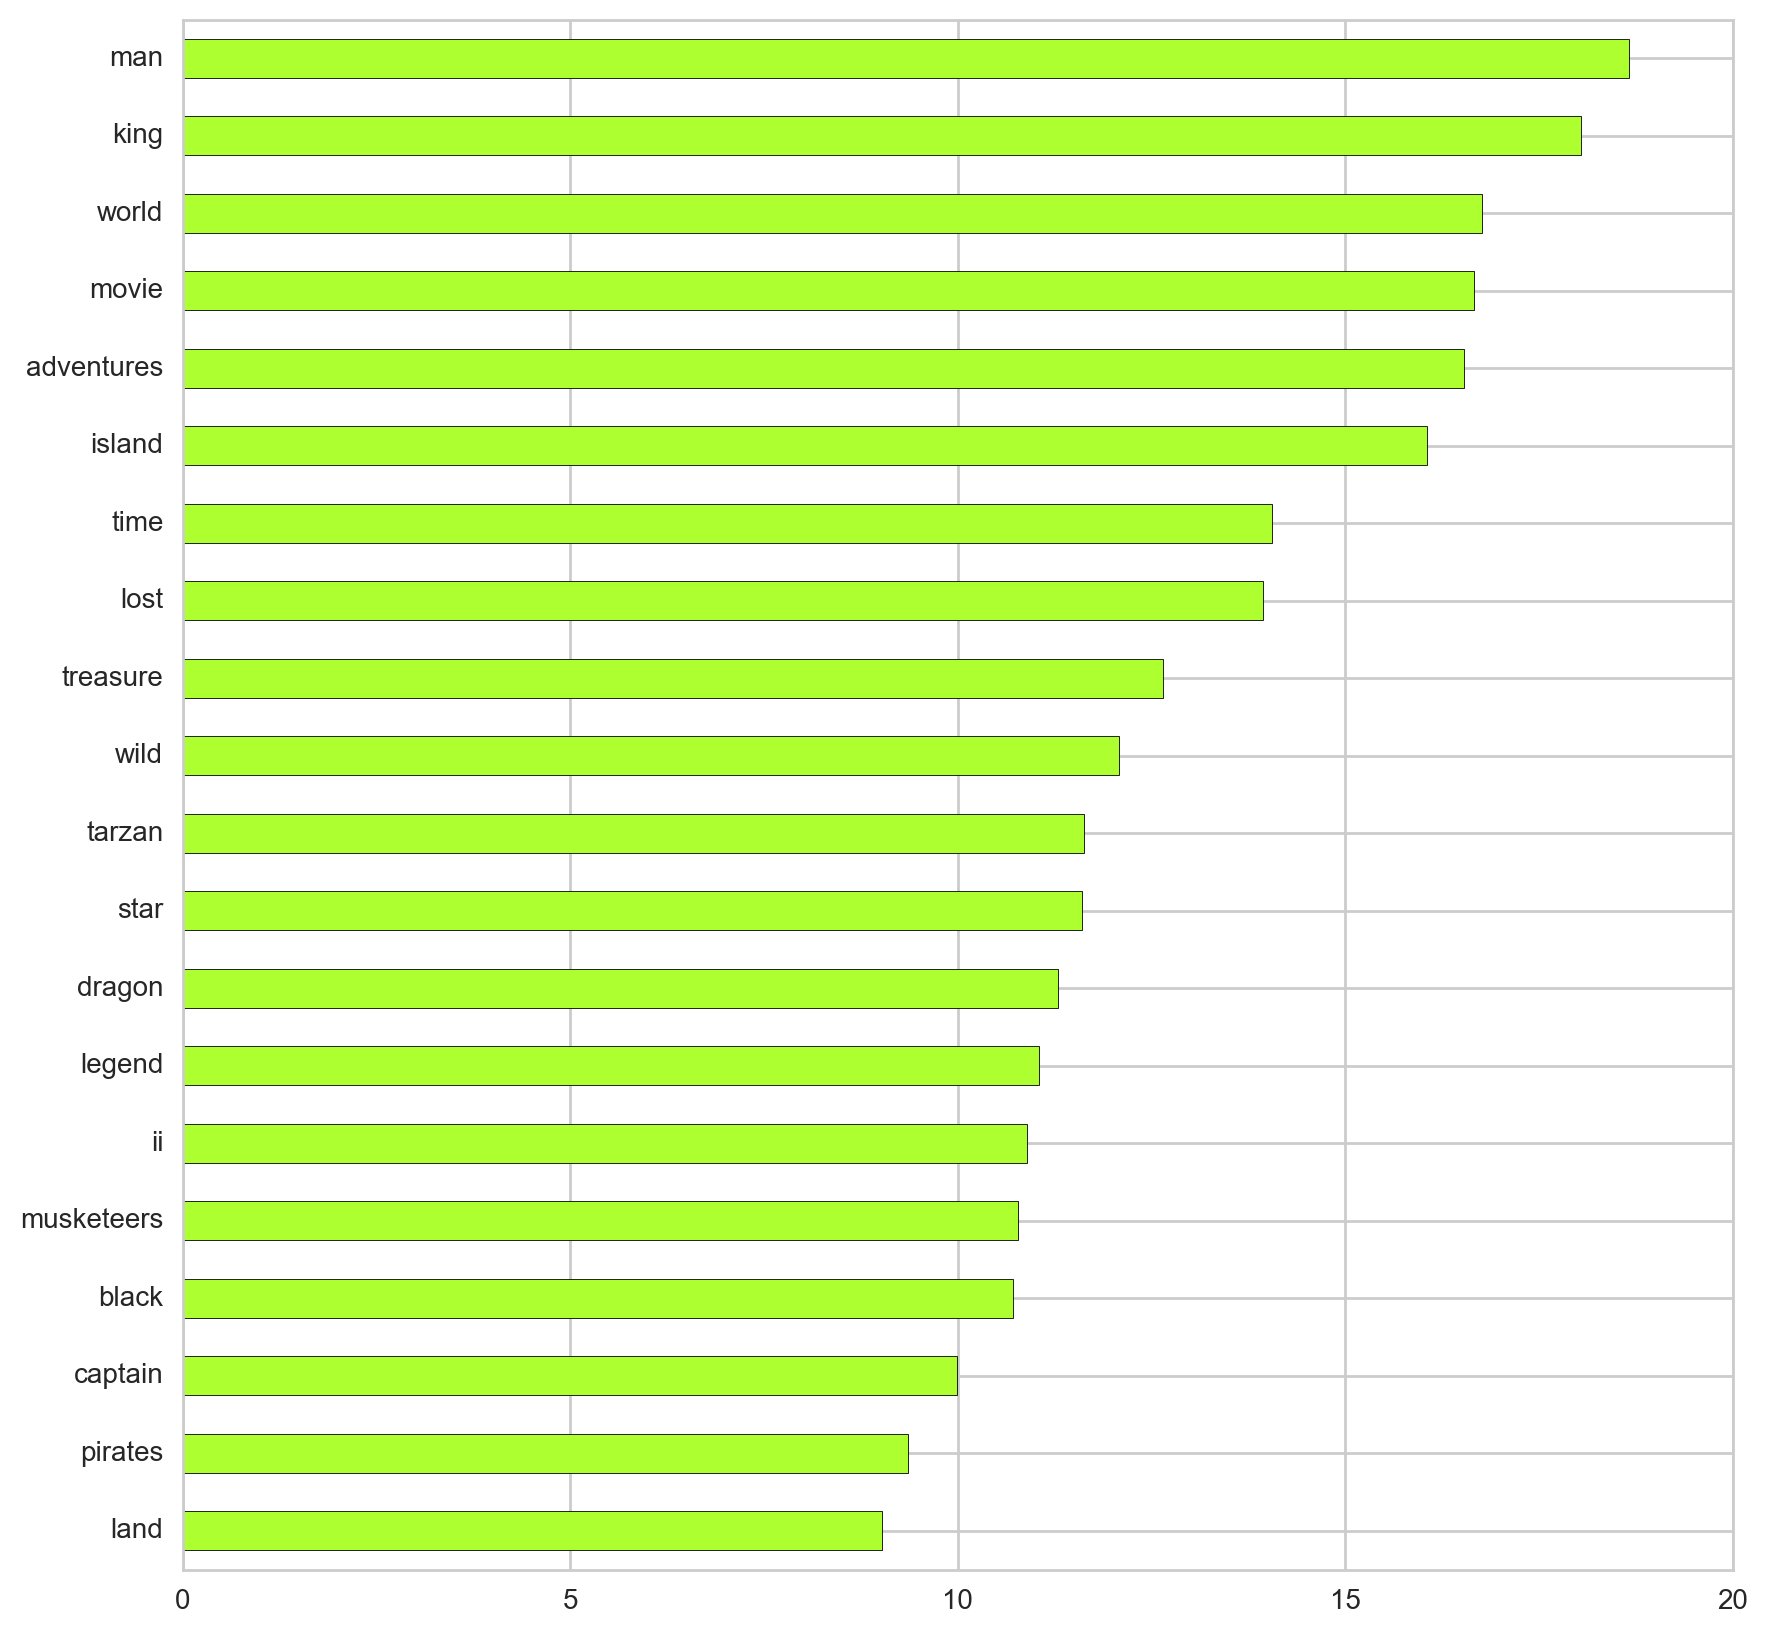

In [77]:
sorted_adventure = adventure_df.iloc[:,26:].sum(axis=0, skipna=True, level=None, numeric_only=None)
sorted_adventure.sort_values().tail(20).plot(kind='barh', figsize=(10,10), color="#ADFF2F")

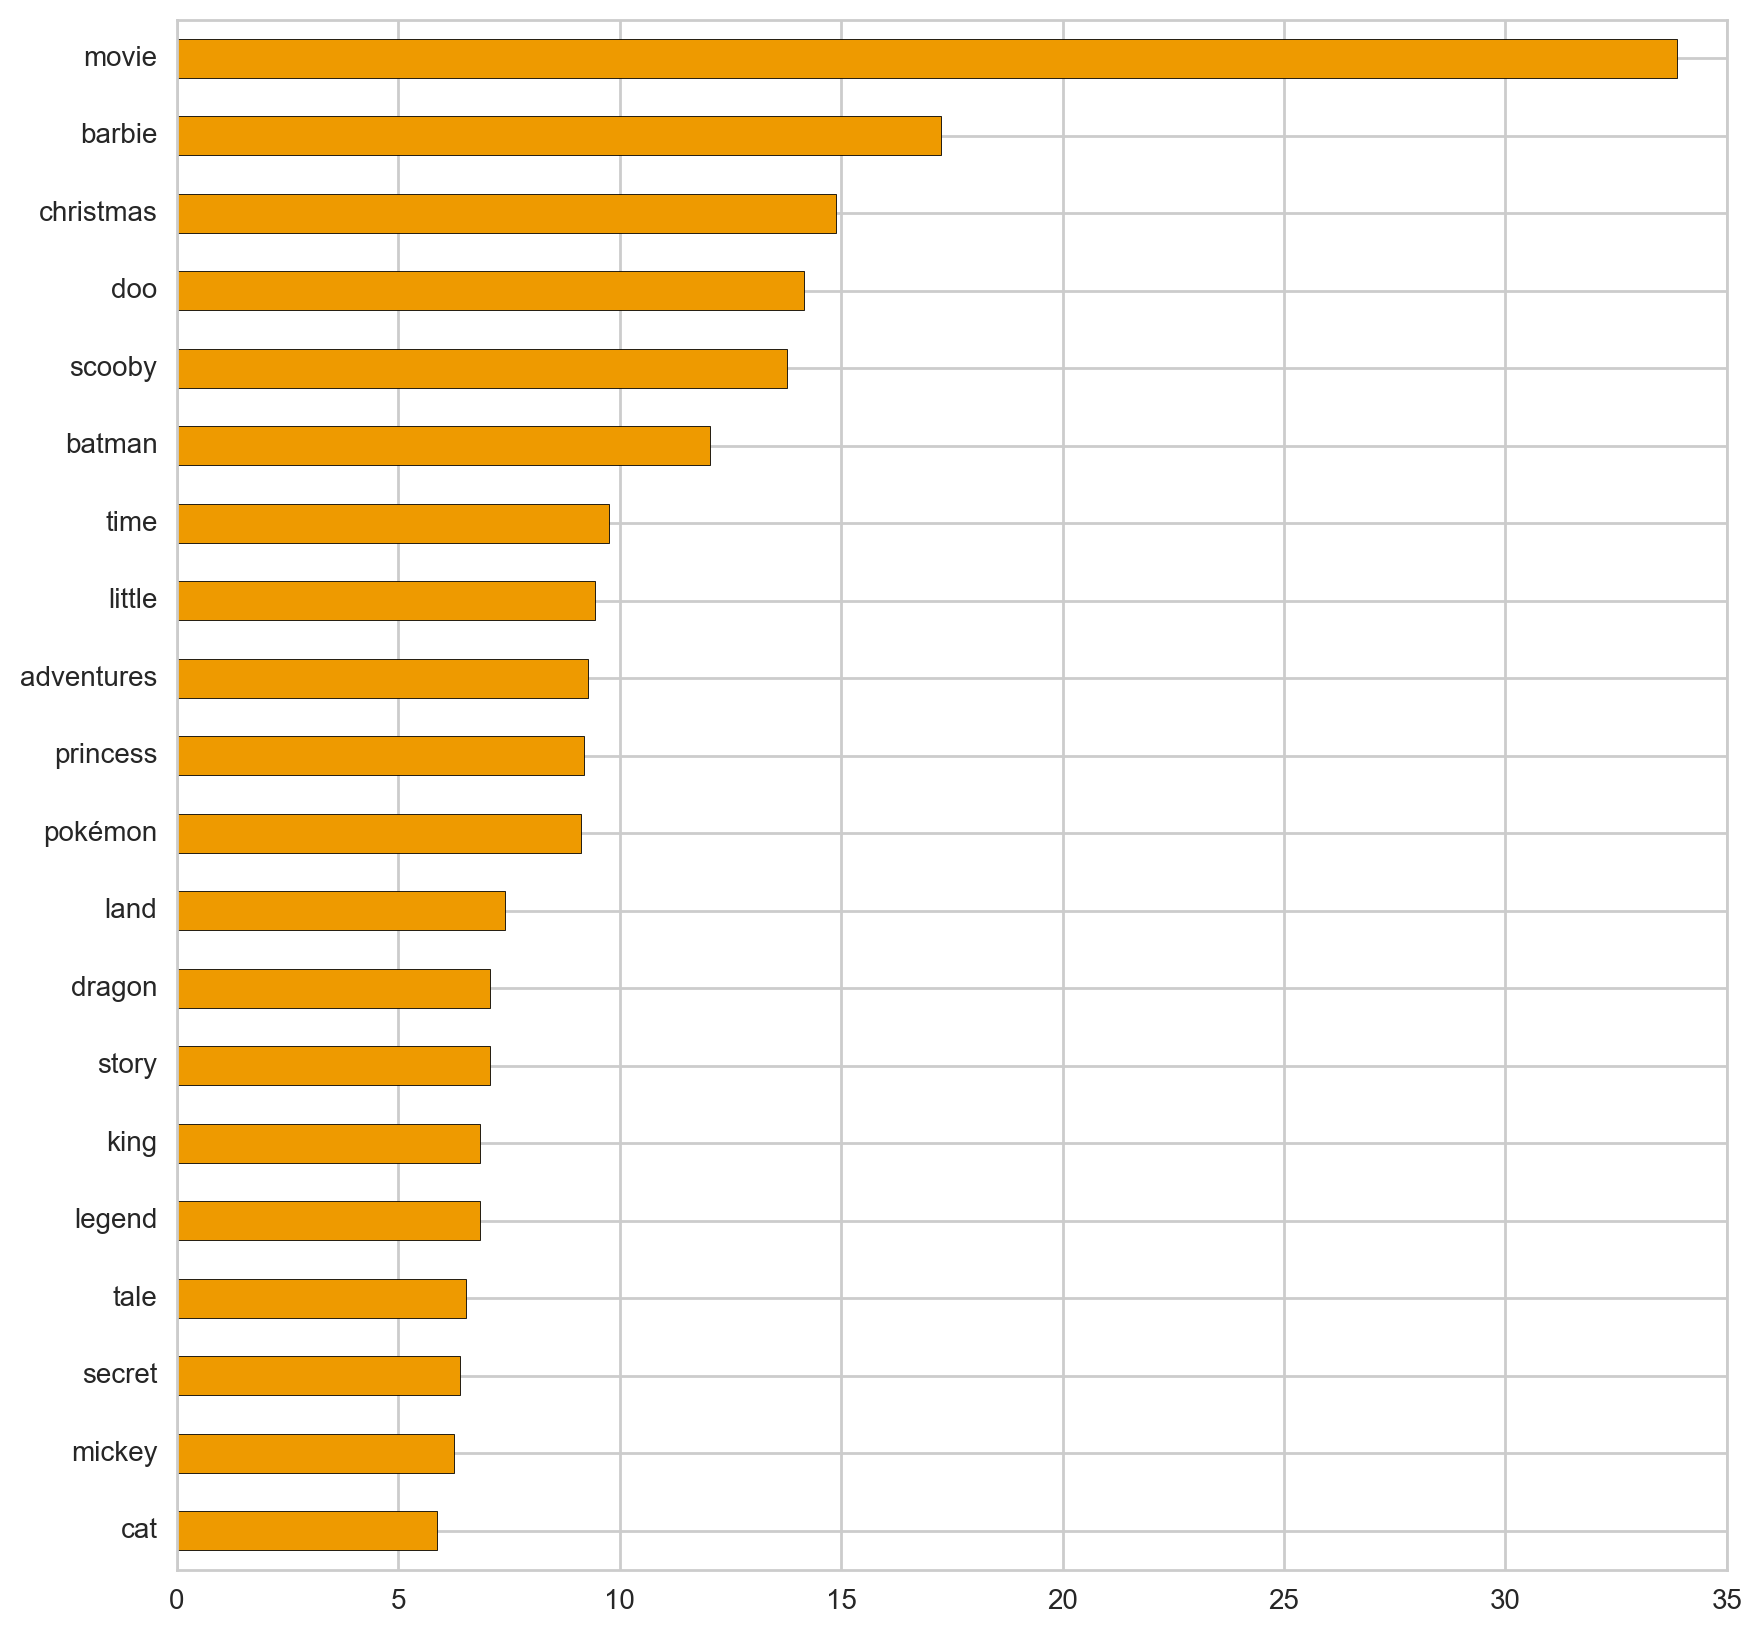

In [78]:
sorted_animation = animation_df.iloc[:,26:].sum(axis=0, skipna=True, level=None, numeric_only=None)
sorted_animation.sort_values().tail(20).plot(kind='barh', figsize=(10,10), color="#EE9A00")

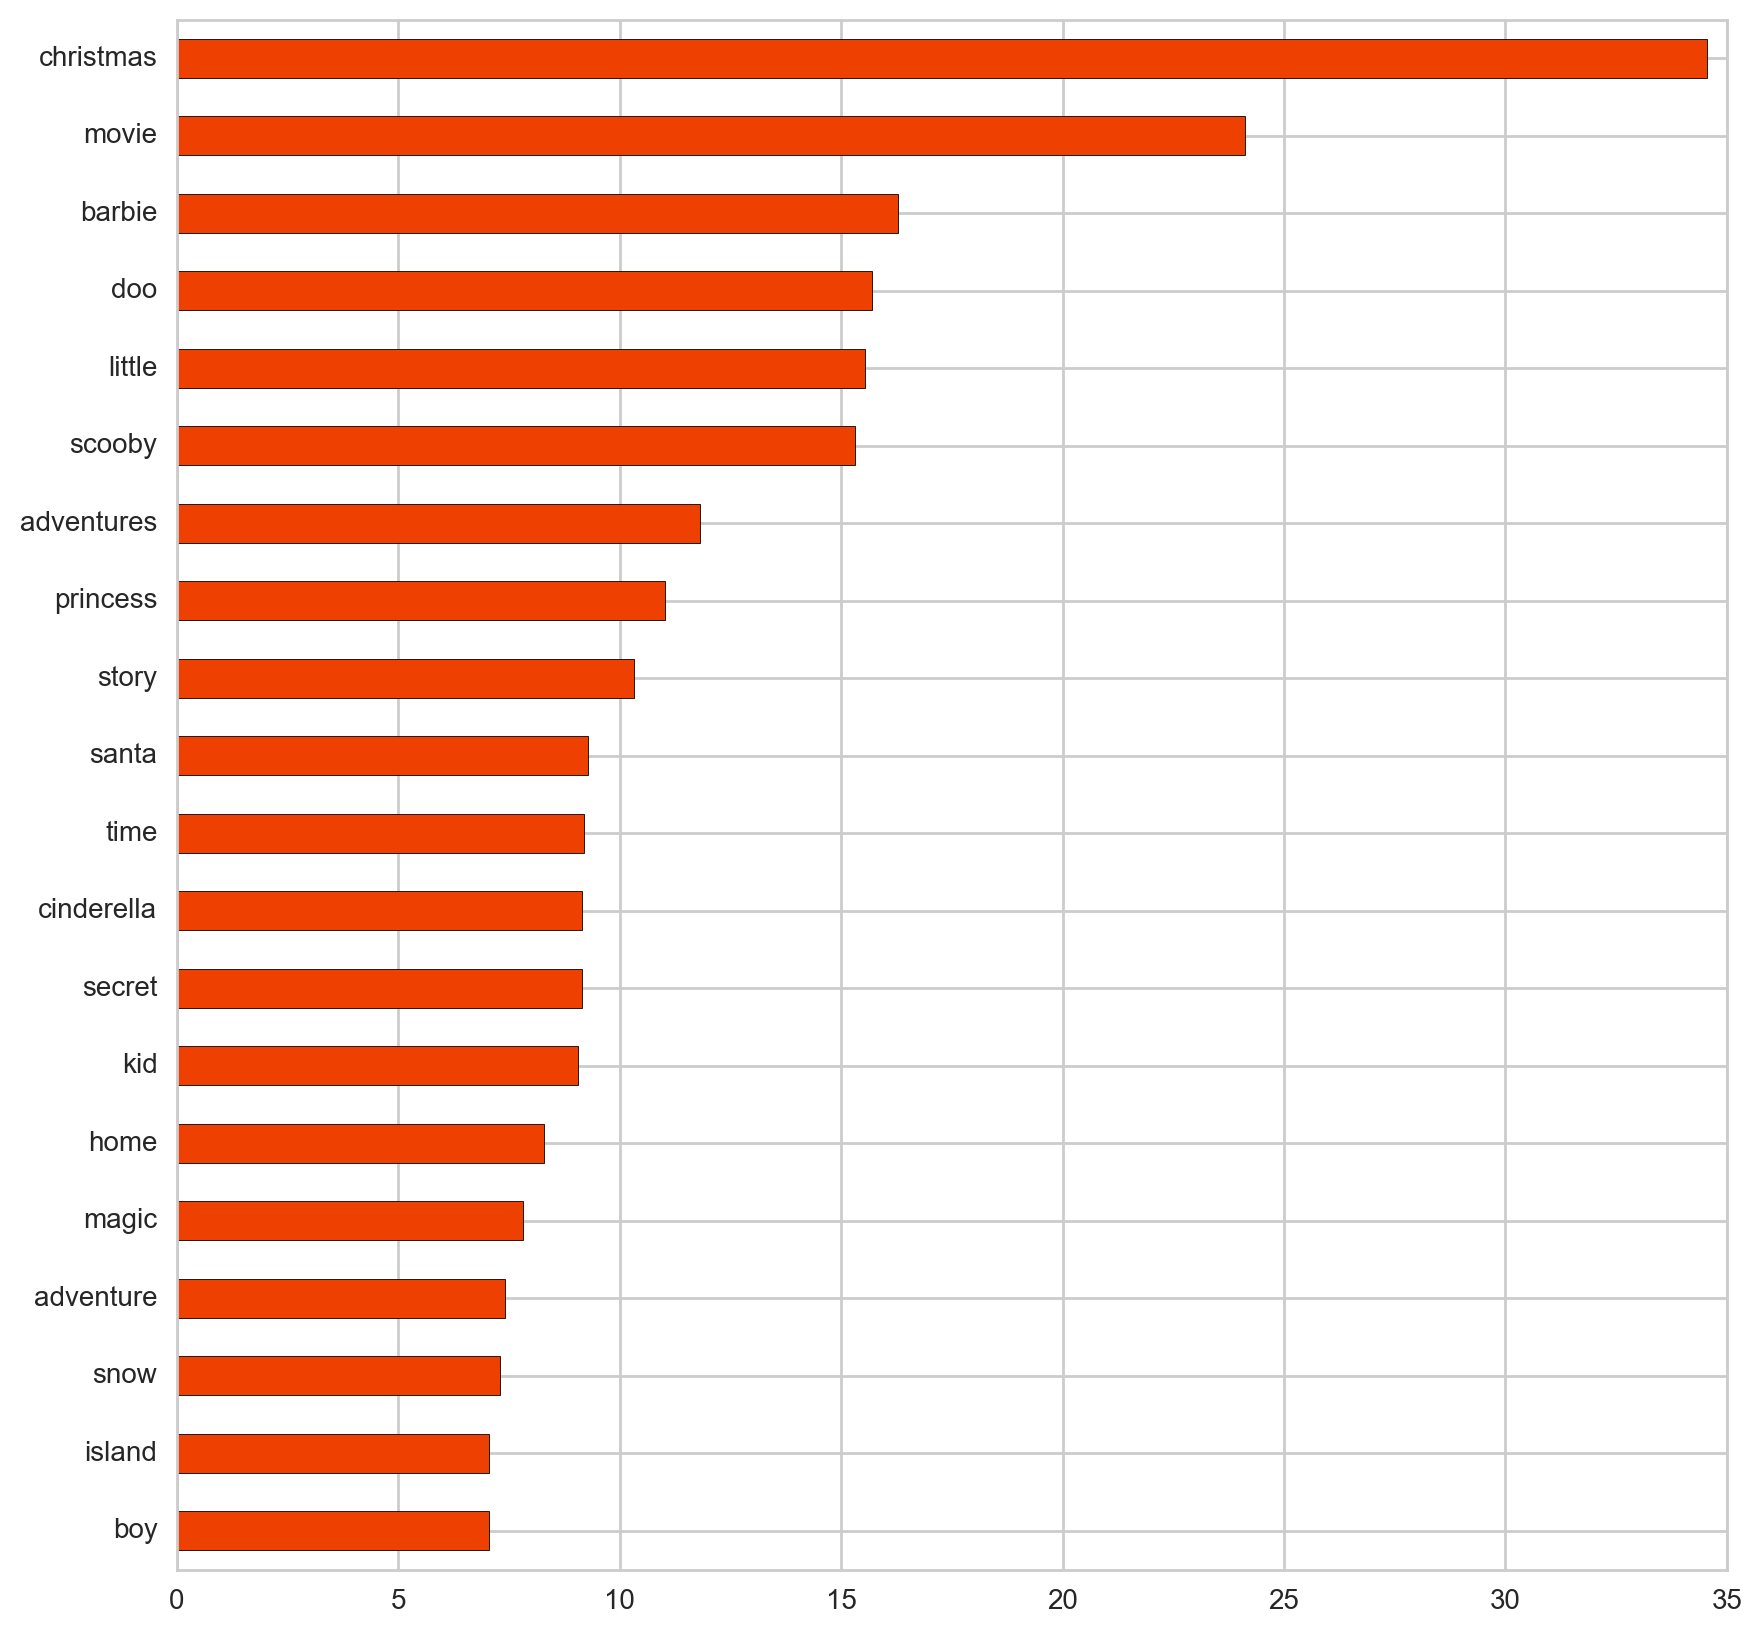

In [79]:
sorted_childrens = childrens_df.iloc[:,26:].sum(axis=0, skipna=True, level=None, numeric_only=None)
sorted_childrens.sort_values().tail(20).plot(kind='barh', figsize=(10,10), color="#EE4000")

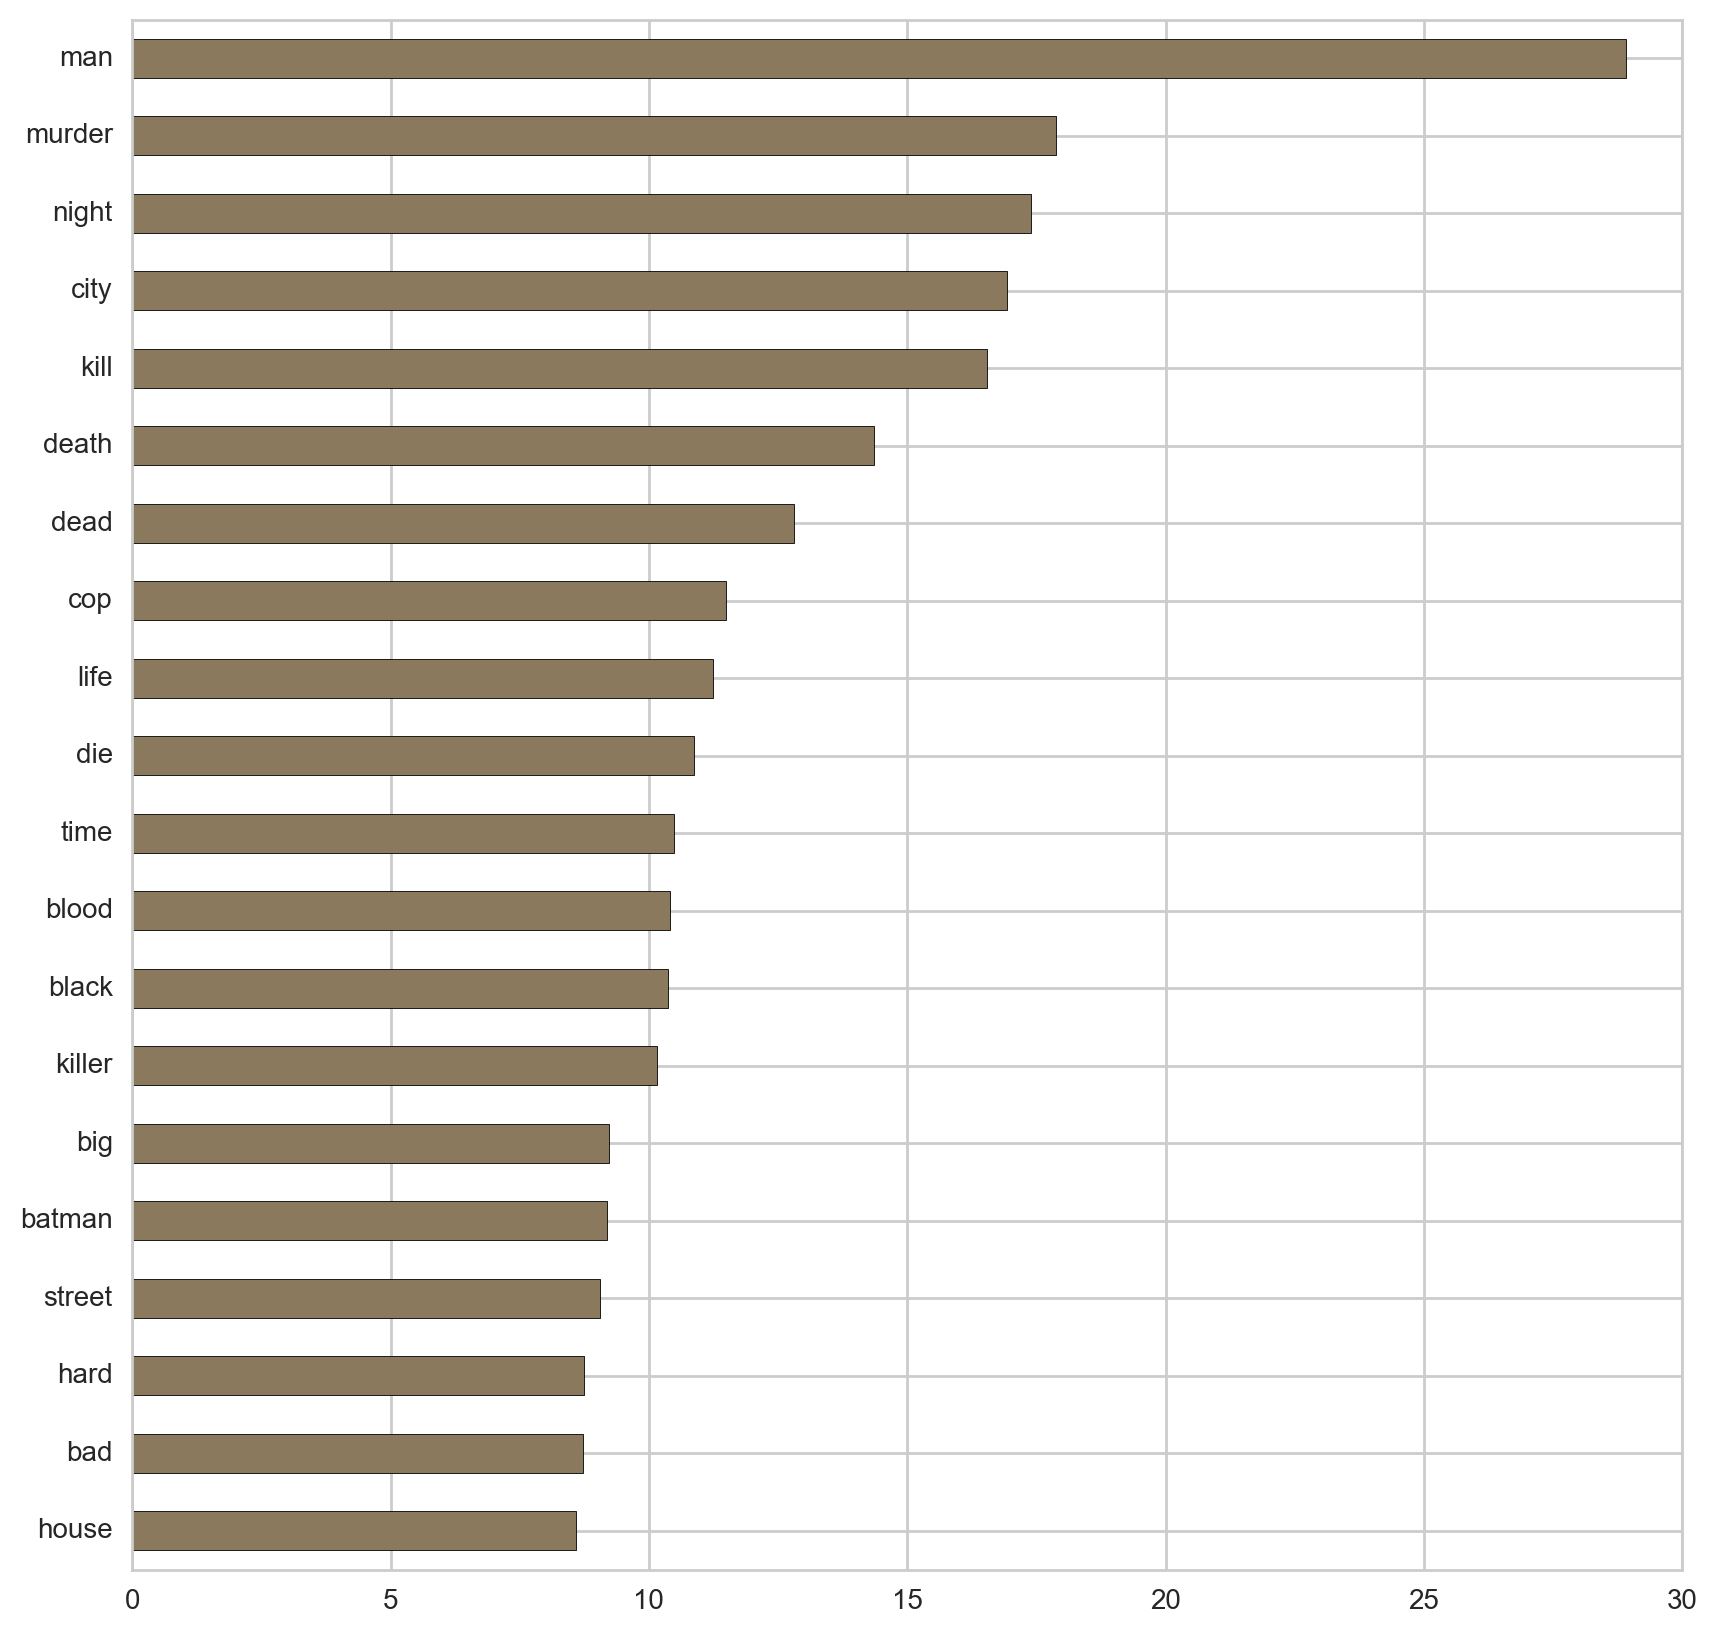

In [80]:
sorted_crime = crime_df.iloc[:,26:].sum(axis=0, skipna=True, level=None, numeric_only=None)
sorted_crime.sort_values().tail(20).plot(kind='barh', figsize=(10,10), color="#8B795E")

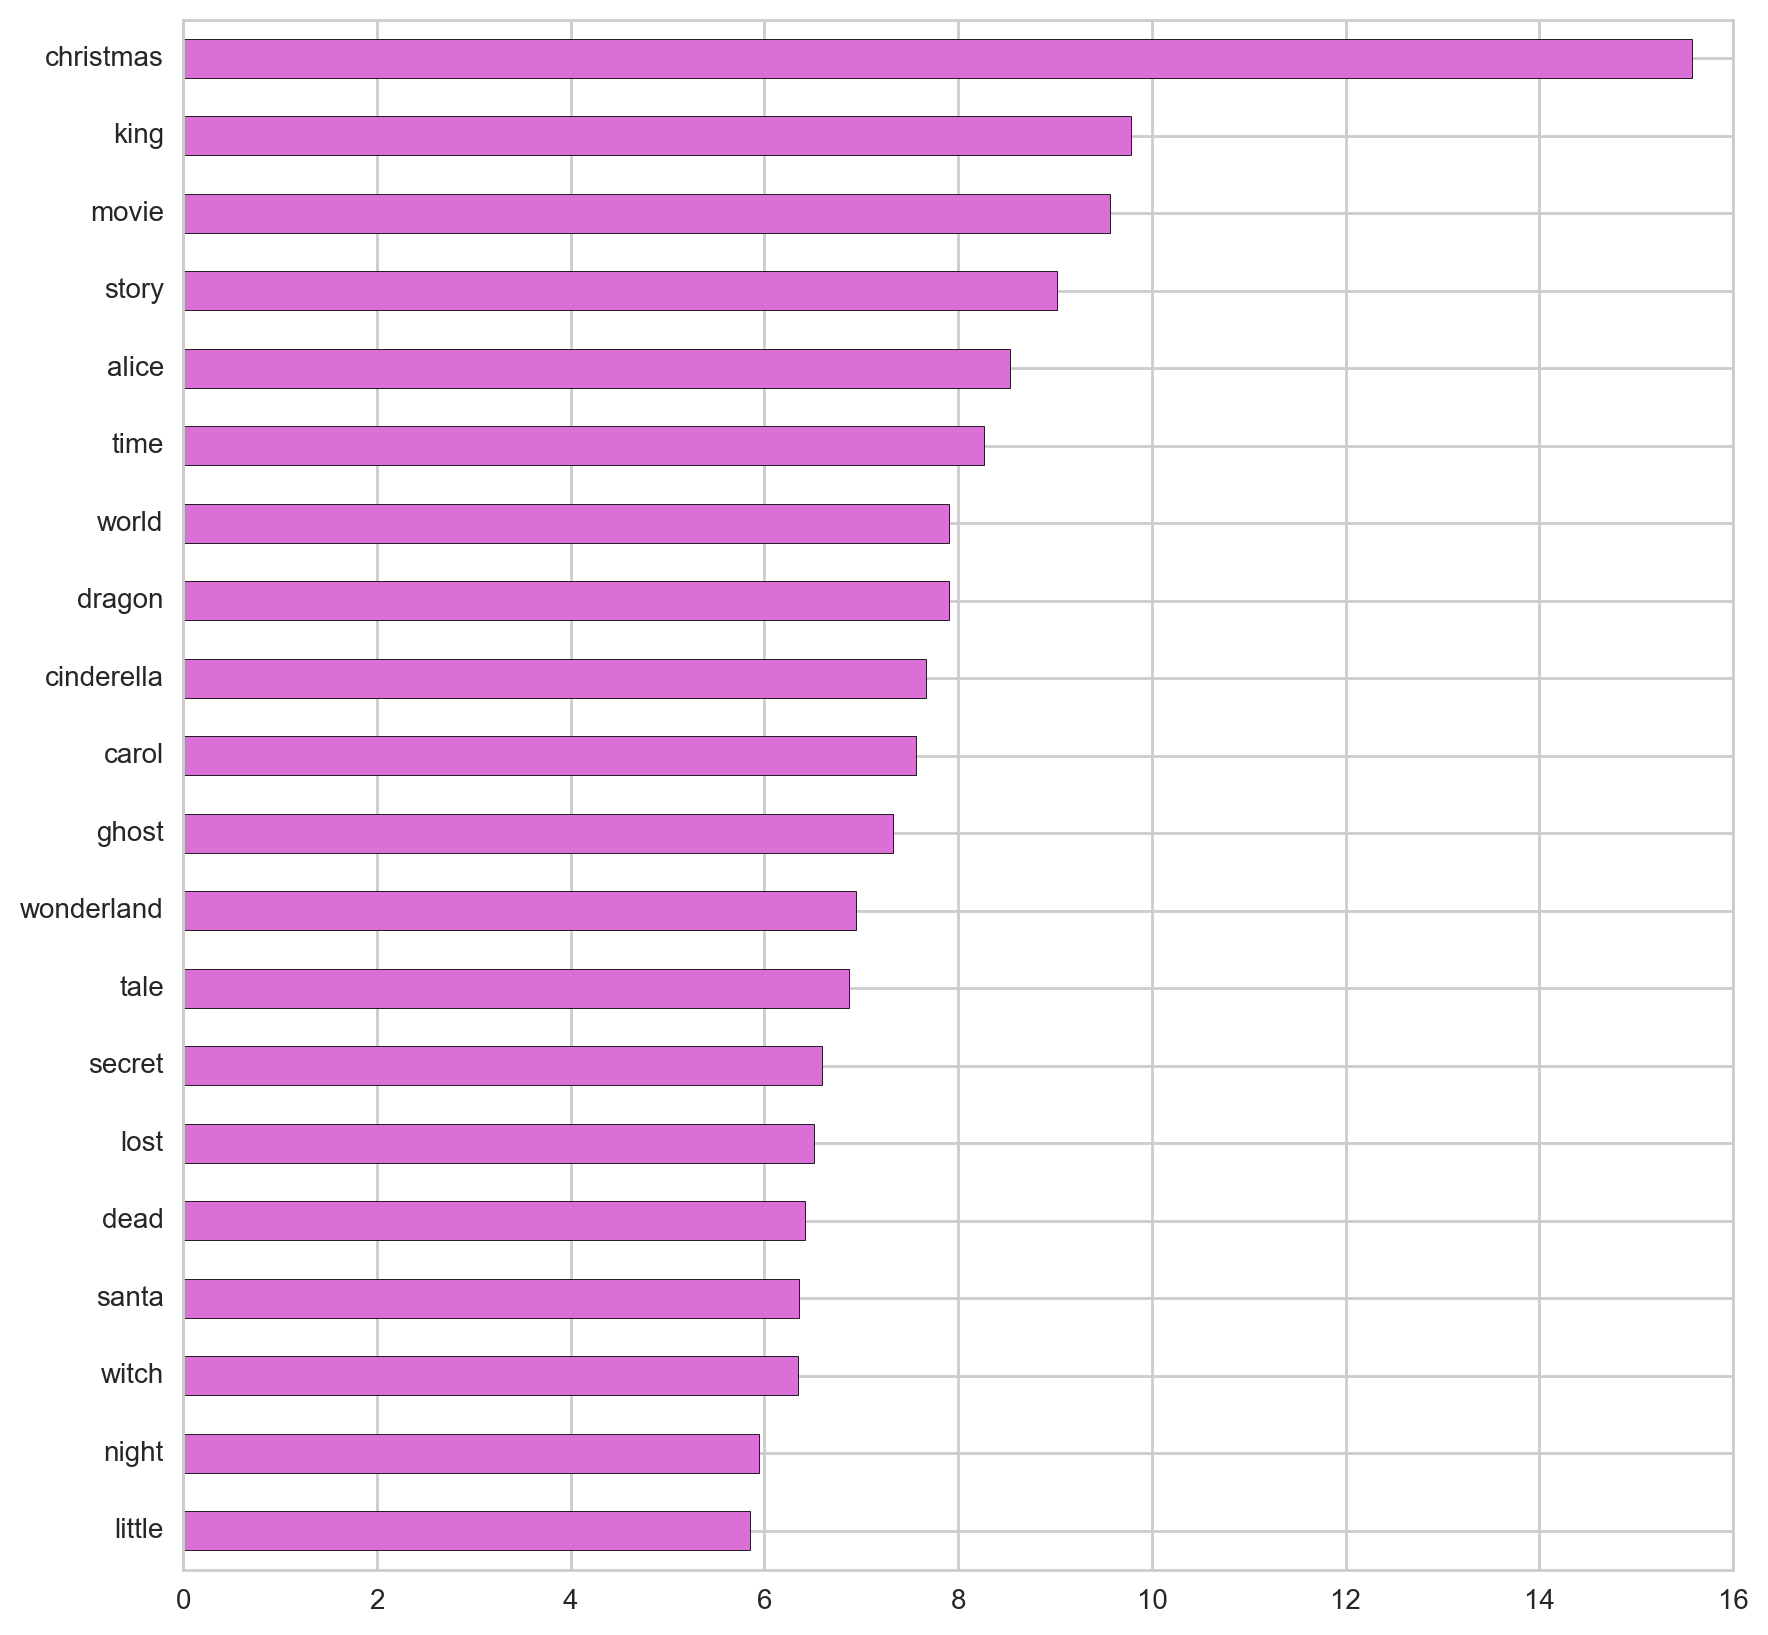

In [81]:
sorted_fantasy = fantasy_df.iloc[:,26:].sum(axis=0, skipna=True, level=None, numeric_only=None)
sorted_fantasy.sort_values().tail(20).plot(kind='barh', figsize=(10,10), color="#DA70D6")

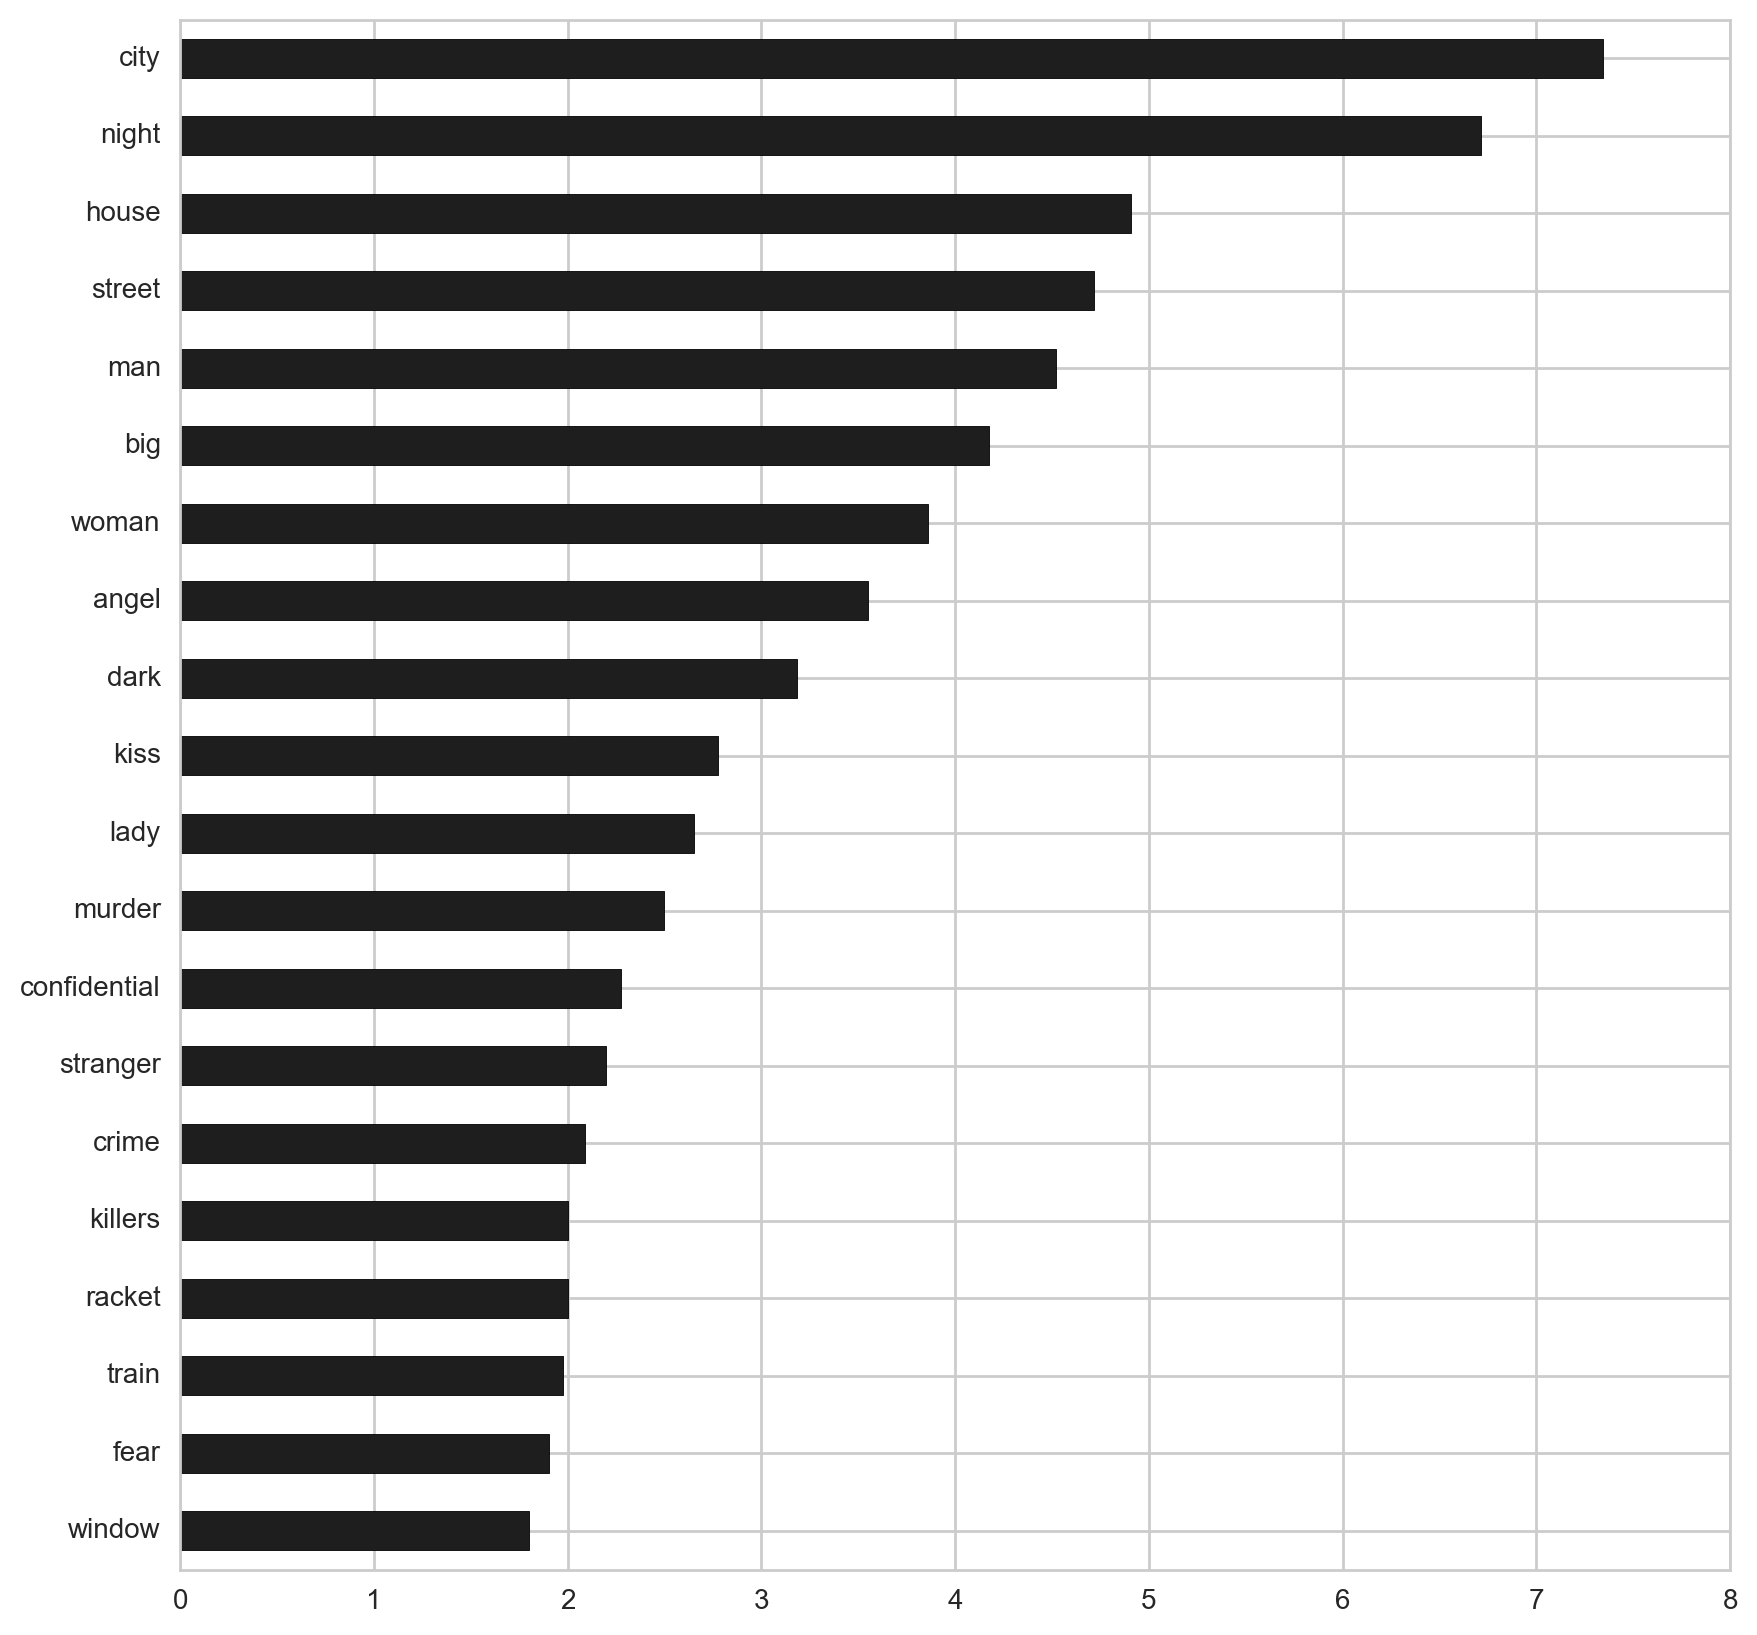

In [82]:
sorted_film_noir = film_noir_df.iloc[:,26:].sum(axis=0, skipna=True, level=None, numeric_only=None)
sorted_film_noir.sort_values().tail(20).plot(kind='barh', figsize=(10,10), color="#1E1E1E")

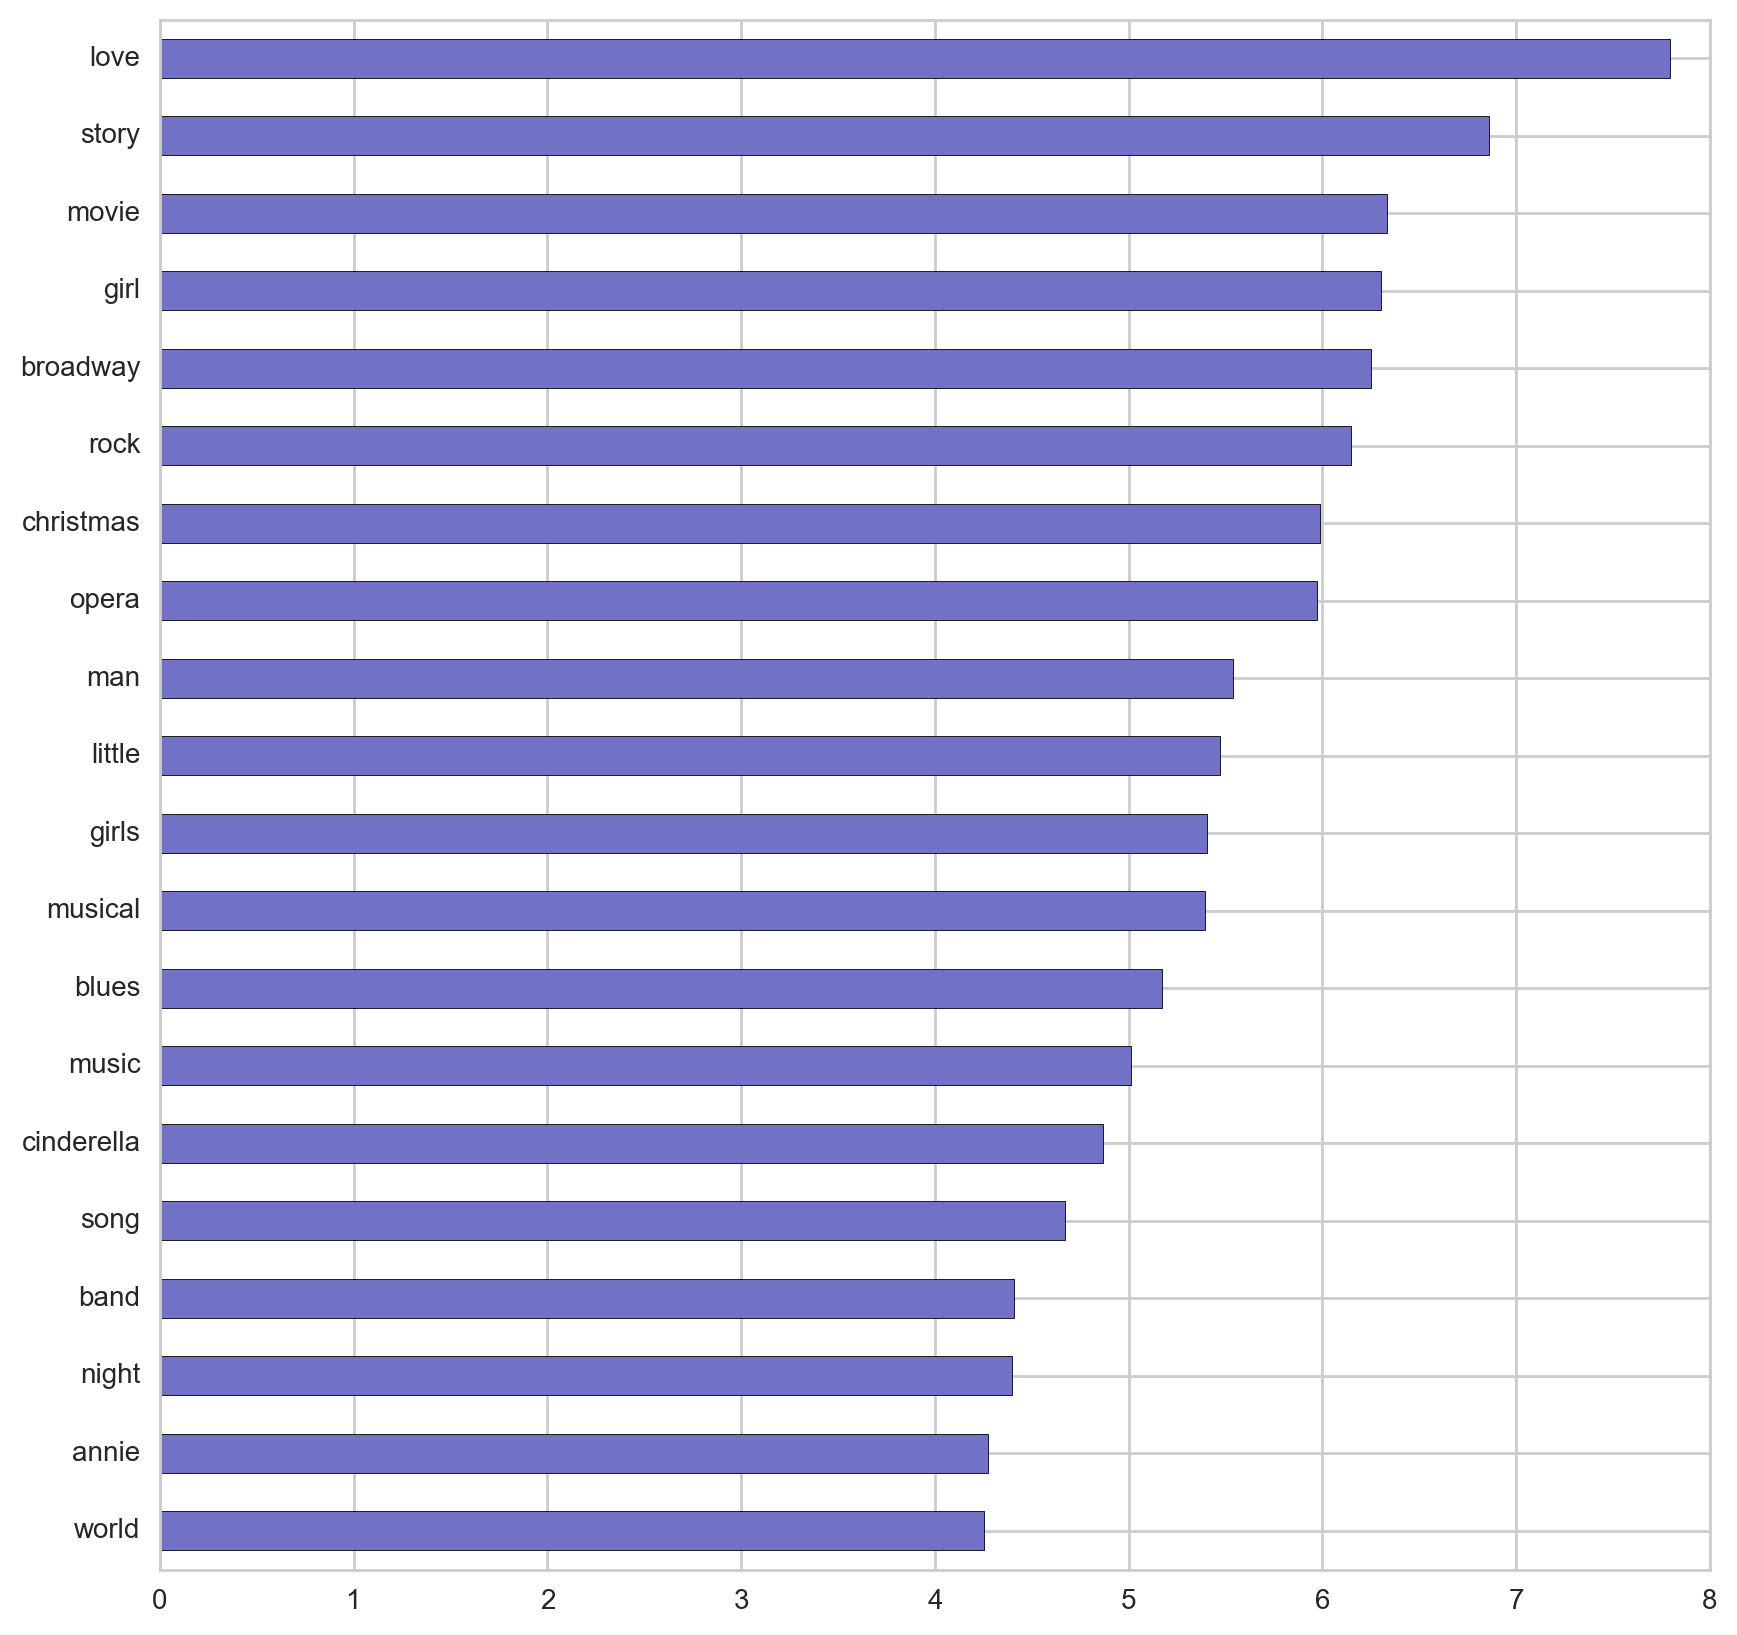

In [83]:
sorted_musical = musical_df.iloc[:,26:].sum(axis=0, skipna=True, level=None, numeric_only=None)
sorted_musical.sort_values().tail(20).plot(kind='barh', figsize=(10,10), color="#7171C6")

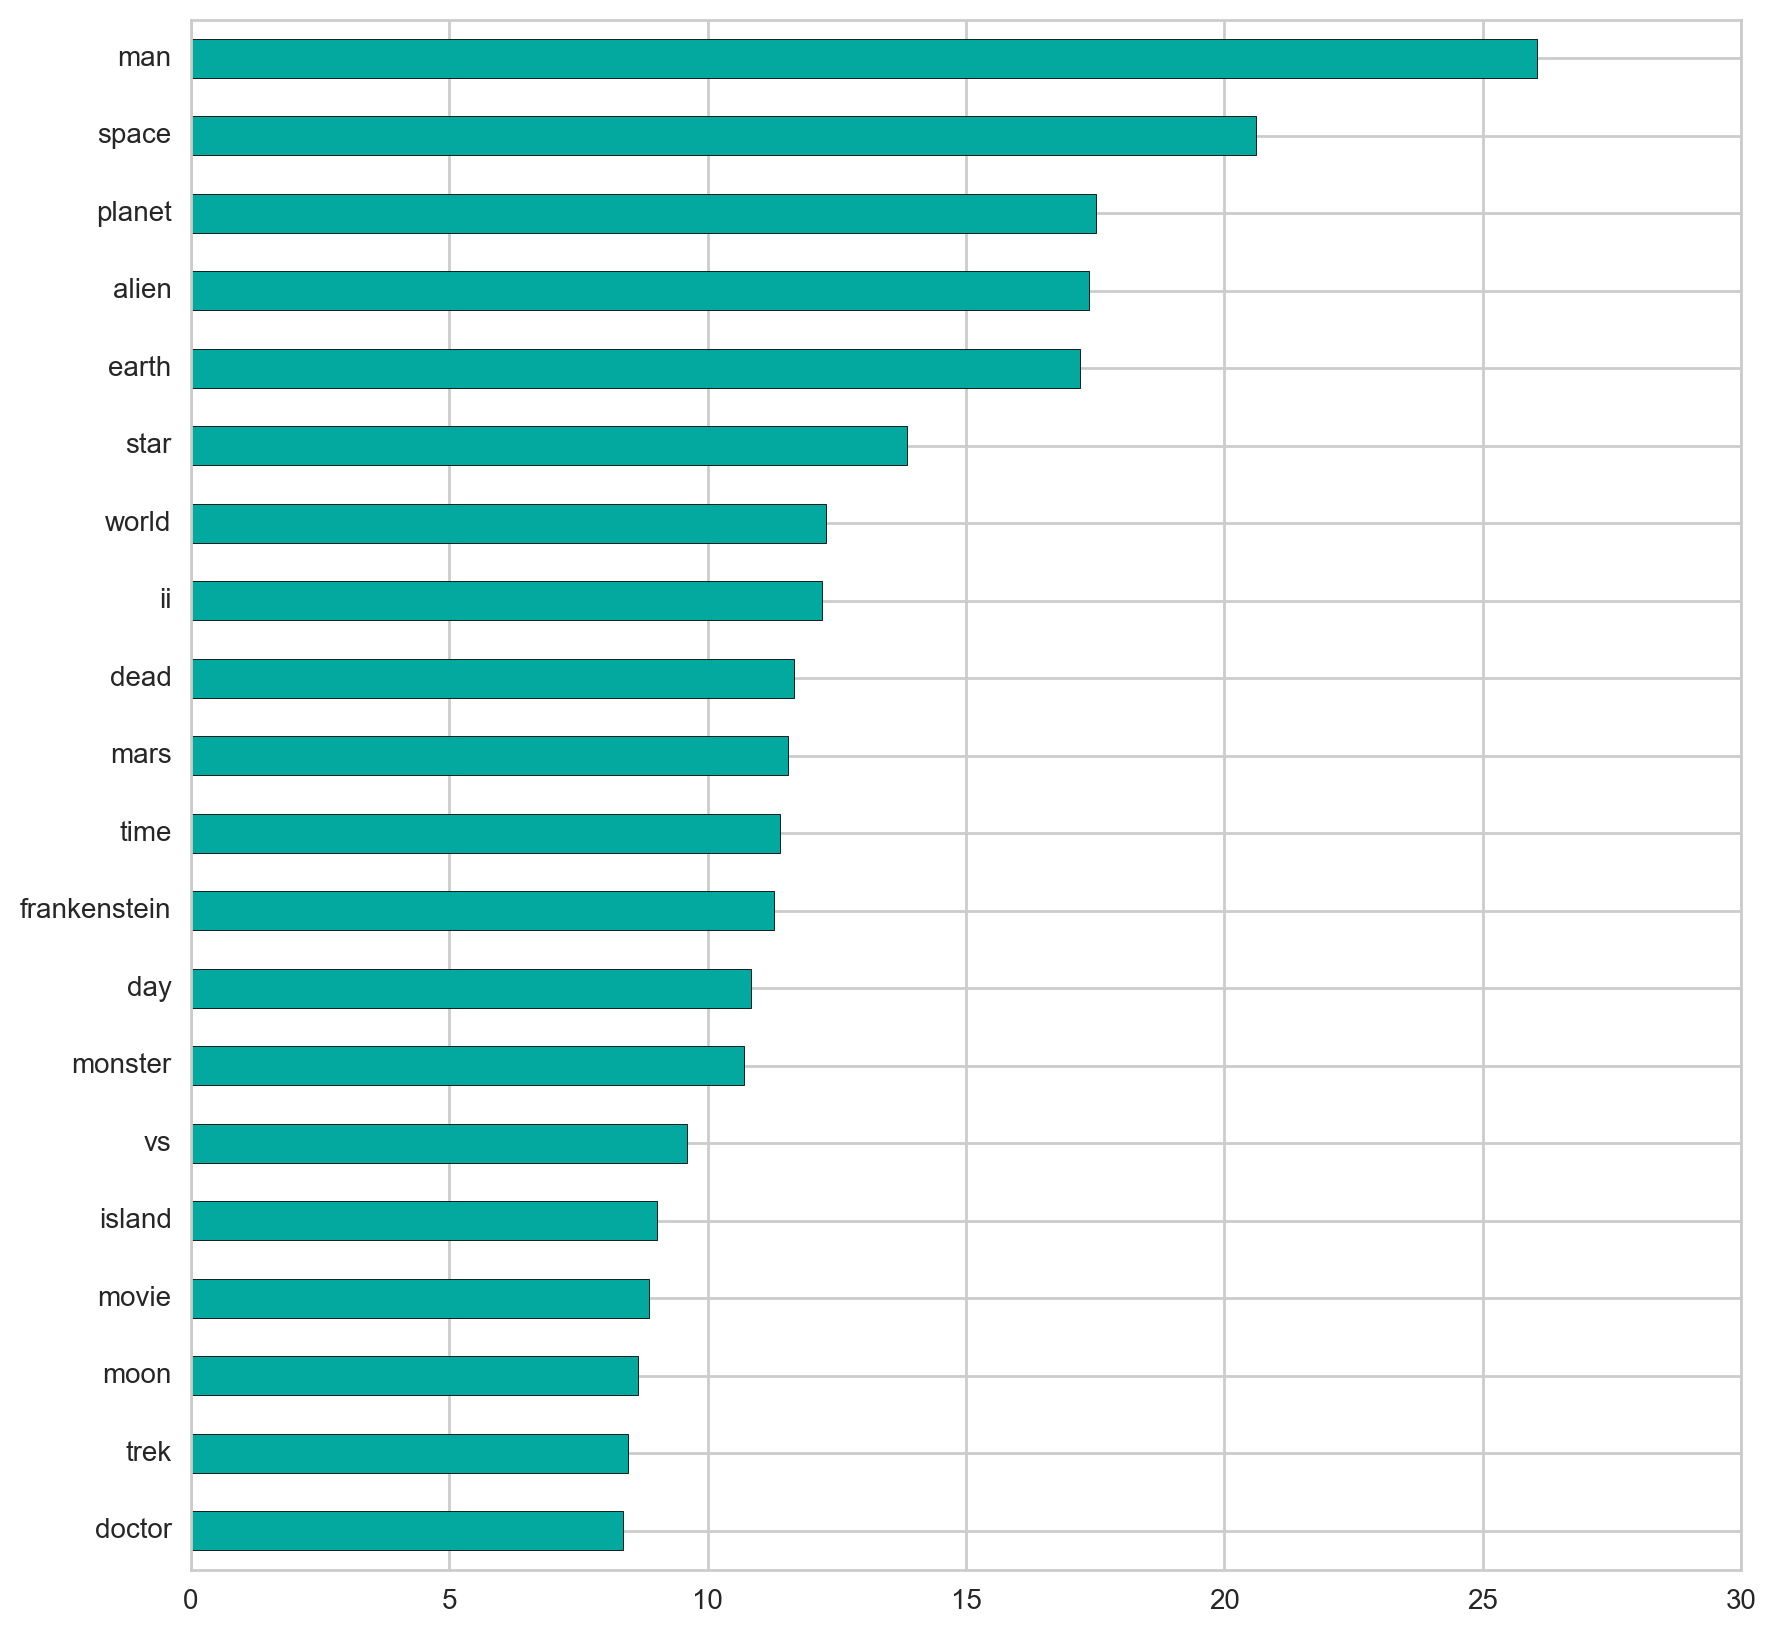

In [84]:
sorted_sci_fi = sci_fi_df.iloc[:,26:].sum(axis=0, skipna=True, level=None, numeric_only=None)
sorted_sci_fi.sort_values().tail(20).plot(kind='barh', figsize=(10,10), color="#03A89E")

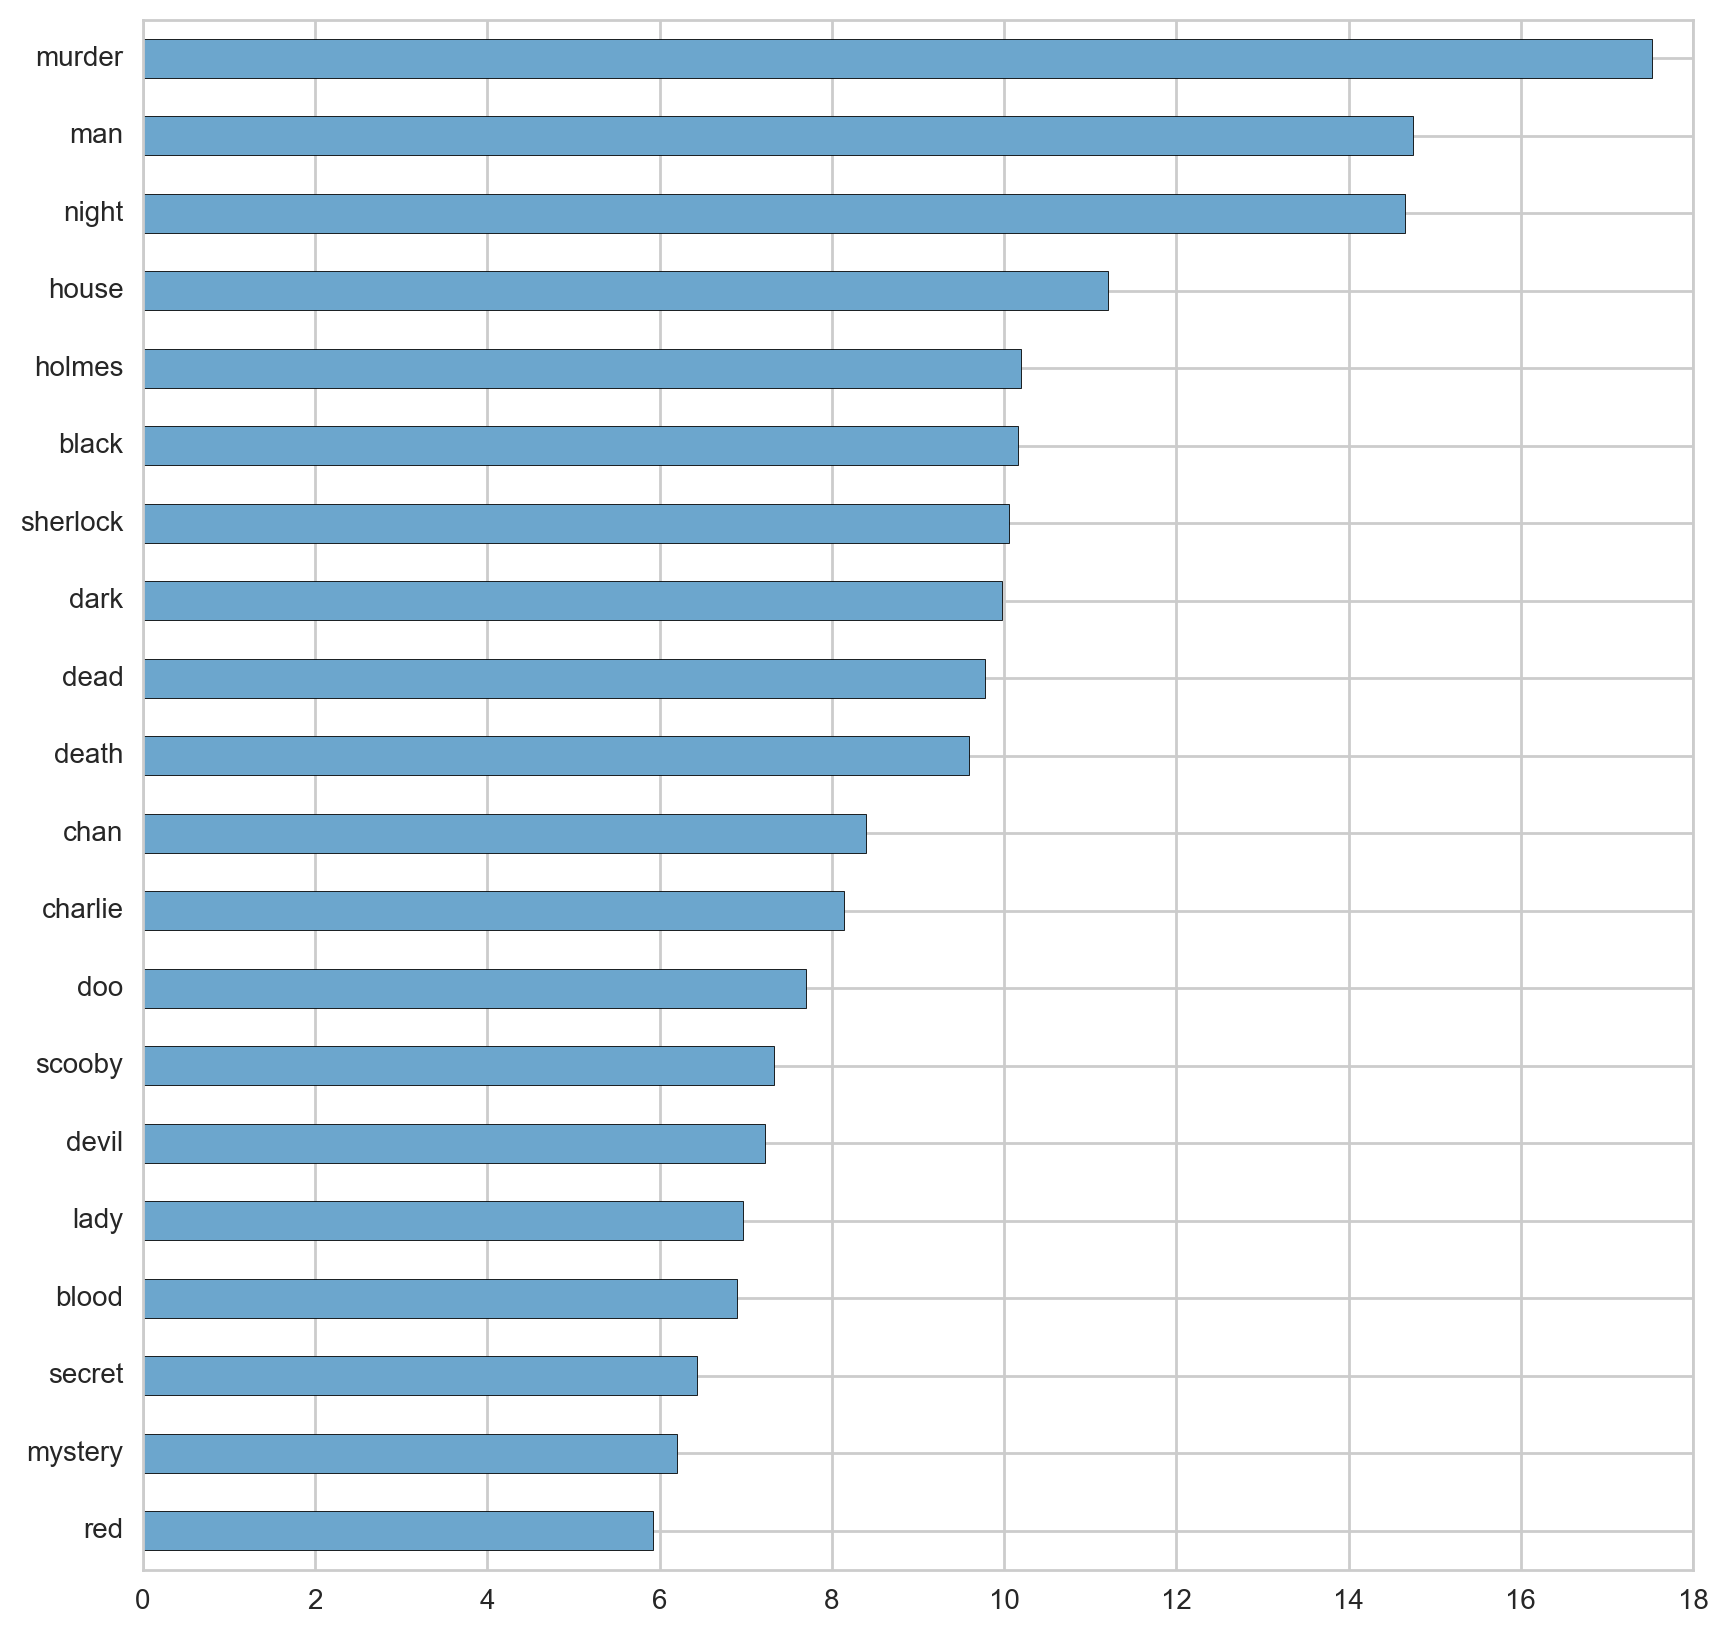

In [85]:
sorted_mystery = mystery_df.iloc[:,26:].sum(axis=0, skipna=True, level=None, numeric_only=None)
sorted_mystery.sort_values().tail(20).plot(kind='barh', figsize=(10,10), color="#6CA6CD")

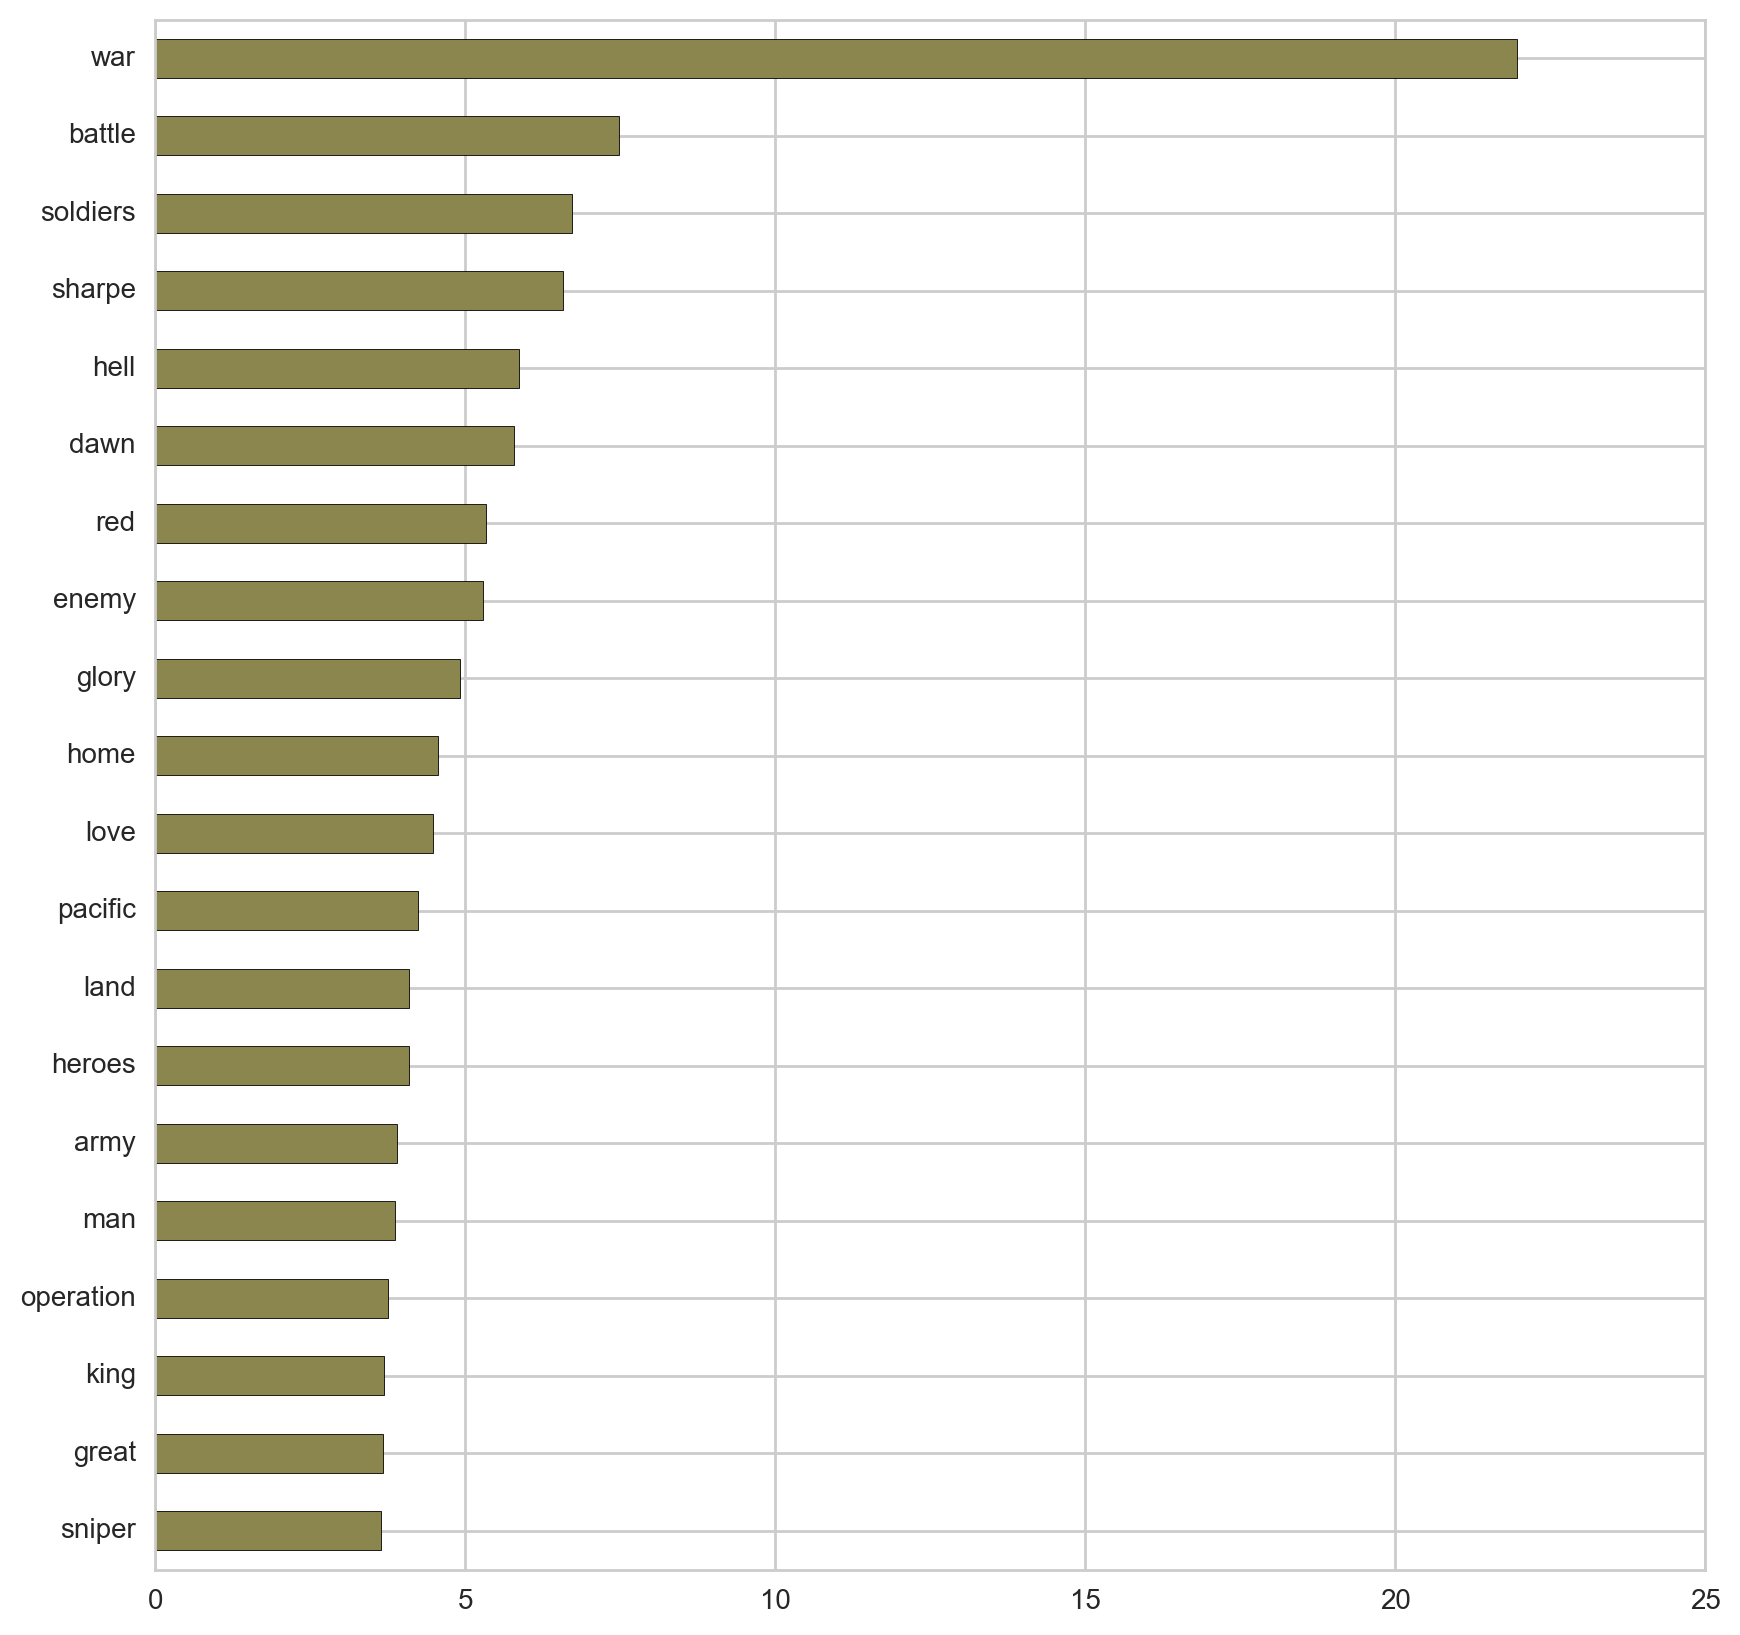

In [86]:
sorted_war = war_df.iloc[:,26:].sum(axis=0, skipna=True, level=None, numeric_only=None)
sorted_war.sort_values().tail(20).plot(kind='barh', figsize=(10,10), color="#8B864E")

From these tfidf plots we can infer, which words will be important in predicting genres from titles. For example in war there are words like 'war', 'battle', 'soldiers', in myster 'murder' and 'man', in scf-fi 'space' and 'planet, in 'love' and 'story', in film-noir 'city' and 'night', in 'christmas' and 'king', in crime 'man' and 'murder', in children's 'barbie' and 'princess', in animation 'pokemon' and 'mickey', in adventrue 'treasure' and 'island', in drama 'love' and 'man', in western 'west' and 'gun', in documentary 'story' and 'life', in thriller 'dark' and 'black', in horror 'dead' and 'vampire', in comedy 'love' and 'man', and in romance 'love' and 'girl'.

# Model selection:

## Genre prediction - One Versus Rest Classifier

Movies usually fall into more than one genre, therefore classical classification would not be able to perform this task. I had to use multilabel classification. Multilabel classification assigns to each sample a set of target labels, it assumes that the features are not mutually exclusive such as movies genres.

First, I had to use Multi Label Binarizer to preprocess the data into a binirized format, so the model could process the labels. This transformer converts between strings based label format and the supported binarized multilabel format. It created a binary matrix that represents the class label.

I set up a pipeline that consists of the NLP feature extractions Count Vectorizer that transforms a collection of movie titles to a matrix of token counts and also Tfidf Transformer, which creates a tf-idf representation from a count matrix(Count Vectorizer). 
Tf-idf means term-frequency times inverse document-frequency. Tf-idf is better than using only term frequency as it downgrades the impact of tokens that are represented very frequently in titles, and therefore they provide less information than tokens that occur less frequently in the training set.

One-vs-rest strategy, that is executed by OneVsRestClassifier, fits one classifier per class. It associates a set of positive examples for a given class and a set of negative examples which represent all the other classes. It is computationally very efficient as it needs only the number of classifiers as the number of classes, and this also gives and insight into the class by exploring its classifier. Sklearn states: 'This is the most commonly used strategy and is a fair default choice.'Within the OneVsRest I used Linear Support Vector Classification as it is supported by OneVsRest and it separates the class according to state space positions by estimating the dividing hyperplane. 


## Recommendation system

For the recommendation system I used again Tfidf vectorizer as it returns the proportion that each token is represented in the collection of movie tags and genres. Then I computed the cosine similarity between the user's movie and the rest of of the movies (genres, tags, and mean ratings). In Sklearn cosine similarity, or the cosine kernel, processes similarity as the normalized dot product of features and target. Cosine similarity computes the cosine of the angle between the two vectors. The cosine of 0° is 1, and it is less than 1 for any other angle. It is thus a judgement of orientation and not magnitude: two vectors with the same orientation have a cosine similarity of 1, two vectors at 90° have a similarity of 0, and two vectors diametrically opposed have a similarity of -1, independent of their magnitude. It is useful as the similarities are represented mainly on the scale between 1 and 0, so for other manipulation it is normalized. 

I coded two recommendation systems as one takes one movie for a user and then estimates five most similar movies, however that did not seem as too personalized, so the second recommendation system takes all movies that a user rated above his/her average and according to their genres and tags computes the five most similar movies.

# Modeling

In [108]:
movies_new = pd.read_csv('/Users/katerinacapouskova/Desktop/DSI-SF-4-katerinaC/Projects/Capstone/Movies/ml-latest/movies_new.csv')

### Changing the columns for feature extraction:

In [109]:
movies_new['genres'] = movies_new['genres'].astype(str)

In [110]:
def replace(x):

    replaced = x.replace('|', ',')
    list1 = replaced.split(',')
    return list1
    


movies_new['genres_list'] = movies_new['genres'].map(replace)

In [111]:
movies_new.dropna(inplace=True)

In [112]:
movies_new['genres_list'] = movies_new['genres_list'].map(lambda x: set([x_.strip().lower() for x_ in x]))

### Import the machine learning algorithms:

In [114]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score


mlb = MultiLabelBinarizer()
y = mlb.fit_transform(movies_new['genres_list'])

In [115]:
mlb.classes_

array(['(no genres listed)', 'action', 'adventure', 'animation',
       'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy',
       'film-noir', 'horror', 'imax', 'musical', 'mystery', 'romance',
       'sci-fi', 'thriller', 'war', 'western'], dtype=object)

I split up manully the train and test datasets roughly by 70:30 ratio. 

In [116]:
x_train = movies.title_list[:19000]
y_train = y[:19000]

x_test = movies.title_list[19000:]
y_test = y[19000:]

classifier = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', OneVsRestClassifier(LinearSVC()))
     ])
classifier.fit(x_train, y_train)
predicted = classifier.predict(x_test)

print predicted, "Accuracy Score: ", accuracy_score(y_test, predicted)
len(predicted)
print mlb.classes_

[[0 0 0 ..., 0 1 0]
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 1 1 ..., 0 0 1]
 [0 0 0 ..., 0 0 0]] Accuracy Score:  0.112154952447
['(no genres listed)' 'action' 'adventure' 'animation' 'children' 'comedy'
 'crime' 'documentary' 'drama' 'fantasy' 'film-noir' 'horror' 'imax'
 'musical' 'mystery' 'romance' 'sci-fi' 'thriller' 'war' 'western']


Accuracy 11% does not seem very good, but in multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true, so it is quite harsh.

### Plot the precision recall curve:

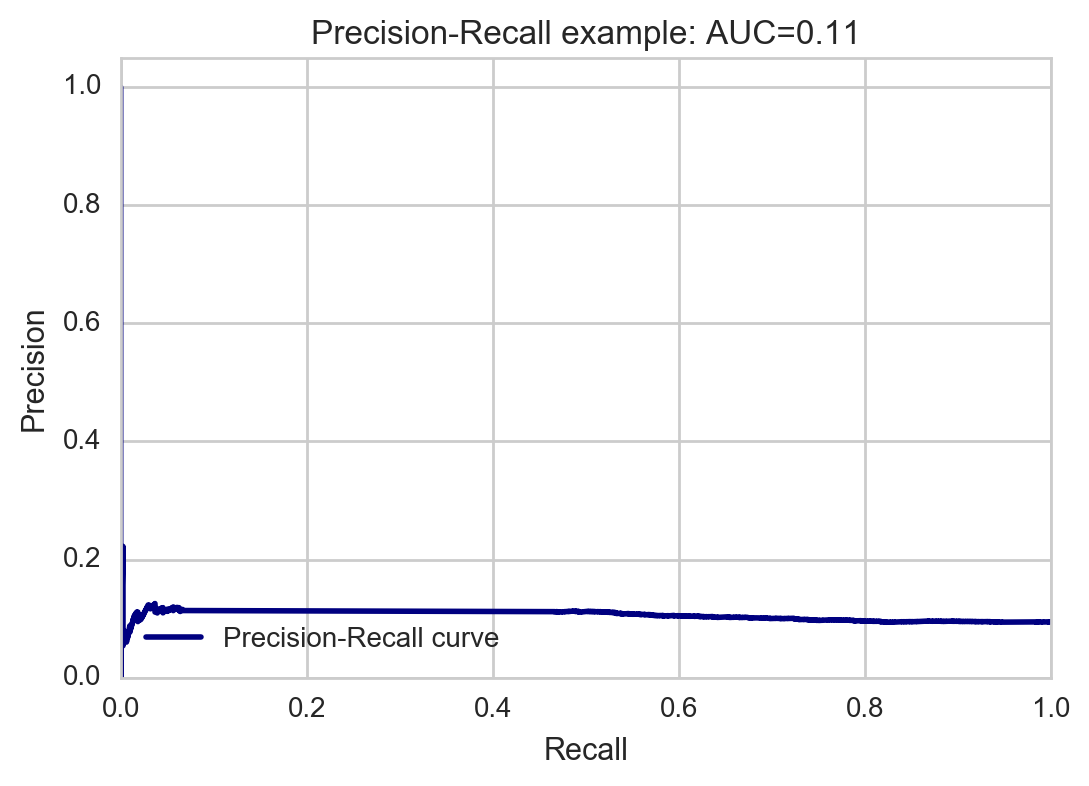

In [119]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from itertools import cycle

# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'blue', 'lavender', 'khaki', 'brown'])
lw = 2

n_classes = y.shape[1]

y_score = classifier.decision_function(x_test)


# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# Compute micro-average ROC curve and ROC area
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")


# Plot Precision-Recall curve
plt.clf()
plt.plot(recall[0], precision[0], lw=lw, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision[0]))
plt.legend(loc="lower left")
plt.show()



The precision/recall cure shows us the trade-off between precision (false positive rate) and recall (false negative rate). High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall). 


As the provided accuracy is too hard, I have come up with my own looking at the rate of at least one genres classified
correctly.

In [122]:
predicted = mlb.inverse_transform(predicted)
actual = mlb.inverse_transform(y_test)

In [123]:
genres = pd.DataFrame({
        'actual_genres': actual,
        'predicted_genres': predicted
    })

In [124]:
genres

,actual_genres,predicted_genres
0,"(drama,)","(war,)"
1,"(western,)","(action, drama)"
2,"(documentary,)","(comedy, drama)"
3,"(children, comedy)","(drama,)"
4,"(drama,)","(drama,)"
5,"(comedy,)","(drama,)"
6,"(horror,)",()
7,"(comedy,)","(comedy,)"
8,"(adventure,)","(crime, mystery)"
9,"(sci-fi, thriller)",()


In [125]:
genres['actual_genres_list'] = genres['actual_genres'].map(lambda x: list(x))
genres['predicted_genres_list'] = genres['predicted_genres'].map(lambda x: list(x))

In [126]:
lst = []
for i, j in zip(genres['actual_genres_list'], genres['predicted_genres_list']):
    #print i, ''.join(j)
    counter = 0
    for i_val in i:
        if str(i_val) in ''.join(j):
            counter += 1
    if counter >= 1:
        lst.append(1)
    else:
        lst.append(0)
            

In [139]:

genres.insert(4, 'at_least_one_genre', lst)


In [141]:
del genres['at_least_one']

In [142]:
genres

,actual_genres,predicted_genres,actual_genres_list,predicted_genres_list,at_least_one_genre
0,"(drama,)","(war,)",[drama],[war],0
1,"(western,)","(action, drama)",[western],"[action, drama]",0
2,"(documentary,)","(comedy, drama)",[documentary],"[comedy, drama]",0
3,"(children, comedy)","(drama,)","[children, comedy]",[drama],0
4,"(drama,)","(drama,)",[drama],[drama],1
5,"(comedy,)","(drama,)",[comedy],[drama],0
6,"(horror,)",(),[horror],[],0
7,"(comedy,)","(comedy,)",[comedy],[comedy],1
8,"(adventure,)","(crime, mystery)",[adventure],"[crime, mystery]",0
9,"(sci-fi, thriller)",(),"[sci-fi, thriller]",[],0


In [143]:
genres['at_least_one_genre'].sum()

3592

In [144]:
3578/86.22

41.49849222918117

### Number of tested movies: 8622, number of at least one good classification: 3578 (41.5%)

## Now trying some of my own titles and series to see how the classification works:

In [145]:
z = np.array(['zombie in the forrest',
              'death', 
              'kill your lady at night', 
              'die django ', 
              'frankenstein', 
              'love in paris', 
              'story of a novice', 
              'soldier in the battle and his army', 
              'alice in wonderland',
             'peaky blinders', 
              'game of thrones', 
              'sex and the city', 
              'the big bang theory',
              ''
            ])
predicted_custom = classifier.predict(z)

In [146]:
mlb.inverse_transform(predicted_custom)

[('comedy', 'horror'),
 ('action',),
 ('comedy',),
 ('thriller', 'western'),
 ('horror', 'sci-fi'),
 ('comedy', 'drama', 'romance'),
 ('documentary',),
 ('action', 'war'),
 ('adventure', 'fantasy'),
 ('drama',),
 ('drama',),
 ('comedy', 'drama', 'romance'),
 ('drama',),
 ('drama',)]

# Recommendation systems:

Load the dataframes. The file 'movies_ratings_user_stripped.csv' was created and modified in notebook accessible here:
https://github.com/katerinaC/DSI-SF-4-katerinaC/blob/master/Projects/Capstone/Movies/Movies_ratings_continue.ipynb
It is the same dataframe as ratings.csv only that it contains movies that were rated at least 10 times. 

In [147]:
tags = pd.read_csv('/Users/katerinacapouskova/Desktop/DSI-SF-4-katerinaC/Projects/Capstone/Movies/ml-latest/tags.csv')

In [148]:
df = pd.read_csv('/Users/katerinacapouskova/Desktop/DSI-SF-4-katerinaC/Projects/Capstone/Movies/ml-latest/movies_ratings_user_stripped.csv')

In [149]:
movies = pd.read_csv('/Users/katerinacapouskova/Desktop/DSI-SF-4-katerinaC/Projects/Capstone/Movies/ml-latest/movies_new.csv')

In [150]:
df = df.sort('userId').reset_index()

/Applications/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [151]:
movies_df = movies.drop(['Unnamed: 0', 'ratings_count', 'COMEDY', 'DRAMA', 'CRIME', 'FANTASY', 'FILM-NOIR', 
        'MUSICAL', 'SCI-FI', 'MYSTERY', 'WAR', 'Year', 'title_list',
                         'THRILLER', 'WESTERN', 'ROMANCE', 'ADVENTURE', 'ANIMATION',
        'CHILDRENS', 'DOCUMENTARY', 'HORROR'], axis=1)

In [152]:
df = df.drop(['Unnamed: 0','index'], axis=1)

### Modify the genres column:

In [153]:
def replace(x):
    
    y = str(x)
    y = y.replace("|",(", "))
    
    return y
            

#df['genres_list'] = df['genres'].map(replace)
movies_df['genres_list'] = movies_df['genres'].map(replace)

### Merge with tags and modify the columns:

In [154]:
df_movies = movies_df.merge(tags, how='right', left_on='movieId', right_on='movieId')

In [155]:
df_movies['tag'] = df_movies['tag'].map(lambda x: str(x))

In [156]:
def comma(x):
    x = x+','
    
    return x

df_movies['tag'] = df_movies['tag'].map(comma)

In [157]:
def comma(x):
    x = str(x)
    x = x+','
    
    
    return x

df_movies['genres_list'] = df_movies['genres_list'].map(comma)

In [158]:
def comma_2(x):
    x = x.replace(' ',',')
    return x
df_movies['tag'] = df_movies['tag'].map(comma_2)

In [160]:
movies_tags = df_movies.groupby(['movieId','ratings_mean', 'title', 'genres_list'])['tag'].sum()

In [162]:
movies_tags = pd.DataFrame(movies_tags).reset_index()

### Make a new column with genres, tags and rating:

In [163]:
movies_tags['sent'] = movies_tags[['genres_list','tag', 'ratings_mean']].apply(lambda x: '{}  {}  {}'.format(x[0],x[1],x[2]), axis=1)    
movies_tags['sentence'] = movies_tags['sent'].map(lambda x: str(x))
del movies_tags['sent']

In [164]:
movies_tags.sentence[122]

'Comedy, War,  politics,politics,politics,politics,politics,politics,politics,politics,politics,politics,politics,Michael,Moore,sarcasm,politics,politics,Michael,Moore,politics,politics,conspiracy,politics,John,Candy,politics,Alan,Alda,Dan,Aykroyd,funny,hilarious,irreverent,James,Belushi,John,Candy,Michael,Moore,military,political,commentary,politics,Rhea,Perlman,Rip,Torn,sarcasm,satire,war,politics,politics,  2.7922483468'

## Recommendation function:

In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

def recommendation(user, df):
    
    #define y (we look for similar movies to y)
    
    y = user.title.iloc[0]
    y = df[df.title == y].index.tolist()
    for i in y:
        y = int(i)
    
    
    
    #take only movies_tags.sentence for analysis
    
    movies_sentence = df['sentence']
    
    # set up tfidf vectorizer to map movies' tag in a dimensional space to assign a numerical value
    tf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
    tfidf_matrix = tf_vectorizer.fit_transform(movies_sentence)
    #tfidf_y = tf_vectorizer.fit_transform(y)
     
    # set up a cosine similarity     
    cosine_similarities = cosine_similarity(tfidf_matrix[y:y+1], tfidf_matrix).flatten()
    
    related_movies_indices = cosine_similarities.argsort()[:-7:-1]
    
    #Probability of liking:
    user_rating = user.rating_x.iloc[0]
    max_rating = 5
    similarity = cosine_similarities[related_movies_indices]
    user_average = user.user_avg_rating.iloc[0]
    
    probability = (user_rating/max_rating)*similarity
    
    similarity_df = pd.DataFrame({
            'Movies_indices': related_movies_indices,
            'Cosine_similarity': cosine_similarities[related_movies_indices],
            'Probability of liking': probability
        })
    similarity = similarity_df.merge(df, how='left', left_on='Movies_indices', right_index=True)
    
    print similarity

In [166]:
user = df[(df['userId'] == 45) & (df['movieId'] == 122)]
user = pd.DataFrame(user)

In [167]:
recommendation(user, movies_tags)

   Cosine_similarity  Movies_indices  Probability of liking  index   movieId  \
0           1.000000              97               0.200000     97     122.0   
1           0.364467           10509               0.072893  10509   73991.0   
2           0.322353            4087               0.064471   4087    5278.0   
3           0.291772            7271               0.058354   7271   31750.0   
4           0.266315            8591               0.053263   8591   52227.0   
5           0.265734           16152               0.053147  16152  129080.0   

   ratings_mean                       title                  genres_list  \
0      2.862931            Boomerang (1992)             Comedy, Romance,   
1      1.500000              Pyrates (1991)             Comedy, Romance,   
2      2.100000  Fraternity Vacation (1985)             Comedy, Romance,   
3      2.600000      Until September (1984)              Drama, Romance,   
4      3.031447   Darwin Awards, The (2006)  Adventure, Com

### Create a new dataframe to have only the movies that users rated above their individual rating means.

In [170]:
df_user_likes = df[df['rating_mean_stand'] > 0]

### More personalized recommendation:

In [168]:
def recommendation_personalised(user, df1, df2):
    
    #define y (we look for similar movies to y)
    #Looking for users' rated movies, and making a new sentence from all those movies
    user_sel = df1[df1['userId'] == user]
    y = list(user_sel.title)
    for i in y:
        w = df2[df2.title == i].index.tolist()
        for i in w:
            user_sentence = df2['sentence'].iloc[i]
            
    #drop the movies from tags df2:
    for i in y:
        df2 = df2[df2.title != i]
    
    #add new row for the user with his new sentence:
    user_sentence_dict = {'sentence': user_sentence}
    user_df = pd.DataFrame([user_sentence_dict])
    
    df2.append(user_df, ignore_index=True)
    
    #take only movies_tags.sentence for analysis
    
    movies_sentence = df2['sentence']
    
    # set up tfidf vectorizer to map movies' tag in a dimensional space to assign a numerical value
    tf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
    tfidf_matrix = tf_vectorizer.fit_transform(movies_sentence)
    #tfidf_y = tf_vectorizer.fit_transform(y)
     
    # set up a cosine similarity     
    cosine_similarities = cosine_similarity(tfidf_matrix[:-2:-1], tfidf_matrix).flatten()
    
    related_movies_indices = cosine_similarities.argsort()[:-7:-1]
    
    
    similarity_df = pd.DataFrame({
            'Movies_indices': related_movies_indices,
            'Cosine_similarity': cosine_similarities[related_movies_indices],
            
        })
    similarity = similarity_df.merge(df2, how='left', left_on='Movies_indices', right_index=True)
    
    print similarity

We call the function by users id number, dataframe that contains users ratings, and the dataframe with movies and their tags.

In [171]:
recommendation_personalised(2, df_user_likes, movies_tags)

   Cosine_similarity  Movies_indices  index   movieId  ratings_mean  \
0           1.000000           18222  18222  164228.0      1.333333   
1           0.478366           15369  15369  117867.0      3.696891   
2           0.301993           11656  11656   86781.0      3.984043   
3           0.263111           15323  15323  117456.0      3.525424   
4           0.259242           14216  14216  107436.0      3.079710   
5           0.252069           10146  10146   70867.0      2.700000   

                      title                    genres_list  \
0            Radin ! (2016)                        Comedy,   
1                '71 (2014)  Action, Drama, Thriller, War,   
2          Incendies (2010)           Drama, Mystery, War,   
3  Beyond the Lights (2014)                         Drama,   
4            Haunter (2013)     Horror, Mystery, Thriller,   
5      Lonely Street (2009)               Comedy, Mystery,   

                                                 tag  \
0  Dany,Boo

## Conclusion: